In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import math
%matplotlib inline
%run ./master_experminet-functions.ipynb

In [2]:
def quick_sort(df):
    sorted_df = df.sort_values(kind="quicksort")
    return sorted_df
def merge_sort(df):
    sorted_df = df.sort_values(kind="mergesort")
    return sorted_df
def heap_sort(df):
    sorted_df = df.sort_values(kind="heapsort")
    return sorted_df

In [8]:
n_samples = 100000
choices = [quick_sort,merge_sort,heap_sort]
choices_names = ["quick_sort","merge_sort","heap_sort"]
dist_types = ["Uniform","Normal","Uniform_Sorted","Uniform_Reverse_Sorted","Uniform_Nearly_Sorted","Zipf"]
reps = 1000

In [9]:
list_distributions = 500*["Uniform"]  + 500*["Uniform_Sorted"]
#list_distributions = 500*["Uniform"] + 500*["Normal"]+ 500*["Uniform_Sorted"]+500*["Uniform_Reverse_Sorted"]
list_distributions_1 = 2000*["Uniform"] + 2000*["Normal"]
list_distributions_2 = 2000*["Uniform_Sorted"]+2000*["Uniform_Reverse_Sorted"]

In [10]:
def plot_history(rewards,cum_rewards,chosen_arms ):

    fig = plt.figure(figsize=[30,8])

    ax2 = fig.add_subplot(121)
    ax2.plot(cum_rewards, label="avg rewards")
    ax2.set_title("Cummulative Rewards")
    labels = list(chosen_arms.keys())
    ax3 = fig.add_subplot(122)
    ax3.bar([i for i in range(len(chosen_arms.values()))], chosen_arms.values(), label=[i for i in ((list(chosen_arms.keys())))])
    ax3.set_title("Chosen Actions")

## Epsilon-greedy
#### Exploit (1-e) of the time -> Explore (e) of the time

In [11]:
epsilon=0.01
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []


In [14]:
for n, elem in enumerate(list_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__]  += 0.1*(reward-q_values[alg.__name__])
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)


<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function quick_sort at 0x000001B1150E2828>
<function merge_sort at 0x000001B1150E25E8>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001B1150E2828>
<function quick_sort at 0x000001

<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function heap_sort at 0x000001B1150E2948>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B

<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001

<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001

<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001

<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001B1150E25E8>
<function merge_sort at 0x000001

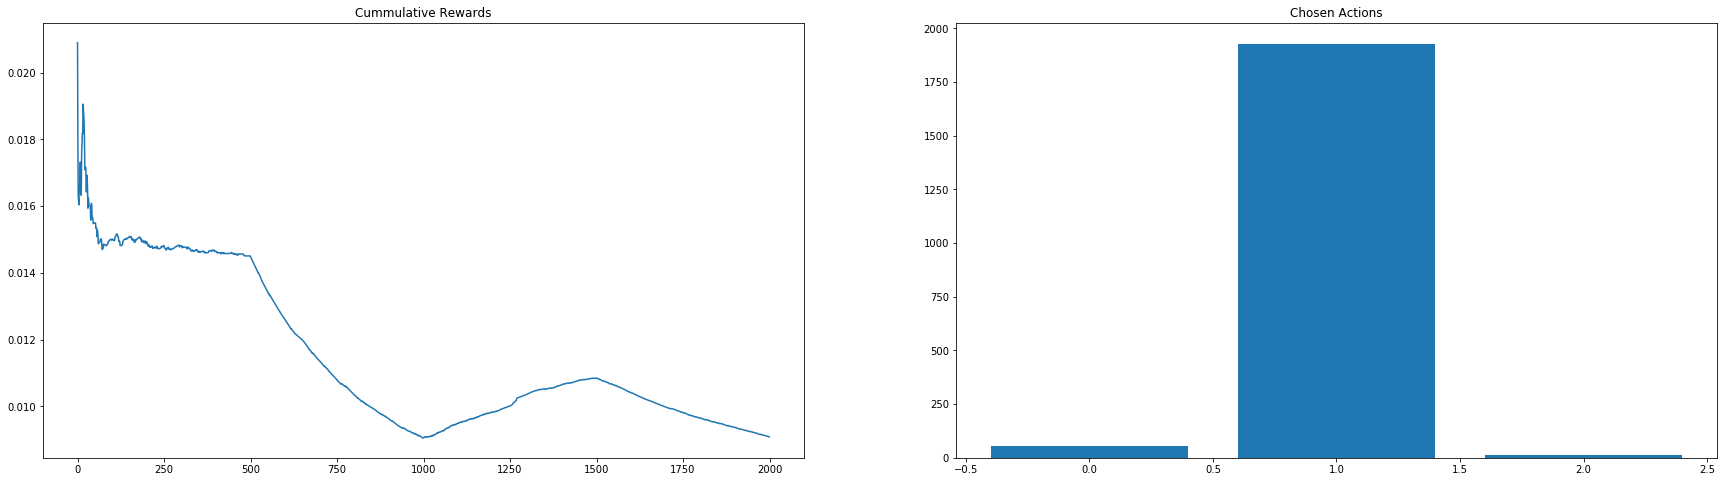

In [15]:
plot_history(rewards,cum_rewards, arm_counts)

In [25]:
epsilon=0.05
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

In [26]:
for n, elem in enumerate(list_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    
    print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__]  += (1/arm_counts[alg.__name__])*(reward-q_values[alg.__name__])
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)


<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93D

<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021

<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021

<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

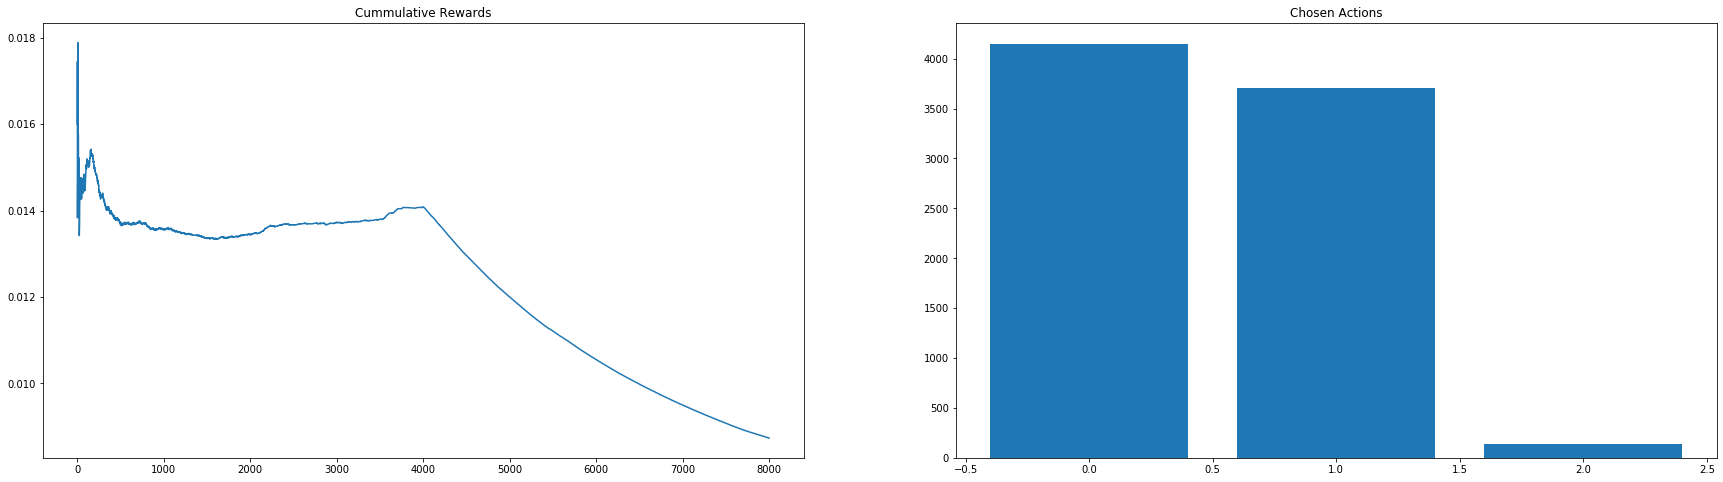

In [27]:
plot_history(rewards,cum_rewards, arm_counts)

## Thompson Sampling

# Probabs sampled from Beta distribution

In [6]:
from scipy.stats import t
#from scipy.stats import rv_continious
from scipy.stats import uniform

total_reward = 0
arm_rewards_old = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 

num_choices = len(choices)
sample_count = [0 for i in range(num_choices)]
sample_rewards = [0 for i in range(num_choices)]
sample_mean = [0.0 for i in range(num_choices)]
sample_var = [0.0 for i in range(num_choices)]
arm_rewards = {0: [], 1:[], 2:[]}


rewards = []
cum_rewards = []

In [75]:
for n, elem in enumerate(list_distributions_2):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    print("\n")
    print("Round:", n)
    theta = {}
    for i in range(len(choices)):
        if sample_count[i] >= 2:
            theta[i] = t.rvs(df=sample_count[i]-1,loc=sample_mean[i],scale=sample_var[i]/(sample_count[i]*(sample_count[i]-1)))
            print(choices_names[i],"Theta", theta[i])

        else:
            print("Else")
            theta[i] = uniform.rvs(loc=-10000000, scale=10000000)
            print(choices_names[i],"Theta", theta[i])
    
    choice = np.argmin([theta[i] for i in range(len(choices))])
    alg = choices[choice]
    alg_name = choices_names[choice]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)*(1)
    print("Chosen algorithm is: ", alg_name, "with reward:", reward)
    arm_rewards[choice].append(reward)
    sample_count[choice] += 1
    sample_rewards[choice] += reward
    #sample_mean[choice]  += (1/sample_count[choice])*(reward-sample_mean[choice])
    sample_mean[choice] = sample_rewards[choice]/sample_count[choice]
    sample_var[choice] += (sample_mean[choice]-reward)**2
    total_reward += reward
    arm_rewards_old[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__]  += (1/arm_counts[alg.__name__])*(reward-q_values[alg.__name__])
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)



Round: 0
Else
quick_sort Theta -5556739.8318080595
Else
merge_sort Theta -2667868.1444368204
Else
heap_sort Theta -6593564.811099923
Chosen algorithm is:  heap_sort with reward: 0.015


Round: 1
Else
quick_sort Theta -3159812.332203144
Else
merge_sort Theta -4072094.831686544
Else
heap_sort Theta -4285062.86794466
Chosen algorithm is:  heap_sort with reward: 0.011


Round: 2
Else
quick_sort Theta -7580147.722991316
Else
merge_sort Theta -341043.86533110216
heap_sort Theta 0.01300198853948177
Chosen algorithm is:  quick_sort with reward: 0.005


Round: 3
Else
quick_sort Theta -9054137.757457864
Else
merge_sort Theta -1528637.6475947108
heap_sort Theta 0.013001113423576877
Chosen algorithm is:  quick_sort with reward: 0.005


Round: 4
quick_sort Theta 0.005
Else
merge_sort Theta -7541678.3787937835
heap_sort Theta 0.013007615087476157
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 5
quick_sort Theta 0.005
Else
merge_sort Theta -9041073.303073687
heap_sort Theta 0.01300001

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 51
quick_sort Theta 0.005
merge_sort Theta 0.0040000090068165375
heap_sort Theta 0.012998341535580837
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 52
quick_sort Theta 0.005
merge_sort Theta 0.0040000059750609045
heap_sort Theta 0.012998386441886625
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 53
quick_sort Theta 0.005
merge_sort Theta 0.004000000370896497
heap_sort Theta 0.012990825457195227
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 54
quick_sort Theta 0.005
merge_sort Theta 0.0039800165307661
heap_sort Theta 0.013003916769216695
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 55
quick_sort Theta 0.005
merge_sort Theta 0.003980389439778329
heap_sort Theta 0.012996153096276105
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 56
quick_sort Theta 0.005
merge_sort Theta 0.003961533428801389
heap_sort Theta 0.013005886639512694
Chosen algorithm is:  merge_

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 103
quick_sort Theta 0.005
merge_sort Theta 0.003858590577524484
heap_sort Theta 0.012991308579010069
Chosen algorithm is:  merge_sort with reward: 0.0045


Round: 104
quick_sort Theta 0.005
merge_sort Theta 0.0038650023596712153
heap_sort Theta 0.012999232248680376
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 105
quick_sort Theta 0.005
merge_sort Theta 0.003866332441353363
heap_sort Theta 0.013025207723726942
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 106
quick_sort Theta 0.005
merge_sort Theta 0.0038774466128091755
heap_sort Theta 0.013000228686706103
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 107
quick_sort Theta 0.005
merge_sort Theta 0.003878651601754702
heap_sort Theta 0.012998622346187406
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 108
quick_sort Theta 0.005
merge_sort Theta 0.0038701930984275145
heap_sort Theta 0.012997550676016578
Chosen algorithm i

heap_sort Theta 0.012995374592869107
Chosen algorithm is:  merge_sort with reward: 0.006


Round: 155
quick_sort Theta 0.005
merge_sort Theta 0.003897355381277058
heap_sort Theta 0.012996950770108895
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 156
quick_sort Theta 0.005
merge_sort Theta 0.0038914519180599906
heap_sort Theta 0.012998888613459655
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 157
quick_sort Theta 0.005
merge_sort Theta 0.003885618349851344
heap_sort Theta 0.012997638992173453
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 158
quick_sort Theta 0.005
merge_sort Theta 0.0038863619733085636
heap_sort Theta 0.013005574936694032
Chosen algorithm is:  merge_sort with reward: 0.002


Round: 159
quick_sort Theta 0.005
merge_sort Theta 0.003874195008903959
heap_sort Theta 0.01300111973937072
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 160
quick_sort Theta 0.005
merge_sort Theta 0.0038685884459120747
heap_sort Theta 0.01

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 208
quick_sort Theta 0.005
merge_sort Theta 0.003829898915483739
heap_sort Theta 0.012998929101857282
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 209
quick_sort Theta 0.005
merge_sort Theta 0.0038307293801142744
heap_sort Theta 0.01300281924927679
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 210
quick_sort Theta 0.005
merge_sort Theta 0.0038315538737086195
heap_sort Theta 0.013002464478583073
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 211
quick_sort Theta 0.005
merge_sort Theta 0.003832366874796696
heap_sort Theta 0.013004867548679501
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 212
quick_sort Theta 0.005
merge_sort Theta 0.003833171705030856
heap_sort Theta 0.012999056408319496
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 213
quick_sort Theta 0.005
merge_sort Theta 0.0038291825500104746
heap_sort Theta 0.012995283493339586
Chosen algorithm is:

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 261
quick_sort Theta 0.005
merge_sort Theta 0.0037914364130716277
heap_sort Theta 0.012999190793237372
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 262
quick_sort Theta 0.005
merge_sort Theta 0.0037922510099680775
heap_sort Theta 0.013001433941771525
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 263
quick_sort Theta 0.005
merge_sort Theta 0.0037930460305724634
heap_sort Theta 0.01299760537183162
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 264
quick_sort Theta 0.005
merge_sort Theta 0.003793850692292914
heap_sort Theta 0.013000265514794013
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 265
quick_sort Theta 0.005
merge_sort Theta 0.0037946376679509385
heap_sort Theta 0.013001005928059589
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 266
quick_sort Theta 0.005
merge_sort Theta 0.003791599104911644
heap_sort Theta 0.01299123126668998
Chosen algorithm is:

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 314
quick_sort Theta 0.005
merge_sort Theta 0.003772256360261112
heap_sort Theta 0.013000601426836593
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 315
quick_sort Theta 0.005
merge_sort Theta 0.003772989557841847
heap_sort Theta 0.012996961105408813
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 316
quick_sort Theta 0.005
merge_sort Theta 0.0037705120751022185
heap_sort Theta 0.01300191006225966
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 317
quick_sort Theta 0.005
merge_sort Theta 0.003768055210215427
heap_sort Theta 0.012998546763541275
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 318
quick_sort Theta 0.005
merge_sort Theta 0.0037687889520344113
heap_sort Theta 0.012996343251267846
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 319
quick_sort Theta 0.005
merge_sort Theta 0.003769521215961936
heap_sort Theta 0.012997870694364854
Chosen algorithm is: 

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 367
quick_sort Theta 0.005
merge_sort Theta 0.003771351582964202
heap_sort Theta 0.01300056671964227
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 368
quick_sort Theta 0.005
merge_sort Theta 0.0037692298383239092
heap_sort Theta 0.012999088199159736
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 369
quick_sort Theta 0.005
merge_sort Theta 0.0037698628595883572
heap_sort Theta 0.012900961375713681
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 370
quick_sort Theta 0.005
merge_sort Theta 0.0037704939416399468
heap_sort Theta 0.013000848576454012
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 371
quick_sort Theta 0.005
merge_sort Theta 0.003771114837058851
heap_sort Theta 0.012994677453477049
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 372
quick_sort Theta 0.005
merge_sort Theta 0.003771740113383499
heap_sort Theta 0.012961823829507686
Chosen algorithm is:

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 420
quick_sort Theta 0.005
merge_sort Theta 0.0037572124746800407
heap_sort Theta 0.012998867058122478
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 421
quick_sort Theta 0.005
merge_sort Theta 0.0037553973509206187
heap_sort Theta 0.012999808655021133
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 422
quick_sort Theta 0.005
merge_sort Theta 0.0037559804352630234
heap_sort Theta 0.012999399004786921
Chosen algorithm is:  merge_sort with reward: 0.0042


Round: 423
quick_sort Theta 0.005
merge_sort Theta 0.003757040225165609
heap_sort Theta 0.012998521583340793
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 424
quick_sort Theta 0.005
merge_sort Theta 0.003755237037600543
heap_sort Theta 0.012964543550259463
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 425
quick_sort Theta 0.005
merge_sort Theta 0.0037534430933041855
heap_sort Theta 0.012999902329685056
Chosen algorithm 

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 474
quick_sort Theta 0.005
merge_sort Theta 0.003749574343439317
heap_sort Theta 0.013000490883227018
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 475
quick_sort Theta 0.005
merge_sort Theta 0.0037479827476503197
heap_sort Theta 0.012996156044272102
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 476
quick_sort Theta 0.005
merge_sort Theta 0.0037485160479303436
heap_sort Theta 0.013001536277311841
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 477
quick_sort Theta 0.005
merge_sort Theta 0.003746935218491116
heap_sort Theta 0.012999584650156066
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 478
quick_sort Theta 0.005
merge_sort Theta 0.0037474678687052948
heap_sort Theta 0.012998273374980286
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 479
quick_sort Theta 0.005
merge_sort Theta 0.0037458955729880745
heap_sort Theta 0.013002363461004767
Chosen algorithm i

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 528
quick_sort Theta 0.005
merge_sort Theta 0.0037471391385222423
heap_sort Theta 0.012997792895364997
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 529
quick_sort Theta 0.005
merge_sort Theta 0.0037457141028353954
heap_sort Theta 0.013001661820754736
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 530
quick_sort Theta 0.005
merge_sort Theta 0.003746196039507928
heap_sort Theta 0.013004528515800147
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 531
quick_sort Theta 0.005
merge_sort Theta 0.0037466804650996845
heap_sort Theta 0.01300607001438623
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 532
quick_sort Theta 0.005
merge_sort Theta 0.003745265373034817
heap_sort Theta 0.013000728158384248
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 533
quick_sort Theta 0.005
merge_sort Theta 0.0037457474448716367
heap_sort Theta 0.013000158661612075
Chosen algorithm is

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 587
quick_sort Theta 0.005
merge_sort Theta 0.0037711828354404565
heap_sort Theta 0.012999758347544767
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 588
quick_sort Theta 0.005
merge_sort Theta 0.0037715755686924435
heap_sort Theta 0.013003076157407045
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 589
quick_sort Theta 0.005
merge_sort Theta 0.003770257246822697
heap_sort Theta 0.013009046748937669
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 590
quick_sort Theta 0.005
merge_sort Theta 0.0037723548353766805
heap_sort Theta 0.013002730243069603
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 591
quick_sort Theta 0.005
merge_sort Theta 0.0037727428697611766
heap_sort Theta 0.012997698296296559
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 592
quick_sort Theta 0.005
merge_sort Theta 0.003773127651256154
heap_sort Theta 0.013002270583376415
Chosen algorithm i

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 644
quick_sort Theta 0.005
merge_sort Theta 0.003799843760714322
heap_sort Theta 0.012991933484659516
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 645
quick_sort Theta 0.005
merge_sort Theta 0.003801715249293946
heap_sort Theta 0.012996086092235935
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 646
quick_sort Theta 0.005
merge_sort Theta 0.0038004691856532748
heap_sort Theta 0.012999718494956838
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 647
quick_sort Theta 0.005
merge_sort Theta 0.003802330789998975
heap_sort Theta 0.012998384042558368
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 648
quick_sort Theta 0.005
merge_sort Theta 0.0038026394408317127
heap_sort Theta 0.012997349941164757
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 649
quick_sort Theta 0.005
merge_sort Theta 0.0038013951886579408
heap_sort Theta 0.013001095050173472
Chosen algorithm is


Round: 701
quick_sort Theta 0.005
merge_sort Theta 0.0038248198224377747
heap_sort Theta 0.01302638805359351
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 702
quick_sort Theta 0.005
merge_sort Theta 0.0038250723638052495
heap_sort Theta 0.013006503291872223
Chosen algorithm is:  merge_sort with reward: 0.0038


Round: 703
quick_sort Theta 0.005
merge_sort Theta 0.003825035944134526
heap_sort Theta 0.01299723327087785
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 704
quick_sort Theta 0.005
merge_sort Theta 0.0038252861276223903
heap_sort Theta 0.013012564940530947
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 705
quick_sort Theta 0.005
merge_sort Theta 0.003824109308446065
heap_sort Theta 0.013000707524342991
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 706
quick_sort Theta 0.005
merge_sort Theta 0.0038243602525956915
heap_sort Theta 0.013000622706313374
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 707
quick_s


Round: 755
quick_sort Theta 0.005
merge_sort Theta 0.00381984048520163
heap_sort Theta 0.012998412083533662
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 756
quick_sort Theta 0.005
merge_sort Theta 0.003820080191365793
heap_sort Theta 0.013000586917424768
Chosen algorithm is:  merge_sort with reward: 0.0032


Round: 757
quick_sort Theta 0.005
merge_sort Theta 0.003819254631367806
heap_sort Theta 0.012998466354873449
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 758
quick_sort Theta 0.005
merge_sort Theta 0.003818169440337298
heap_sort Theta 0.012993447074234997
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 759
quick_sort Theta 0.005
merge_sort Theta 0.0038184106860025724
heap_sort Theta 0.013000664133218235
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 760
quick_sort Theta 0.005
merge_sort Theta 0.003818650746261676
heap_sort Theta 0.012999596733873886
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 761
quick_sor

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 808
quick_sort Theta 0.005
merge_sort Theta 0.003816170230509018
heap_sort Theta 0.013007682935151237
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 809
quick_sort Theta 0.005
merge_sort Theta 0.003816397785741439
heap_sort Theta 0.012999575735564697
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 810
quick_sort Theta 0.005
merge_sort Theta 0.003816624769192744
heap_sort Theta 0.013002006200560546
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 811
quick_sort Theta 0.005
merge_sort Theta 0.0038156138800218664
heap_sort Theta 0.012997106701744116
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 812
quick_sort Theta 0.005
merge_sort Theta 0.0038158436198317373
heap_sort Theta 0.012961637983143573
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 813
quick_sort Theta 0.005
merge_sort Theta 0.0038160693606730323
heap_sort Theta 0.012988729126007124
Chosen algorithm is

quick_sort Theta 0.005
merge_sort Theta 0.0038187346479452134
heap_sort Theta 0.013004296684380443
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 859
quick_sort Theta 0.005
merge_sort Theta 0.0038189468477267657
heap_sort Theta 0.013000128451297955
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 860
quick_sort Theta 0.005
merge_sort Theta 0.0038191603709234034
heap_sort Theta 0.013000600530519197
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 861
quick_sort Theta 0.005
merge_sort Theta 0.0038205365901807973
heap_sort Theta 0.012999325531365801
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 862
quick_sort Theta 0.005
merge_sort Theta 0.003819579484594229
heap_sort Theta 0.013000325156362718
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 863
quick_sort Theta 0.005
merge_sort Theta 0.0038197914781339945
heap_sort Theta 0.013001416823093715
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 864
quick_sort Theta 

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 913
quick_sort Theta 0.005
merge_sort Theta 0.0038143018381429413
heap_sort Theta 0.012997174742897497
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 914
quick_sort Theta 0.005
merge_sort Theta 0.0038156047428814775
heap_sort Theta 0.012997795657015566
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 915
quick_sort Theta 0.005
merge_sort Theta 0.0038158076756509445
heap_sort Theta 0.013000068455455253
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 916
quick_sort Theta 0.005
merge_sort Theta 0.0038149117564418964
heap_sort Theta 0.01299852231741195
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 917
quick_sort Theta 0.005
merge_sort Theta 0.003814019954187208
heap_sort Theta 0.013015648024739371
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 918
quick_sort Theta 0.005
merge_sort Theta 0.003814223225567348
heap_sort Theta 0.012998203219662684
Chosen algorithm is



Round: 967
quick_sort Theta 0.005
merge_sort Theta 0.003849324775864024
heap_sort Theta 0.01300014651543898
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 968
quick_sort Theta 0.005
merge_sort Theta 0.0038484456518996482
heap_sort Theta 0.013000000107368013
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 969
quick_sort Theta 0.005
merge_sort Theta 0.003848600981248552
heap_sort Theta 0.012997205455678337
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 970
quick_sort Theta 0.005
merge_sort Theta 0.003848758040103017
heap_sort Theta 0.013003304971192538
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 971
quick_sort Theta 0.005
merge_sort Theta 0.003848913515962565
heap_sort Theta 0.012982430123593998
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 972
quick_sort Theta 0.005
merge_sort Theta 0.0038490685761129254
heap_sort Theta 0.01300264063412677
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 973
quick_sor

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1027
quick_sort Theta 0.005
merge_sort Theta 0.003857380686759337
heap_sort Theta 0.013008483801115288
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1028
quick_sort Theta 0.005
merge_sort Theta 0.0038565431883969157
heap_sort Theta 0.013003806466962664
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1029
quick_sort Theta 0.005
merge_sort Theta 0.003856683855870603
heap_sort Theta 0.01300068235271137
Chosen algorithm is:  merge_sort with reward: 0.0039


Round: 1030
quick_sort Theta 0.005
merge_sort Theta 0.003856725009015919
heap_sort Theta 0.013000771024868619
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1031
quick_sort Theta 0.005
merge_sort Theta 0.003855891633970897
heap_sort Theta 0.012998643913552882
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1032
quick_sort Theta 0.005
merge_sort Theta 0.0038550593816278774
heap_sort Theta 0.01300426690817384
Chosen algorith

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1085
quick_sort Theta 0.005
merge_sort Theta 0.003859943412910399
heap_sort Theta 0.012998507792930155
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1086
quick_sort Theta 0.005
merge_sort Theta 0.0038600743952629116
heap_sort Theta 0.012997172107951068
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1087
quick_sort Theta 0.005
merge_sort Theta 0.0038602029691954596
heap_sort Theta 0.013001111982293952
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1088
quick_sort Theta 0.005
merge_sort Theta 0.0038603320887290035
heap_sort Theta 0.01300230403588504
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1089
quick_sort Theta 0.005
merge_sort Theta 0.003860459665449629
heap_sort Theta 0.012904866236803429
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1090
quick_sort Theta 0.005
merge_sort Theta 0.0038605902617682296
heap_sort Theta 0.013004746661471214
Chosen algori

quick_sort Theta 0.005
merge_sort Theta 0.003857206048533863
heap_sort Theta 0.012998609985782806
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1136
quick_sort Theta 0.005
merge_sort Theta 0.0038573319984446072
heap_sort Theta 0.013000266035911716
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1137
quick_sort Theta 0.005
merge_sort Theta 0.003857458705916645
heap_sort Theta 0.012998320106885071
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1138
quick_sort Theta 0.005
merge_sort Theta 0.0038575836855052345
heap_sort Theta 0.012995562609229778
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1139
quick_sort Theta 0.005
merge_sort Theta 0.003857709828854541
heap_sort Theta 0.012997063922065403
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1140
quick_sort Theta 0.005
merge_sort Theta 0.0038578337665086354
heap_sort Theta 0.012999669101494955
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1141
quick_sort Th

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1190
quick_sort Theta 0.005
merge_sort Theta 0.0038486516486159437
heap_sort Theta 0.012998409372821708
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1191
quick_sort Theta 0.005
merge_sort Theta 0.0038487789245317977
heap_sort Theta 0.01300222259232511
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1192
quick_sort Theta 0.005
merge_sort Theta 0.003848063438212665
heap_sort Theta 0.012995762551210143
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1193
quick_sort Theta 0.005
merge_sort Theta 0.0038481922551697814
heap_sort Theta 0.012998519039882002
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1194
quick_sort Theta 0.005
merge_sort Theta 0.0038483199573499305
heap_sort Theta 0.013000187743841207
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1195
quick_sort Theta 0.005
merge_sort Theta 0.003847608071785328
heap_sort Theta 0.012995134987854684
Chosen algori

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1243
quick_sort Theta 0.005
merge_sort Theta 0.0038745765376333005
heap_sort Theta 0.01299780061509107
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1244
quick_sort Theta 0.005
merge_sort Theta 0.003873870556050933
heap_sort Theta 0.012999978858418021
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1245
quick_sort Theta 0.005
merge_sort Theta 0.003873973042211002
heap_sort Theta 0.01299590357525531
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1246
quick_sort Theta 0.005
merge_sort Theta 0.0038740741912103504
heap_sort Theta 0.013001272612136787
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1247
quick_sort Theta 0.005
merge_sort Theta 0.003873371125599812
heap_sort Theta 0.012998080570680385
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1248
quick_sort Theta 0.005
merge_sort Theta 0.003873473009976677
heap_sort Theta 0.012997439849178834
Chosen algorithm

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1293
quick_sort Theta 0.005
merge_sort Theta 0.003883164935099398
heap_sort Theta 0.012998747569689146
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1294
quick_sort Theta 0.005
merge_sort Theta 0.003883256029059788
heap_sort Theta 0.013003283289003935
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1295
quick_sort Theta 0.005
merge_sort Theta 0.00388334703104956
heap_sort Theta 0.012998774241891007
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1296
quick_sort Theta 0.005
merge_sort Theta 0.0038834358539582992
heap_sort Theta 0.012999662916644448
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1297
quick_sort Theta 0.005
merge_sort Theta 0.0038835261901850977
heap_sort Theta 0.012993669191958858
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1298
quick_sort Theta 0.005
merge_sort Theta 0.0038836166299514555
heap_sort Theta 0.01299622752465575
Chosen algorith

heap_sort Theta 0.013007469423159744
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1345
quick_sort Theta 0.005
merge_sort Theta 0.00387449743790594
heap_sort Theta 0.013001510489897242
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1346
quick_sort Theta 0.005
merge_sort Theta 0.0038753361499676998
heap_sort Theta 0.012912645252942312
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1347
quick_sort Theta 0.005
merge_sort Theta 0.003874684705036153
heap_sort Theta 0.01318453383820989
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1348
quick_sort Theta 0.005
merge_sort Theta 0.0038747768933861003
heap_sort Theta 0.012998392322681783
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1349
quick_sort Theta 0.005
merge_sort Theta 0.0038748706937375955
heap_sort Theta 0.012995667400920447
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1350
quick_sort Theta 0.005
merge_sort Theta 0.003874962550462041
heap_sort Theta

quick_sort Theta 0.005
merge_sort Theta 0.0038991370818417864
heap_sort Theta 0.013000657204132541
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1396
quick_sort Theta 0.005
merge_sort Theta 0.0038999281420053497
heap_sort Theta 0.013004524809611652
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1397
quick_sort Theta 0.005
merge_sort Theta 0.003900717915274892
heap_sort Theta 0.013000516224641366
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1398
quick_sort Theta 0.005
merge_sort Theta 0.003900071144972958
heap_sort Theta 0.01300265917217318
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1399
quick_sort Theta 0.005
merge_sort Theta 0.003899425220204316
heap_sort Theta 0.01299489997990779
Chosen algorithm is:  merge_sort with reward: 0.006


Round: 1400
quick_sort Theta 0.005
merge_sort Theta 0.003900931990599262
heap_sort Theta 0.012999720115972913
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1401
quick_sort Theta

merge_sort Theta 0.003909959351267131
heap_sort Theta 0.013001702768800074
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1451
quick_sort Theta 0.005
merge_sort Theta 0.0039100213609455
heap_sort Theta 0.012995378055334118
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1452
quick_sort Theta 0.005
merge_sort Theta 0.003909391906203472
heap_sort Theta 0.012998684752346088
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1453
quick_sort Theta 0.005
merge_sort Theta 0.003908763848755981
heap_sort Theta 0.013001261933178647
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1454
quick_sort Theta 0.005
merge_sort Theta 0.0039088274769278255
heap_sort Theta 0.012995469115215494
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1455
quick_sort Theta 0.005
merge_sort Theta 0.003908890465649074
heap_sort Theta 0.01299801445300552
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1456
quick_sort Theta 0.005
merge_sort Theta 0

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1508
quick_sort Theta 0.005
merge_sort Theta 0.003912765376907557
heap_sort Theta 0.012991008710076891
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1509
quick_sort Theta 0.005
merge_sort Theta 0.003912823914321376
heap_sort Theta 0.012990015698016184
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1510
quick_sort Theta 0.005
merge_sort Theta 0.003912881710786031
heap_sort Theta 0.012809101447186314
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1511
quick_sort Theta 0.005
merge_sort Theta 0.003912276132338968
heap_sort Theta 0.012991951509755132
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1512
quick_sort Theta 0.005
merge_sort Theta 0.0039123342878924095
heap_sort Theta 0.01300215904351055
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1513
quick_sort Theta 0.005
merge_sort Theta 0.003912391490862632
heap_sort Theta 0.013000812868360764
Chosen algorithm

merge_sort Theta 0.0039142855450646505
heap_sort Theta 0.012999167488022632
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1559
quick_sort Theta 0.005
merge_sort Theta 0.003914340888113249
heap_sort Theta 0.012998290251113908
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1560
quick_sort Theta 0.005
merge_sort Theta 0.0039143962564694166
heap_sort Theta 0.01300115369396189
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1561
quick_sort Theta 0.005
merge_sort Theta 0.003914449741603493
heap_sort Theta 0.012999393460467011
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1562
quick_sort Theta 0.005
merge_sort Theta 0.003914506372676007
heap_sort Theta 0.012998020514555916
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1563
quick_sort Theta 0.005
merge_sort Theta 0.003913918886713845
heap_sort Theta 0.01300426105402612
Chosen algorithm is:  merge_sort with reward: 0.002


Round: 1564
quick_sort Theta 0.005
merge_sort Theta

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1610
quick_sort Theta 0.005
merge_sort Theta 0.0039064761667632
heap_sort Theta 0.012998883239252171
Chosen algorithm is:  merge_sort with reward: 0.0034


Round: 1611
quick_sort Theta 0.005
merge_sort Theta 0.003906160985441823
heap_sort Theta 0.013009068429768672
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1612
quick_sort Theta 0.005
merge_sort Theta 0.0039062192021441034
heap_sort Theta 0.01299868005907153
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1613
quick_sort Theta 0.005
merge_sort Theta 0.003906276793414237
heap_sort Theta 0.01299850425290823
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1614
quick_sort Theta 0.005
merge_sort Theta 0.003906335607601308
heap_sort Theta 0.013000210113731136
Chosen algorithm is:  merge_sort with reward: 0.0031


Round: 1615
quick_sort Theta 0.005
merge_sort Theta 0.0039058335960988158
heap_sort Theta 0.01300259882915264
Chosen algorithm 

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1661
quick_sort Theta 0.005
merge_sort Theta 0.0039033197187596275
heap_sort Theta 0.012998790158516429
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1662
quick_sort Theta 0.005
merge_sort Theta 0.003903378143993658
heap_sort Theta 0.012998888523534735
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1663
quick_sort Theta 0.005
merge_sort Theta 0.003902833753576836
heap_sort Theta 0.013000275903220926
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1664
quick_sort Theta 0.005
merge_sort Theta 0.003902289356681711
heap_sort Theta 0.012903350505378835
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1665
quick_sort Theta 0.005
merge_sort Theta 0.003902348236699313
heap_sort Theta 0.013000062157886856
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1666
quick_sort Theta 0.005
merge_sort Theta 0.0039024062826245273
heap_sort Theta 0.013000446140418872
Chosen algorit



Round: 1713
quick_sort Theta 0.005
merge_sort Theta 0.003899004993763636
heap_sort Theta 0.013008959964108658
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1714
quick_sort Theta 0.005
merge_sort Theta 0.0038990642910349854
heap_sort Theta 0.012999768911287872
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1715
quick_sort Theta 0.005
merge_sort Theta 0.0038985387234909646
heap_sort Theta 0.013099421813276068
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1716
quick_sort Theta 0.005
merge_sort Theta 0.0038980133249547928
heap_sort Theta 0.012994530407030878
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1717
quick_sort Theta 0.005
merge_sort Theta 0.0038974896922891176
heap_sort Theta 0.012999597226264608
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1718
quick_sort Theta 0.005
merge_sort Theta 0.0038969655161873056
heap_sort Theta 0.01300044713066942
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 171

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1768
quick_sort Theta 0.005
merge_sort Theta 0.0038879814097506835
heap_sort Theta 0.013023536095585915
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1769
quick_sort Theta 0.005
merge_sort Theta 0.003887478943915908
heap_sort Theta 0.012996943335275476
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1770
quick_sort Theta 0.005
merge_sort Theta 0.0038875425990488
heap_sort Theta 0.012997977998070587
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1771
quick_sort Theta 0.005
merge_sort Theta 0.0038876059190199926
heap_sort Theta 0.012989203739140753
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1772
quick_sort Theta 0.005
merge_sort Theta 0.003887104146999866
heap_sort Theta 0.013017941104722352
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1773
quick_sort Theta 0.005
merge_sort Theta 0.003887168025273415
heap_sort Theta 0.013026494833032145
Chosen algorithm

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1822
quick_sort Theta 0.005
merge_sort Theta 0.0038847082920474675
heap_sort Theta 0.012984250152480179
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1823
quick_sort Theta 0.005
merge_sort Theta 0.003884222092938369
heap_sort Theta 0.012999733808213282
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1824
quick_sort Theta 0.005
merge_sort Theta 0.0038837358131758723
heap_sort Theta 0.013001634578593232
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1825
quick_sort Theta 0.005
merge_sort Theta 0.0038832505843069535
heap_sort Theta 0.012995547057726025
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1826
quick_sort Theta 0.005
merge_sort Theta 0.003883314809812248
heap_sort Theta 0.013002200329498658
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1827
quick_sort Theta 0.005
merge_sort Theta 0.0038833792000568606
heap_sort Theta 0.013003162574492487
Chosen algor

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1876
quick_sort Theta 0.005
merge_sort Theta 0.0038808759294482985
heap_sort Theta 0.01300241049565956
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1877
quick_sort Theta 0.005
merge_sort Theta 0.003880939673099982
heap_sort Theta 0.013001901161908988
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1878
quick_sort Theta 0.005
merge_sort Theta 0.003881003480344948
heap_sort Theta 0.01299872883891541
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1879
quick_sort Theta 0.005
merge_sort Theta 0.003881067214607975
heap_sort Theta 0.01300263102063173
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1880
quick_sort Theta 0.005
merge_sort Theta 0.0038805969139444623
heap_sort Theta 0.012990028301035917
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1881
quick_sort Theta 0.005
merge_sort Theta 0.003880127942624045
heap_sort Theta 0.012997686288822018
Chosen algorithm 

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 1930
quick_sort Theta 0.005
merge_sort Theta 0.003875909298554398
heap_sort Theta 0.012998867316590373
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1931
quick_sort Theta 0.005
merge_sort Theta 0.0038759726165483815
heap_sort Theta 0.013003048510400583
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1932
quick_sort Theta 0.005
merge_sort Theta 0.0038760380185085285
heap_sort Theta 0.012999898651378036
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1933
quick_sort Theta 0.005
merge_sort Theta 0.003876101571815921
heap_sort Theta 0.012998022490147703
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1934
quick_sort Theta 0.005
merge_sort Theta 0.003875647424545407
heap_sort Theta 0.012996357938421882
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1935
quick_sort Theta 0.005
merge_sort Theta 0.003875194690894859
heap_sort Theta 0.013004726161415691
Chosen algorit

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 1984
quick_sort Theta 0.005
merge_sort Theta 0.00387121186646259
heap_sort Theta 0.01300080427005178
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1985
quick_sort Theta 0.005
merge_sort Theta 0.0038707722512433544
heap_sort Theta 0.012998556664150783
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1986
quick_sort Theta 0.005
merge_sort Theta 0.003870837374444836
heap_sort Theta 0.013003106920855743
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1987
quick_sort Theta 0.005
merge_sort Theta 0.003870398191662203
heap_sort Theta 0.012997921638402434
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 1988
quick_sort Theta 0.005
merge_sort Theta 0.0038699591263880203
heap_sort Theta 0.01299973782990376
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 1989
quick_sort Theta 0.005
merge_sort Theta 0.003870025280032718
heap_sort Theta 0.013000387818783064
Chosen algorithm 

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 2038
quick_sort Theta 0.005
merge_sort Theta 0.0038652897132020908
heap_sort Theta 0.012999742539369797
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2039
quick_sort Theta 0.005
merge_sort Theta 0.003864865185984805
heap_sort Theta 0.013014971870241943
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2040
quick_sort Theta 0.005
merge_sort Theta 0.003864931382251691
heap_sort Theta 0.01299990224702178
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2041
quick_sort Theta 0.005
merge_sort Theta 0.0038649975832996827
heap_sort Theta 0.013000327555169163
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2042
quick_sort Theta 0.005
merge_sort Theta 0.0038650635421225016
heap_sort Theta 0.012991506508712483
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2043
quick_sort Theta 0.005
merge_sort Theta 0.0038646394112616285
heap_sort Theta 0.012994283614748447
Chosen algori

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 2091
quick_sort Theta 0.005
merge_sort Theta 0.0038643988496142195
heap_sort Theta 0.013000696637437437
Chosen algorithm is:  merge_sort with reward: 0.002


Round: 2092
quick_sort Theta 0.005
merge_sort Theta 0.003863506351148798
heap_sort Theta 0.013002180333636915
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2093
quick_sort Theta 0.005
merge_sort Theta 0.0038630927363548563
heap_sort Theta 0.012998879990467277
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2094
quick_sort Theta 0.005
merge_sort Theta 0.0038626787322943276
heap_sort Theta 0.013007177053250427
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2095
quick_sort Theta 0.005
merge_sort Theta 0.00386226656397376
heap_sort Theta 0.013000010042369305
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2096
quick_sort Theta 0.005
merge_sort Theta 0.003862332695050978
heap_sort Theta 0.013004391652344127
Chosen algorit

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 2145
quick_sort Theta 0.005
merge_sort Theta 0.003860812694862118
heap_sort Theta 0.012999178338807227
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2146
quick_sort Theta 0.005
merge_sort Theta 0.0038608777807086305
heap_sort Theta 0.012999206054000416
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2147
quick_sort Theta 0.005
merge_sort Theta 0.0038604756767906365
heap_sort Theta 0.012999267089695364
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2148
quick_sort Theta 0.005
merge_sort Theta 0.0038605407828024227
heap_sort Theta 0.013000907323878055
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2149
quick_sort Theta 0.005
merge_sort Theta 0.0038606063651109774
heap_sort Theta 0.012978472036903697
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2150
quick_sort Theta 0.005
merge_sort Theta 0.003860205198122925
heap_sort Theta 0.012999746735577042
Chosen algor

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 2199
quick_sort Theta 0.005
merge_sort Theta 0.003857996072395431
heap_sort Theta 0.013001144713848176
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2200
quick_sort Theta 0.005
merge_sort Theta 0.0038580600783654066
heap_sort Theta 0.01300031524104867
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2201
quick_sort Theta 0.005
merge_sort Theta 0.0038581246927285357
heap_sort Theta 0.012997512556281185
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2202
quick_sort Theta 0.005
merge_sort Theta 0.0038577341217381623
heap_sort Theta 0.013001639334560057
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2203
quick_sort Theta 0.005
merge_sort Theta 0.003857799014176306
heap_sort Theta 0.013002616895967047
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2204
quick_sort Theta 0.005
merge_sort Theta 0.003857863511854968
heap_sort Theta 0.013018746710265022
Chosen algorit

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 2254
quick_sort Theta 0.005
merge_sort Theta 0.003856044456288985
heap_sort Theta 0.012999470940971338
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2255
quick_sort Theta 0.005
merge_sort Theta 0.0038561078673758496
heap_sort Theta 0.013000076826781353
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2256
quick_sort Theta 0.005
merge_sort Theta 0.003856172422699166
heap_sort Theta 0.01299960600442445
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2257
quick_sort Theta 0.005
merge_sort Theta 0.003856235786331548
heap_sort Theta 0.013011620766664601
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2258
quick_sort Theta 0.005
merge_sort Theta 0.003856299282954969
heap_sort Theta 0.013002837440161242
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2259
quick_sort Theta 0.005
merge_sort Theta 0.003855919703188739
heap_sort Theta 0.013000755410639414
Chosen algorithm

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 2309
quick_sort Theta 0.005
merge_sort Theta 0.0038529716788539147
heap_sort Theta 0.013001062723585905
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2310
quick_sort Theta 0.005
merge_sort Theta 0.003853035131708823
heap_sort Theta 0.01296427417622803
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2311
quick_sort Theta 0.005
merge_sort Theta 0.003852665873169068
heap_sort Theta 0.01299906260914451
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2312
quick_sort Theta 0.005
merge_sort Theta 0.003852729883319162
heap_sort Theta 0.012999430352037426
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2313
quick_sort Theta 0.005
merge_sort Theta 0.0038527934981738314
heap_sort Theta 0.013003091149821969
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2314
quick_sort Theta 0.005
merge_sort Theta 0.003852856975468157
heap_sort Theta 0.013000335651720053
Chosen algorithm

heap_sort Theta 0.0130016066708418
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 2363
quick_sort Theta 0.005
merge_sort Theta 0.003850190484032733
heap_sort Theta 0.012996323413658509
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2364
quick_sort Theta 0.005
merge_sort Theta 0.003850254023192217
heap_sort Theta 0.012999004711941549
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2365
quick_sort Theta 0.005
merge_sort Theta 0.003850317786763922
heap_sort Theta 0.012967534600357943
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2366
quick_sort Theta 0.005
merge_sort Theta 0.0038499583328070845
heap_sort Theta 0.013008130013928044
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2367
quick_sort Theta 0.005
merge_sort Theta 0.003850020861493559
heap_sort Theta 0.012999853653327282
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2368
quick_sort Theta 0.005
merge_sort Theta 0.0038496611869889273
heap_sort Theta 

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2417
quick_sort Theta 0.005
merge_sort Theta 0.003845504035757985
heap_sort Theta 0.012994339373953367
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2418
quick_sort Theta 0.005
merge_sort Theta 0.0038455674351028793
heap_sort Theta 0.013006046324713395
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2419
quick_sort Theta 0.005
merge_sort Theta 0.0038452174908495656
heap_sort Theta 0.013003455024946082
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2420
quick_sort Theta 0.005
merge_sort Theta 0.0038452811326089693
heap_sort Theta 0.013000544921480396
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2421
quick_sort Theta 0.005
merge_sort Theta 0.003844931807169178
heap_sort Theta 0.013001320144558884
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2422
quick_sort Theta 0.005
merge_sort Theta 0.003844581917048601
heap_sort Theta 0.013003582894560741
Chosen algori



Round: 2470
quick_sort Theta 0.005
merge_sort Theta 0.0038433087353950336
heap_sort Theta 0.012998761178315742
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2471
quick_sort Theta 0.005
merge_sort Theta 0.0038433727906942946
heap_sort Theta 0.012998537791289184
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2472
quick_sort Theta 0.005
merge_sort Theta 0.003843435831895888
heap_sort Theta 0.0129984615412696
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2473
quick_sort Theta 0.005
merge_sort Theta 0.003843499227676325
heap_sort Theta 0.013002600450632704
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2474
quick_sort Theta 0.005
merge_sort Theta 0.003843562819045335
heap_sort Theta 0.012999316475807966
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2475
quick_sort Theta 0.005
merge_sort Theta 0.0038436258461316043
heap_sort Theta 0.013001846204816437
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2476
q

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 2525
quick_sort Theta 0.005
merge_sort Theta 0.0038424433864350863
heap_sort Theta 0.013313160127857248
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2526
quick_sort Theta 0.005
merge_sort Theta 0.0038425056254001275
heap_sort Theta 0.01299654188069143
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2527
quick_sort Theta 0.005
merge_sort Theta 0.00384256861965625
heap_sort Theta 0.012999307499913043
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2528
quick_sort Theta 0.005
merge_sort Theta 0.0038426305579636493
heap_sort Theta 0.012999608330684306
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2529
quick_sort Theta 0.005
merge_sort Theta 0.003842297075830786
heap_sort Theta 0.013000501068262706
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2530
quick_sort Theta 0.005
merge_sort Theta 0.0038423594649323626
heap_sort Theta 0.013004217114466815
Chosen algorit

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 2579
quick_sort Theta 0.005
merge_sort Theta 0.0038399222697653567
heap_sort Theta 0.01299795923412064
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2580
quick_sort Theta 0.005
merge_sort Theta 0.0038395962767187987
heap_sort Theta 0.012998951952367954
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2581
quick_sort Theta 0.005
merge_sort Theta 0.0038392706036087976
heap_sort Theta 0.013005611333607564
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2582
quick_sort Theta 0.005
merge_sort Theta 0.0038393333131553965
heap_sort Theta 0.01299771113037019
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2583
quick_sort Theta 0.005
merge_sort Theta 0.003839007156887073
heap_sort Theta 0.012998076495090466
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2584
quick_sort Theta 0.005
merge_sort Theta 0.00383906961481967
heap_sort Theta 0.013001496072842563
Chosen algorith

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 2633
quick_sort Theta 0.005
merge_sort Theta 0.003840205279928072
heap_sort Theta 0.012984879568154046
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2634
quick_sort Theta 0.005
merge_sort Theta 0.003840266305100284
heap_sort Theta 0.013000292021219734
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2635
quick_sort Theta 0.005
merge_sort Theta 0.00383994658817306
heap_sort Theta 0.013000213048849433
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2636
quick_sort Theta 0.005
merge_sort Theta 0.003840007314908668
heap_sort Theta 0.013000461364562252
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2637
quick_sort Theta 0.005
merge_sort Theta 0.0038396884268610053
heap_sort Theta 0.013000840416685838
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2638
quick_sort Theta 0.005
merge_sort Theta 0.003839749412000339
heap_sort Theta 0.013004373350327527
Chosen algorithm

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 2689
quick_sort Theta 0.005
merge_sort Theta 0.003838547807025761
heap_sort Theta 0.012997169853632575
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2690
quick_sort Theta 0.005
merge_sort Theta 0.003838607534972753
heap_sort Theta 0.012987345434702412
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2691
quick_sort Theta 0.005
merge_sort Theta 0.0038386672731842175
heap_sort Theta 0.01299942819010975
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2692
quick_sort Theta 0.005
merge_sort Theta 0.0038383558926208647
heap_sort Theta 0.012914961990789944
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2693
quick_sort Theta 0.005
merge_sort Theta 0.0038380441248069873
heap_sort Theta 0.01299672442574232
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2694
quick_sort Theta 0.005
merge_sort Theta 0.003837732368742339
heap_sort Theta 0.012997105807747433
Chosen algorith

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 2744
quick_sort Theta 0.005
merge_sort Theta 0.0038361681600188866
heap_sort Theta 0.01298228108488461
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2745
quick_sort Theta 0.005
merge_sort Theta 0.003836227549972921
heap_sort Theta 0.01299797365756416
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2746
quick_sort Theta 0.005
merge_sort Theta 0.0038359225318261307
heap_sort Theta 0.013008310047840558
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2747
quick_sort Theta 0.005
merge_sort Theta 0.0038359824373966575
heap_sort Theta 0.013001909786077426
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2748
quick_sort Theta 0.005
merge_sort Theta 0.0038356778175056092
heap_sort Theta 0.012998085582652167
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2749
quick_sort Theta 0.005
merge_sort Theta 0.003835737724825299
heap_sort Theta 0.012999652202937771
Chosen algorit

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 2799
quick_sort Theta 0.005
merge_sort Theta 0.003835455627989365
heap_sort Theta 0.013005880087637237
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2800
quick_sort Theta 0.005
merge_sort Theta 0.003835514930888138
heap_sort Theta 0.013003821939452239
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2801
quick_sort Theta 0.005
merge_sort Theta 0.003835573803283481
heap_sort Theta 0.01301176329195256
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2802
quick_sort Theta 0.005
merge_sort Theta 0.003835632913996193
heap_sort Theta 0.013002400416507354
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2803
quick_sort Theta 0.005
merge_sort Theta 0.00383569158028677
heap_sort Theta 0.012997316925589763
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2804
quick_sort Theta 0.005
merge_sort Theta 0.0038353922953920402
heap_sort Theta 0.013002645146879412
Chosen algorithm 

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2853
quick_sort Theta 0.005
merge_sort Theta 0.003836117887792558
heap_sort Theta 0.013000478580271082
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2854
quick_sort Theta 0.005
merge_sort Theta 0.003836175797483896
heap_sort Theta 0.012993639115796748
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2855
quick_sort Theta 0.005
merge_sort Theta 0.0038362330349984326
heap_sort Theta 0.013001045445608254
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2856
quick_sort Theta 0.005
merge_sort Theta 0.003836290165614974
heap_sort Theta 0.01300032562190776
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2857
quick_sort Theta 0.005
merge_sort Theta 0.003836347807227112
heap_sort Theta 0.012994563178469792
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2858
quick_sort Theta 0.005
merge_sort Theta 0.003836405108277684
heap_sort Theta 0.012999130642916992
Chosen algorithm

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 2909
quick_sort Theta 0.005
merge_sort Theta 0.0038379000565768313
heap_sort Theta 0.012998407758121432
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2910
quick_sort Theta 0.005
merge_sort Theta 0.003837612098996124
heap_sort Theta 0.012825015831609818
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2911
quick_sort Theta 0.005
merge_sort Theta 0.0038376678623374223
heap_sort Theta 0.013000863538959694
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2912
quick_sort Theta 0.005
merge_sort Theta 0.0038373791959809707
heap_sort Theta 0.013001307840705226
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2913
quick_sort Theta 0.005
merge_sort Theta 0.0038370916760766655
heap_sort Theta 0.012999468978850326
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2914
quick_sort Theta 0.005
merge_sort Theta 0.0038368042296381107
heap_sort Theta 0.012979662058444037
Chosen algo

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 2963
quick_sort Theta 0.005
merge_sort Theta 0.0038364650183491176
heap_sort Theta 0.013001535391873606
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 2964
quick_sort Theta 0.005
merge_sort Theta 0.003836858017557304
heap_sort Theta 0.013031111068093515
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2965
quick_sort Theta 0.005
merge_sort Theta 0.0038369130044236853
heap_sort Theta 0.012998112624334238
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2966
quick_sort Theta 0.005
merge_sort Theta 0.0038369684723056395
heap_sort Theta 0.012979346125958774
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 2967
quick_sort Theta 0.005
merge_sort Theta 0.0038366858781349153
heap_sort Theta 0.01299918875549244
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 2968
quick_sort Theta 0.005
merge_sort Theta 0.0038367409471150747
heap_sort Theta 0.013001453480260338
Chosen algor

quick_sort Theta 0.005
merge_sort Theta 0.0038383463899335475
heap_sort Theta 0.012997874054472969
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3017
quick_sort Theta 0.005
merge_sort Theta 0.003838731693012249
heap_sort Theta 0.01300062228294583
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3018
quick_sort Theta 0.005
merge_sort Theta 0.0038384538064899073
heap_sort Theta 0.013000107647203803
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3019
quick_sort Theta 0.005
merge_sort Theta 0.0038388394339569664
heap_sort Theta 0.012996643812539593
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3020
quick_sort Theta 0.005
merge_sort Theta 0.0038388927471611684
heap_sort Theta 0.013001140397078722
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3021
quick_sort Theta 0.005
merge_sort Theta 0.003838945624674456
heap_sort Theta 0.012987136292586321
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3022
quick_sort Th

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 3072
quick_sort Theta 0.005
merge_sort Theta 0.003839993651308035
heap_sort Theta 0.012999685350081223
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3073
quick_sort Theta 0.005
merge_sort Theta 0.0038400453925601552
heap_sort Theta 0.01300164911119767
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3074
quick_sort Theta 0.005
merge_sort Theta 0.0038400978070497875
heap_sort Theta 0.013001205548536248
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3075
quick_sort Theta 0.005
merge_sort Theta 0.0038401498161930976
heap_sort Theta 0.012999594601756688
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3076
quick_sort Theta 0.005
merge_sort Theta 0.0038398759634371057
heap_sort Theta 0.01299899009438453
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3077
quick_sort Theta 0.005
merge_sort Theta 0.003839602902250495
heap_sort Theta 0.01299974781537999
Chosen algorith

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3126
quick_sort Theta 0.005
merge_sort Theta 0.003839237478207809
heap_sort Theta 0.012987704718273103
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3127
quick_sort Theta 0.005
merge_sort Theta 0.003839289329189477
heap_sort Theta 0.013002968690924875
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3128
quick_sort Theta 0.005
merge_sort Theta 0.0038390206156778232
heap_sort Theta 0.012988875019397638
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3129
quick_sort Theta 0.005
merge_sort Theta 0.0038390715971170887
heap_sort Theta 0.013000330296717193
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3130
quick_sort Theta 0.005
merge_sort Theta 0.0038391234528062216
heap_sort Theta 0.013000564681306247
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3131
quick_sort Theta 0.005
merge_sort Theta 0.0038391748624897097
heap_sort Theta 0.012998354819830676
Chosen algor

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3181
quick_sort Theta 0.005
merge_sort Theta 0.0038366700774440936
heap_sort Theta 0.012999596496832567
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3182
quick_sort Theta 0.005
merge_sort Theta 0.0038364067103442857
heap_sort Theta 0.01300359124859757
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3183
quick_sort Theta 0.005
merge_sort Theta 0.003836457978104834
heap_sort Theta 0.012990640282686422
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3184
quick_sort Theta 0.005
merge_sort Theta 0.0038361948455005275
heap_sort Theta 0.012995921352617679
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3185
quick_sort Theta 0.005
merge_sort Theta 0.0038362465081189243
heap_sort Theta 0.012998032639597897
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3186
quick_sort Theta 0.005
merge_sort Theta 0.0038359835480704743
heap_sort Theta 0.01299852637881354
Chosen algori

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3236
quick_sort Theta 0.005
merge_sort Theta 0.0038422030198972637
heap_sort Theta 0.013011261490889886
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3237
quick_sort Theta 0.005
merge_sort Theta 0.0038422518190331352
heap_sort Theta 0.012998969979780471
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3238
quick_sort Theta 0.005
merge_sort Theta 0.0038422999231940845
heap_sort Theta 0.0130130993661439
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3239
quick_sort Theta 0.005
merge_sort Theta 0.00384234945064425
heap_sort Theta 0.012999929389573176
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3240
quick_sort Theta 0.005
merge_sort Theta 0.0038423980477032362
heap_sort Theta 0.012998699086808157
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3241
quick_sort Theta 0.005
merge_sort Theta 0.003842138049989273
heap_sort Theta 0.012997156112356823
Chosen algorith

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3290
quick_sort Theta 0.005
merge_sort Theta 0.0038426657131816343
heap_sort Theta 0.013006345708873485
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3291
quick_sort Theta 0.005
merge_sort Theta 0.0038427135430932078
heap_sort Theta 0.013013878876065242
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3292
quick_sort Theta 0.005
merge_sort Theta 0.003842457588835083
heap_sort Theta 0.013022716546380774
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3293
quick_sort Theta 0.005
merge_sort Theta 0.0038425054522302714
heap_sort Theta 0.01299993539600689
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3294
quick_sort Theta 0.005
merge_sort Theta 0.003842248974466401
heap_sort Theta 0.0130013105223225
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3295
quick_sort Theta 0.005
merge_sort Theta 0.0038422969235635336
heap_sort Theta 0.0130028191519373
Chosen algorithm 



Round: 3344
quick_sort Theta 0.005
merge_sort Theta 0.003839730393947208
heap_sort Theta 0.012999806612321148
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3345
quick_sort Theta 0.005
merge_sort Theta 0.00383947930443713
heap_sort Theta 0.012924439406177166
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3346
quick_sort Theta 0.005
merge_sort Theta 0.0038392279461728998
heap_sort Theta 0.01300270603576963
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3347
quick_sort Theta 0.005
merge_sort Theta 0.0038392756444048572
heap_sort Theta 0.012998858775860865
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3348
quick_sort Theta 0.005
merge_sort Theta 0.003839025015255359
heap_sort Theta 0.012995053730794192
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3349
quick_sort Theta 0.005
merge_sort Theta 0.003839073062188843
heap_sort Theta 0.013002457832529495
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3350
qu

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3399
quick_sort Theta 0.005
merge_sort Theta 0.003837849841788718
heap_sort Theta 0.012994831143050214
Chosen algorithm is:  merge_sort with reward: 0.0041


Round: 3400
quick_sort Theta 0.005
merge_sort Theta 0.003837927148349335
heap_sort Theta 0.012996265297078764
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3401
quick_sort Theta 0.005
merge_sort Theta 0.0038376803989700206
heap_sort Theta 0.013000010681703554
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3402
quick_sort Theta 0.005
merge_sort Theta 0.003837433772813406
heap_sort Theta 0.012999257716605194
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3403
quick_sort Theta 0.005
merge_sort Theta 0.0038374812974131083
heap_sort Theta 0.01300055354687057
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3404
quick_sort Theta 0.005
merge_sort Theta 0.0038375295428552227
heap_sort Theta 0.012986099826822296
Chosen algori

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3454
quick_sort Theta 0.005
merge_sort Theta 0.0038357388782370183
heap_sort Theta 0.013005286931981754
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3455
quick_sort Theta 0.005
merge_sort Theta 0.003835497292984749
heap_sort Theta 0.012964683825862766
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3456
quick_sort Theta 0.005
merge_sort Theta 0.003835544826899583
heap_sort Theta 0.013002376473383514
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3457
quick_sort Theta 0.005
merge_sort Theta 0.0038353026353882724
heap_sort Theta 0.01300566347574491
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3458
quick_sort Theta 0.005
merge_sort Theta 0.003835349992762778
heap_sort Theta 0.012997410114064164
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3459
quick_sort Theta 0.005
merge_sort Theta 0.0038353977933429395
heap_sort Theta 0.013018248768327923
Chosen algorit

quick_sort Theta 0.005
merge_sort Theta 0.0038321538640632134
heap_sort Theta 0.013017669939309542
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3510
quick_sort Theta 0.005
merge_sort Theta 0.0038324870302794134
heap_sort Theta 0.012980756038272786
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3511
quick_sort Theta 0.005
merge_sort Theta 0.0038322500020099384
heap_sort Theta 0.012996016132243287
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3512
quick_sort Theta 0.005
merge_sort Theta 0.0038322975233508437
heap_sort Theta 0.013000845094467844
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3513
quick_sort Theta 0.005
merge_sort Theta 0.0038323452006668738
heap_sort Theta 0.012998649560725961
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3514
quick_sort Theta 0.005
merge_sort Theta 0.0038323931311915194
heap_sort Theta 0.013001126208166522
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3515
quick_sort

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3563
quick_sort Theta 0.005
merge_sort Theta 0.0038353470593674058
heap_sort Theta 0.013001460690158933
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3564
quick_sort Theta 0.005
merge_sort Theta 0.0038353930808096817
heap_sort Theta 0.01299925809115835
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3565
quick_sort Theta 0.005
merge_sort Theta 0.0038354393321393884
heap_sort Theta 0.01299903146369145
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3566
quick_sort Theta 0.005
merge_sort Theta 0.003835485975476279
heap_sort Theta 0.013001256749182325
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3567
quick_sort Theta 0.005
merge_sort Theta 0.0038355317636785662
heap_sort Theta 0.013002829383465208
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3568
quick_sort Theta 0.005
merge_sort Theta 0.003835297338916139
heap_sort Theta 0.01300076483540836
Chosen algorith



Round: 3616
quick_sort Theta 0.005
merge_sort Theta 0.003834164144745139
heap_sort Theta 0.012999429427888825
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3617
quick_sort Theta 0.005
merge_sort Theta 0.003833932710639844
heap_sort Theta 0.01299914201530112
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3618
quick_sort Theta 0.005
merge_sort Theta 0.0038339786527190854
heap_sort Theta 0.012997617137080112
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3619
quick_sort Theta 0.005
merge_sort Theta 0.003834024906766882
heap_sort Theta 0.01300094235477539
Chosen algorithm is:  merge_sort with reward: 0.0038


Round: 3620
quick_sort Theta 0.005
merge_sort Theta 0.0038340157009229977
heap_sort Theta 0.01300464996310691
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3621
quick_sort Theta 0.005
merge_sort Theta 0.003834061194458249
heap_sort Theta 0.013000059181489474
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3622
qu



Round: 3670
quick_sort Theta 0.005
merge_sort Theta 0.003834369632869288
heap_sort Theta 0.012989404618822831
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3671
quick_sort Theta 0.005
merge_sort Theta 0.0038344152356940913
heap_sort Theta 0.013000377314904825
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3672
quick_sort Theta 0.005
merge_sort Theta 0.0038344600154491676
heap_sort Theta 0.012934541048874688
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3673
quick_sort Theta 0.005
merge_sort Theta 0.003834232741052647
heap_sort Theta 0.012998654495380256
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3674
quick_sort Theta 0.005
merge_sort Theta 0.003834277776301602
heap_sort Theta 0.012994143594867818
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3675
quick_sort Theta 0.005
merge_sort Theta 0.0038343230329573653
heap_sort Theta 0.013037225343101429
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3676

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3726
quick_sort Theta 0.005
merge_sort Theta 0.0038347125469269734
heap_sort Theta 0.012997950822288223
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3727
quick_sort Theta 0.005
merge_sort Theta 0.003834756683179533
heap_sort Theta 0.013000425176486084
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3728
quick_sort Theta 0.005
merge_sort Theta 0.0038348012004494315
heap_sort Theta 0.01299858360271608
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3729
quick_sort Theta 0.005
merge_sort Theta 0.0038348455322382725
heap_sort Theta 0.012999777329345914
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3730
quick_sort Theta 0.005
merge_sort Theta 0.0038348898989420065
heap_sort Theta 0.013027427328987994
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3731
quick_sort Theta 0.005
merge_sort Theta 0.0038349342716470763
heap_sort Theta 0.013002646878485976
Chosen algor

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3780
quick_sort Theta 0.005
merge_sort Theta 0.003835116600351827
heap_sort Theta 0.012999966544284383
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3781
quick_sort Theta 0.005
merge_sort Theta 0.0038351603498807635
heap_sort Theta 0.013002692636850775
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3782
quick_sort Theta 0.005
merge_sort Theta 0.0038349388911748795
heap_sort Theta 0.012994109687735685
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3783
quick_sort Theta 0.005
merge_sort Theta 0.0038349828551026617
heap_sort Theta 0.013000191756057466
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3784
quick_sort Theta 0.005
merge_sort Theta 0.0038347618351231303
heap_sort Theta 0.012997437192853314
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3785
quick_sort Theta 0.005
merge_sort Theta 0.00383480551077631
heap_sort Theta 0.012998016755746251
Chosen algori

Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3834
quick_sort Theta 0.005
merge_sort Theta 0.0038340466395384003
heap_sort Theta 0.01300242130421595
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3835
quick_sort Theta 0.005
merge_sort Theta 0.003834090212232625
heap_sort Theta 0.012992877329838302
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3836
quick_sort Theta 0.005
merge_sort Theta 0.0038341337077067404
heap_sort Theta 0.012993232140723152
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3837
quick_sort Theta 0.005
merge_sort Theta 0.003834176922601443
heap_sort Theta 0.01300002890007155
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3838
quick_sort Theta 0.005
merge_sort Theta 0.0038339590472207564
heap_sort Theta 0.0129963517660016
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3839
quick_sort Theta 0.005
merge_sort Theta 0.0038337420934783104
heap_sort Theta 0.012998799457750202
Chosen algorithm

Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3888
quick_sort Theta 0.005
merge_sort Theta 0.0038351700302848
heap_sort Theta 0.012996502904844482
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3889
quick_sort Theta 0.005
merge_sort Theta 0.00383521252742304
heap_sort Theta 0.013001623242645205
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3890
quick_sort Theta 0.005
merge_sort Theta 0.0038352546330313163
heap_sort Theta 0.01304712016402207
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3891
quick_sort Theta 0.005
merge_sort Theta 0.003835296882833766
heap_sort Theta 0.013001622370795064
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3892
quick_sort Theta 0.005
merge_sort Theta 0.0038353395150974457
heap_sort Theta 0.013900584778661414
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3893
quick_sort Theta 0.005
merge_sort Theta 0.003835124996436444
heap_sort Theta 0.013012325206566972
Chosen algorithm i

heap_sort Theta 0.01298739232309637
Chosen algorithm is:  merge_sort with reward: 0.005


Round: 3944
quick_sort Theta 0.005
merge_sort Theta 0.0038331724431348545
heap_sort Theta 0.012999567071774132
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3945
quick_sort Theta 0.005
merge_sort Theta 0.003833214914438811
heap_sort Theta 0.012998804786541184
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3946
quick_sort Theta 0.005
merge_sort Theta 0.0038330035588383204
heap_sort Theta 0.013008950617462727
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3947
quick_sort Theta 0.005
merge_sort Theta 0.0038330460734119004
heap_sort Theta 0.012998335802225994
Chosen algorithm is:  merge_sort with reward: 0.003


Round: 3948
quick_sort Theta 0.005
merge_sort Theta 0.0038328346510963732
heap_sort Theta 0.012999906022668418
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3949
quick_sort Theta 0.005
merge_sort Theta 0.0038328769395427112
heap_sort Th

Chosen algorithm is:  merge_sort with reward: 0.006


Round: 3998
quick_sort Theta 0.005
merge_sort Theta 0.003832423705996686
heap_sort Theta 0.012998044873489694
Chosen algorithm is:  merge_sort with reward: 0.004


Round: 3999
quick_sort Theta 0.005
merge_sort Theta 0.003832465468760838
heap_sort Theta 0.01300138397751213
Chosen algorithm is:  merge_sort with reward: 0.004
Total reward 15.3507
Average rewards per algo {'quick_sort': 0.005, 'merge_sort': 0.0038325075075075093, 'heap_sort': 0.013}
Count per chosen algo {'quick_sort': 2, 'merge_sort': 3996, 'heap_sort': 2}


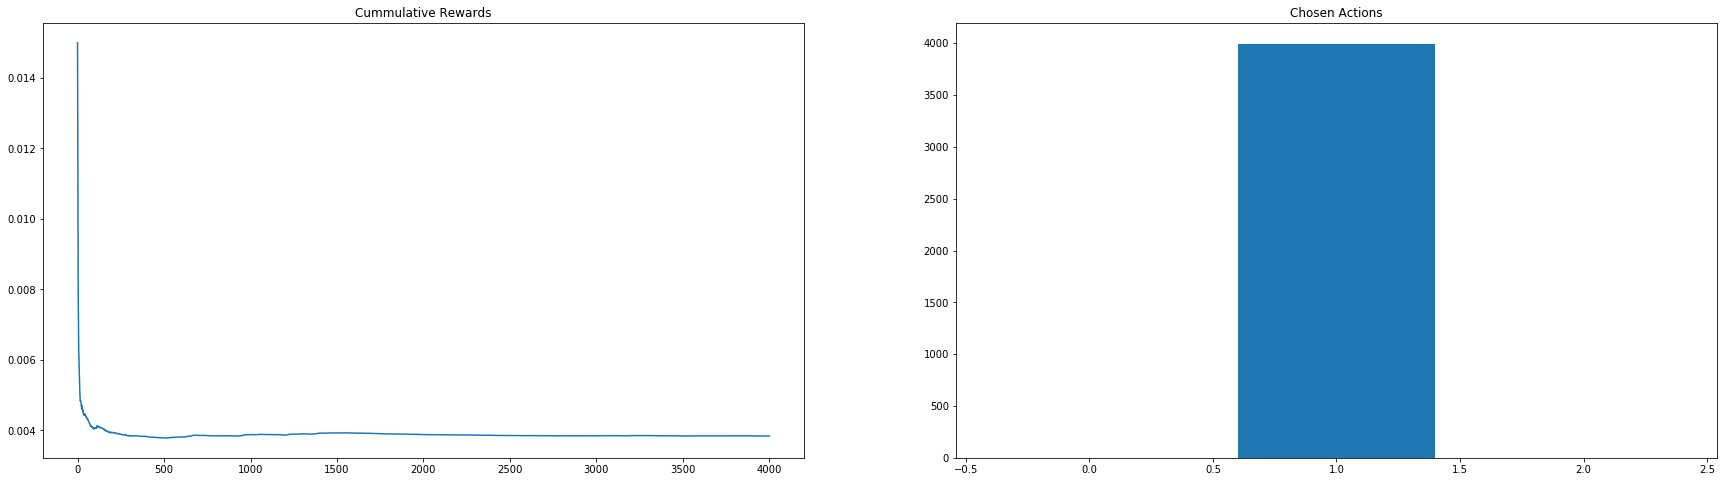

In [76]:
plot_history(rewards,cum_rewards, arm_counts)

In [10]:
total_reward = 0
arm_rewards_old = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 

num_choices = len(choices)
sample_count = [0 for i in range(num_choices)]
sample_rewards = [0 for i in range(num_choices)]
sample_mean = [0.0 for i in range(num_choices)]
sample_var = [0.0 for i in range(num_choices)]
arm_rewards = {0: [], 1:[], 2:[]}


rewards = []
cum_rewards = []

In [11]:
for n, elem in enumerate(list_distributions):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    print("\n")
    print("Round:", n)
    theta = {}
    for i in range(len(choices)):
        if sample_count[i] >= 2:
            theta[i] = t.rvs(df=sample_count[i]-1,loc=sample_mean[i],scale=sample_var[i]/(sample_count[i]*(sample_count[i]-1))*1000)
            print(choices_names[i],"Theta", theta[i])

        else:
            print("Else")
            theta[i] = uniform.rvs(loc=-10000000, scale=10000000)
            print(choices_names[i],"Theta", theta[i])
    
    choice = np.argmin([theta[i] for i in range(len(choices))])
    alg = choices[choice]
    alg_name = choices_names[choice]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)*(1)
    print("Chosen algorithm is: ", alg_name, "with reward:", reward)
    arm_rewards[choice].append(reward)
    sample_count[choice] += 1
    sample_rewards[choice] += reward
    sample_mean[choice]  += (1/sample_count[choice])*(reward-sample_mean[choice])
    #sample_mean[choice] = sample_rewards[choice]/sample_count[choice]
    sample_var[choice] += (sample_mean[choice]-reward)**2
    #print(sample_var[choice])
    total_reward += reward
    arm_rewards_old[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__]  += (1/arm_counts[alg.__name__])*(reward-q_values[alg.__name__])
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)



Round: 0
Else
quick_sort Theta -1912765.5040602265
Else
merge_sort Theta -6867035.413760535
Else
heap_sort Theta -6851117.164259966
Chosen algorithm is:  merge_sort with reward: 0.2822


Round: 1
Else
quick_sort Theta -4149989.320054069
Else
merge_sort Theta -4024318.8551111575
Else
heap_sort Theta -380611.2147546597
Chosen algorithm is:  quick_sort with reward: 0.2663


Round: 2
Else
quick_sort Theta -1533803.1578285582
Else
merge_sort Theta -7751025.716269266
Else
heap_sort Theta -5298356.9519626945
Chosen algorithm is:  merge_sort with reward: 0.2992


Round: 3
Else
quick_sort Theta -725356.8051961772
merge_sort Theta 0.3296242544569413
Else
heap_sort Theta -13174.611645963043
Chosen algorithm is:  quick_sort with reward: 0.3072


Round: 4
quick_sort Theta 0.7492538171063525
merge_sort Theta 0.29249651465111437
Else
heap_sort Theta -8225725.400847383
Chosen algorithm is:  heap_sort with reward: 0.748


Round: 5
quick_sort Theta 0.3618545790551212
merge_sort Theta 0.311462110269880

Chosen algorithm is:  quick_sort with reward: 0.2852


Round: 48
quick_sort Theta 0.279202501432302
merge_sort Theta 0.2993722144116942
heap_sort Theta 0.7230081904519399
Chosen algorithm is:  quick_sort with reward: 0.2703


Round: 49
quick_sort Theta 0.27752735531260103
merge_sort Theta 0.29601958417260005
heap_sort Theta 0.7307255558822194
Chosen algorithm is:  quick_sort with reward: 0.2743


Round: 50
quick_sort Theta 0.2762378142431072
merge_sort Theta 0.3018616550044853
heap_sort Theta 0.7368330866428822
Chosen algorithm is:  quick_sort with reward: 0.2573


Round: 51
quick_sort Theta 0.27904344109185025
merge_sort Theta 0.29639704928967203
heap_sort Theta 0.7026810210498942
Chosen algorithm is:  quick_sort with reward: 0.2723


Round: 52
quick_sort Theta 0.27634855770973576
merge_sort Theta 0.2913445739509138
heap_sort Theta 0.7052464740726707
Chosen algorithm is:  quick_sort with reward: 0.2683


Round: 53
quick_sort Theta 0.27769515744351886
merge_sort Theta 0.291876373989165

Chosen algorithm is:  quick_sort with reward: 0.2583


Round: 96
quick_sort Theta 0.2708650197518174
merge_sort Theta 0.29751963456971803
heap_sort Theta 0.7452145519516316
Chosen algorithm is:  quick_sort with reward: 0.2603


Round: 97
quick_sort Theta 0.2728543262311874
merge_sort Theta 0.29167188744686223
heap_sort Theta 0.7110300290425847
Chosen algorithm is:  quick_sort with reward: 0.2633


Round: 98
quick_sort Theta 0.27230853677244776
merge_sort Theta 0.30692483347988303
heap_sort Theta 0.7495932258852965
Chosen algorithm is:  quick_sort with reward: 0.2653


Round: 99
quick_sort Theta 0.2720262781367089
merge_sort Theta 0.2821908776469708
heap_sort Theta 0.31289263412973584
Chosen algorithm is:  quick_sort with reward: 0.2693


Round: 100
quick_sort Theta 0.2718712560015646
merge_sort Theta 0.2968618238495327
heap_sort Theta 0.7438433931683243
Chosen algorithm is:  quick_sort with reward: 0.2713


Round: 101
quick_sort Theta 0.2707150467156253
merge_sort Theta 0.2944063595073

Chosen algorithm is:  quick_sort with reward: 0.2673


Round: 144
quick_sort Theta 0.2707749813579771
merge_sort Theta 0.28951172260096436
heap_sort Theta 0.7169493226180809
Chosen algorithm is:  quick_sort with reward: 0.2872


Round: 145
quick_sort Theta 0.2699831342093346
merge_sort Theta 0.3056265445437597
heap_sort Theta 0.6743964245066842
Chosen algorithm is:  quick_sort with reward: 0.2613


Round: 146
quick_sort Theta 0.2769143156618531
merge_sort Theta 0.30269122489025296
heap_sort Theta 0.6768996518393655
Chosen algorithm is:  quick_sort with reward: 0.2902


Round: 147
quick_sort Theta 0.27301686038117284
merge_sort Theta 0.29550968026716906
heap_sort Theta 0.7160456635059858
Chosen algorithm is:  quick_sort with reward: 0.2653


Round: 148
quick_sort Theta 0.275825529953087
merge_sort Theta 0.28686396646255874
heap_sort Theta 0.7512078294718811
Chosen algorithm is:  quick_sort with reward: 0.2763


Round: 149
quick_sort Theta 0.27099946050305285
merge_sort Theta 0.311082260

Chosen algorithm is:  quick_sort with reward: 0.2653


Round: 192
quick_sort Theta 0.2767764188717264
merge_sort Theta 0.2988413279347036
heap_sort Theta 0.7499677716093848
Chosen algorithm is:  quick_sort with reward: 0.2673


Round: 193
quick_sort Theta 0.2737806541265267
merge_sort Theta 0.3003854266629567
heap_sort Theta 0.7599582376922271
Chosen algorithm is:  quick_sort with reward: 0.2723


Round: 194
quick_sort Theta 0.2744469257698363
merge_sort Theta 0.29504709873592794
heap_sort Theta 0.7795949486917897
Chosen algorithm is:  quick_sort with reward: 0.2683


Round: 195
quick_sort Theta 0.2760860859260302
merge_sort Theta 0.2933901006709113
heap_sort Theta 0.7355873882439956
Chosen algorithm is:  quick_sort with reward: 0.2723


Round: 196
quick_sort Theta 0.27535451504490843
merge_sort Theta 0.29271553547717366
heap_sort Theta 0.7216156704697597
Chosen algorithm is:  quick_sort with reward: 0.2703


Round: 197
quick_sort Theta 0.2731402214030135
merge_sort Theta 0.29524335171

Chosen algorithm is:  quick_sort with reward: 0.2693


Round: 240
quick_sort Theta 0.27172398448078966
merge_sort Theta 0.2953416791023577
heap_sort Theta 0.6949953157727717
Chosen algorithm is:  quick_sort with reward: 0.2693


Round: 241
quick_sort Theta 0.27232736918063094
merge_sort Theta 0.2862735058872524
heap_sort Theta 0.7470275284891175
Chosen algorithm is:  quick_sort with reward: 0.2623


Round: 242
quick_sort Theta 0.27197994681486043
merge_sort Theta 0.28510747410860476
heap_sort Theta 0.7416170651124595
Chosen algorithm is:  quick_sort with reward: 0.2543


Round: 243
quick_sort Theta 0.2737412688903169
merge_sort Theta 0.2938182121070817
heap_sort Theta 0.7142407107850474
Chosen algorithm is:  quick_sort with reward: 0.2643


Round: 244
quick_sort Theta 0.2723828318280188
merge_sort Theta 0.29141098079493
heap_sort Theta 0.8485622541670615
Chosen algorithm is:  quick_sort with reward: 0.2583


Round: 245
quick_sort Theta 0.27225994887431887
merge_sort Theta 0.28892363340


Round: 287
quick_sort Theta 0.2724182055509404
merge_sort Theta 0.28895586679061785
heap_sort Theta 0.6963866901211809
Chosen algorithm is:  quick_sort with reward: 0.379


Round: 288
quick_sort Theta 0.2725761799598682
merge_sort Theta 0.29941601687728725
heap_sort Theta 0.7108172892049893
Chosen algorithm is:  quick_sort with reward: 0.368


Round: 289
quick_sort Theta 0.2734555575959896
merge_sort Theta 0.2880179565273212
heap_sort Theta 0.7509046004592932
Chosen algorithm is:  quick_sort with reward: 0.3162


Round: 290
quick_sort Theta 0.2731777362704171
merge_sort Theta 0.2930890461481578
heap_sort Theta 0.7156666519796244
Chosen algorithm is:  quick_sort with reward: 0.3441


Round: 291
quick_sort Theta 0.2713880340156305
merge_sort Theta 0.296412669272573
heap_sort Theta -0.02180914943306622
Chosen algorithm is:  heap_sort with reward: 0.769


Round: 292
quick_sort Theta 0.27312588977796265
merge_sort Theta 0.29952206992120683
heap_sort Theta 0.7264375039288526
Chosen algorith

Chosen algorithm is:  quick_sort with reward: 0.2785


Round: 335
quick_sort Theta 0.2747550227764112
merge_sort Theta 0.304293704065869
heap_sort Theta 0.9376583573781928
Chosen algorithm is:  quick_sort with reward: 0.2627


Round: 336
quick_sort Theta 0.27424623240039364
merge_sort Theta 0.2931573223111489
heap_sort Theta 0.7245502715517788
Chosen algorithm is:  quick_sort with reward: 0.2867


Round: 337
quick_sort Theta 0.2743579399627808
merge_sort Theta 0.30152282812136366
heap_sort Theta 0.7819653503793764
Chosen algorithm is:  quick_sort with reward: 0.2652


Round: 338
quick_sort Theta 0.2733474697180676
merge_sort Theta 0.29448401028438037
heap_sort Theta 0.8025627523894115
Chosen algorithm is:  quick_sort with reward: 0.2535


Round: 339
quick_sort Theta 0.27359217617797404
merge_sort Theta 0.298880940092947
heap_sort Theta 0.6824522096836979
Chosen algorithm is:  quick_sort with reward: 0.2696


Round: 340
quick_sort Theta 0.2742146309029646
merge_sort Theta 0.304215603785

Chosen algorithm is:  quick_sort with reward: 0.2623


Round: 383
quick_sort Theta 0.2743781870723367
merge_sort Theta 0.3021499556135264
heap_sort Theta 0.7016454424502305
Chosen algorithm is:  quick_sort with reward: 0.2784


Round: 384
quick_sort Theta 0.2730156482939371
merge_sort Theta 0.29446943706849776
heap_sort Theta 0.8782031890891837
Chosen algorithm is:  quick_sort with reward: 0.2789


Round: 385
quick_sort Theta 0.27487602692082186
merge_sort Theta 0.2913530917231549
heap_sort Theta -0.2395041102606167
Chosen algorithm is:  heap_sort with reward: 0.7171


Round: 386
quick_sort Theta 0.27342100652799534
merge_sort Theta 0.2978749071466496
heap_sort Theta 0.6455444280107103
Chosen algorithm is:  quick_sort with reward: 0.2511


Round: 387
quick_sort Theta 0.2715838438296692
merge_sort Theta 0.2847334946715286
heap_sort Theta 0.8289247431404873
Chosen algorithm is:  quick_sort with reward: 0.2695


Round: 388
quick_sort Theta 0.27359913380982015
merge_sort Theta 0.2875724198

Chosen algorithm is:  quick_sort with reward: 0.2713


Round: 431
quick_sort Theta 0.2737849671015358
merge_sort Theta 0.29673324739204826
heap_sort Theta 0.7540706634227436
Chosen algorithm is:  quick_sort with reward: 0.2623


Round: 432
quick_sort Theta 0.27171467553202944
merge_sort Theta 0.29639351790731866
heap_sort Theta 0.7837645591610554
Chosen algorithm is:  quick_sort with reward: 0.2713


Round: 433
quick_sort Theta 0.27419458044373257
merge_sort Theta 0.29177491918224674
heap_sort Theta 0.7064131908567854
Chosen algorithm is:  quick_sort with reward: 0.2583


Round: 434
quick_sort Theta 0.2731802591960163
merge_sort Theta 0.29914206881255245
heap_sort Theta 0.39939887959241777
Chosen algorithm is:  quick_sort with reward: 0.2872


Round: 435
quick_sort Theta 0.27185185340869933
merge_sort Theta 0.2907650165962716
heap_sort Theta 0.7678953424965365
Chosen algorithm is:  quick_sort with reward: 0.2673


Round: 436
quick_sort Theta 0.2718532849881293
merge_sort Theta 0.287311

Chosen algorithm is:  quick_sort with reward: 0.2563


Round: 479
quick_sort Theta 0.2729667023261028
merge_sort Theta 0.31011467542744836
heap_sort Theta 0.6544117533718581
Chosen algorithm is:  quick_sort with reward: 0.2713


Round: 480
quick_sort Theta 0.27248528255467186
merge_sort Theta 0.279577367128659
heap_sort Theta 0.7399612585387373
Chosen algorithm is:  quick_sort with reward: 0.2603


Round: 481
quick_sort Theta 0.27224633334487713
merge_sort Theta 0.30791419182104596
heap_sort Theta 0.6533526217728287
Chosen algorithm is:  quick_sort with reward: 0.2603


Round: 482
quick_sort Theta 0.2722180467779611
merge_sort Theta 0.2929891085404783
heap_sort Theta 0.6673169334605986
Chosen algorithm is:  quick_sort with reward: 0.2683


Round: 483
quick_sort Theta 0.27227696015849967
merge_sort Theta 0.2905004833185417
heap_sort Theta 0.638846059444137
Chosen algorithm is:  quick_sort with reward: 0.2623


Round: 484
quick_sort Theta 0.27301796301114073
merge_sort Theta 0.2895363896



Round: 526
quick_sort Theta 0.2574798749340072
merge_sort Theta 0.29292128903730175
heap_sort Theta 0.8565115022799149
Chosen algorithm is:  quick_sort with reward: 0.0798


Round: 527
quick_sort Theta 0.2693682779291796
merge_sort Theta 0.28432689845392894
heap_sort Theta 0.7927776826516479
Chosen algorithm is:  quick_sort with reward: 0.0878


Round: 528
quick_sort Theta 0.2553333245084483
merge_sort Theta 0.29291424715653386
heap_sort Theta 0.7481864342114772
Chosen algorithm is:  quick_sort with reward: 0.0768


Round: 529
quick_sort Theta 0.2622678821755666
merge_sort Theta 0.28702377794262973
heap_sort Theta 0.6694392047085401
Chosen algorithm is:  quick_sort with reward: 0.0768


Round: 530
quick_sort Theta 0.26384927086255633
merge_sort Theta 0.30146698466059835
heap_sort Theta 0.8477678301795041
Chosen algorithm is:  quick_sort with reward: 0.0818


Round: 531
quick_sort Theta 0.26147705485499695
merge_sort Theta 0.2936145245429079
heap_sort Theta 0.6207976886928133
Chosen a



Round: 574
quick_sort Theta 0.24149416097979245
merge_sort Theta 0.2992022793670833
heap_sort Theta 0.764918566116944
Chosen algorithm is:  quick_sort with reward: 0.0828


Round: 575
quick_sort Theta 0.2469521668626754
merge_sort Theta 0.2996376071707503
heap_sort Theta 0.7954854250359507
Chosen algorithm is:  quick_sort with reward: 0.0798


Round: 576
quick_sort Theta 0.2437000905993346
merge_sort Theta 0.2880248232602399
heap_sort Theta 0.7212261247253061
Chosen algorithm is:  quick_sort with reward: 0.0788


Round: 577
quick_sort Theta 0.24074741409089526
merge_sort Theta 0.29848825788692224
heap_sort Theta 0.6879472292317921
Chosen algorithm is:  quick_sort with reward: 0.0838


Round: 578
quick_sort Theta 0.2400185603540167
merge_sort Theta 0.2795868371518568
heap_sort Theta 0.7132067866640929
Chosen algorithm is:  quick_sort with reward: 0.0778


Round: 579
quick_sort Theta 0.2445185382203974
merge_sort Theta 0.29571306414007537
heap_sort Theta 0.6702888192296281
Chosen algor



Round: 622
quick_sort Theta 0.2505818422461788
merge_sort Theta 0.29641667105406017
heap_sort Theta 0.4103754394049894
Chosen algorithm is:  quick_sort with reward: 0.0768


Round: 623
quick_sort Theta 0.22010946444393062
merge_sort Theta 0.297172737594497
heap_sort Theta 0.7337277381605066
Chosen algorithm is:  quick_sort with reward: 0.0748


Round: 624
quick_sort Theta 0.2238160395741837
merge_sort Theta 0.2916015748509773
heap_sort Theta 0.7084722275021883
Chosen algorithm is:  quick_sort with reward: 0.0728


Round: 625
quick_sort Theta 0.23281378312223544
merge_sort Theta 0.29045206964150805
heap_sort Theta 0.7313168205378817
Chosen algorithm is:  quick_sort with reward: 0.0778


Round: 626
quick_sort Theta 0.2375292654403361
merge_sort Theta 0.29909514393739584
heap_sort Theta 0.6979841644777045
Chosen algorithm is:  quick_sort with reward: 0.0738


Round: 627
quick_sort Theta 0.22064791496506772
merge_sort Theta 0.3092514129231931
heap_sort Theta 0.7553756034549522
Chosen alg



Round: 670
quick_sort Theta 0.1894509712837313
merge_sort Theta 0.2876863387342754
heap_sort Theta 0.7554844065420165
Chosen algorithm is:  quick_sort with reward: 0.0848


Round: 671
quick_sort Theta 0.22158417552468607
merge_sort Theta 0.2900355699004895
heap_sort Theta 0.5757118288237408
Chosen algorithm is:  quick_sort with reward: 0.0778


Round: 672
quick_sort Theta 0.2106050315165523
merge_sort Theta 0.2995959902345205
heap_sort Theta 0.7317600596014447
Chosen algorithm is:  quick_sort with reward: 0.0828


Round: 673
quick_sort Theta 0.22128513764056784
merge_sort Theta 0.298372247491716
heap_sort Theta 0.8825217891341519
Chosen algorithm is:  quick_sort with reward: 0.0788


Round: 674
quick_sort Theta 0.1994857237621769
merge_sort Theta 0.2956586337277388
heap_sort Theta 0.8454949683289268
Chosen algorithm is:  quick_sort with reward: 0.0748


Round: 675
quick_sort Theta 0.19487721711174727
merge_sort Theta 0.2991278610104303
heap_sort Theta 0.7859119860913902
Chosen algori



Round: 718
quick_sort Theta 0.19223496131343973
merge_sort Theta 0.29736506238641747
heap_sort Theta 0.8174660896725838
Chosen algorithm is:  quick_sort with reward: 0.0818


Round: 719
quick_sort Theta 0.21221472060968902
merge_sort Theta 0.2993661936901442
heap_sort Theta 0.7291480273266743
Chosen algorithm is:  quick_sort with reward: 0.0798


Round: 720
quick_sort Theta 0.22808754905147224
merge_sort Theta 0.2965682897929378
heap_sort Theta 0.7222158562457073
Chosen algorithm is:  quick_sort with reward: 0.0848


Round: 721
quick_sort Theta 0.19975500539846508
merge_sort Theta 0.29557929036292974
heap_sort Theta 0.888613647100762
Chosen algorithm is:  quick_sort with reward: 0.0808


Round: 722
quick_sort Theta 0.2014814767750338
merge_sort Theta 0.2957675884919673
heap_sort Theta 0.6169603419742662
Chosen algorithm is:  quick_sort with reward: 0.0818


Round: 723
quick_sort Theta 0.20167672111431498
merge_sort Theta 0.29428140649654616
heap_sort Theta 0.7549201908887005
Chosen a



Round: 766
quick_sort Theta 0.19042128190993424
merge_sort Theta 0.3013889327201275
heap_sort Theta 0.7856247847363454
Chosen algorithm is:  quick_sort with reward: 0.0748


Round: 767
quick_sort Theta 0.1857523900763687
merge_sort Theta 0.2933522050596661
heap_sort Theta 0.7051047905775708
Chosen algorithm is:  quick_sort with reward: 0.0738


Round: 768
quick_sort Theta 0.20420274196608848
merge_sort Theta 0.2888260781106
heap_sort Theta 0.7078375654686028
Chosen algorithm is:  quick_sort with reward: 0.0748


Round: 769
quick_sort Theta 0.20097530955612494
merge_sort Theta 0.2981757116526103
heap_sort Theta 0.7924249579789631
Chosen algorithm is:  quick_sort with reward: 0.0788


Round: 770
quick_sort Theta 0.20150543095339293
merge_sort Theta 0.286291426369652
heap_sort Theta 0.7860498597396586
Chosen algorithm is:  quick_sort with reward: 0.0808


Round: 771
quick_sort Theta 0.22039867833086685
merge_sort Theta 0.29137710141048523
heap_sort Theta 0.5828148136056897
Chosen algori



Round: 814
quick_sort Theta 0.1805693959648002
merge_sort Theta 0.29403496231149145
heap_sort Theta 0.7499966813892648
Chosen algorithm is:  quick_sort with reward: 0.0918


Round: 815
quick_sort Theta 0.19998445912112708
merge_sort Theta 0.29165436014250495
heap_sort Theta 0.7012788761706195
Chosen algorithm is:  quick_sort with reward: 0.0798


Round: 816
quick_sort Theta 0.19943214870042072
merge_sort Theta 0.29780452579560257
heap_sort Theta 0.8642398330884473
Chosen algorithm is:  quick_sort with reward: 0.0997


Round: 817
quick_sort Theta 0.178481043928496
merge_sort Theta 0.2860752465135
heap_sort Theta 0.7302274048157609
Chosen algorithm is:  quick_sort with reward: 0.0987


Round: 818
quick_sort Theta 0.2029642457227888
merge_sort Theta 0.2994604860417303
heap_sort Theta 0.7973801480325085
Chosen algorithm is:  quick_sort with reward: 0.0893


Round: 819
quick_sort Theta 0.19270586095757072
merge_sort Theta 0.2953796675295666
heap_sort Theta 0.7612200385007994
Chosen algori



Round: 862
quick_sort Theta 0.1722955747184046
merge_sort Theta 0.290549117723973
heap_sort Theta 0.6865567144097623
Chosen algorithm is:  quick_sort with reward: 0.0768


Round: 863
quick_sort Theta 0.1854514959697023
merge_sort Theta 0.28673918248250135
heap_sort Theta 0.8228833548155188
Chosen algorithm is:  quick_sort with reward: 0.0788


Round: 864
quick_sort Theta 0.1835826957190375
merge_sort Theta 0.29460393291107073
heap_sort Theta 0.7235381372358738
Chosen algorithm is:  quick_sort with reward: 0.0728


Round: 865
quick_sort Theta 0.21003906613128426
merge_sort Theta 0.29524322418768995
heap_sort Theta 0.7187511182572864
Chosen algorithm is:  quick_sort with reward: 0.0828


Round: 866
quick_sort Theta 0.18481361118018563
merge_sort Theta 0.29137727201200686
heap_sort Theta 0.5107247913296916
Chosen algorithm is:  quick_sort with reward: 0.0838


Round: 867
quick_sort Theta 0.20184663608202036
merge_sort Theta 0.2900063790113389
heap_sort Theta 0.9314158357081316
Chosen al



Round: 910
quick_sort Theta 0.16679512823843434
merge_sort Theta 0.29372706982181235
heap_sort Theta 0.6614369894042327
Chosen algorithm is:  quick_sort with reward: 0.0808


Round: 911
quick_sort Theta 0.18319617595091242
merge_sort Theta 0.28681493234132877
heap_sort Theta 0.6668343360467861
Chosen algorithm is:  quick_sort with reward: 0.0758


Round: 912
quick_sort Theta 0.19349845802815036
merge_sort Theta 0.2887512328114195
heap_sort Theta 0.7236701701522099
Chosen algorithm is:  quick_sort with reward: 0.0878


Round: 913
quick_sort Theta 0.1630858296526517
merge_sort Theta 0.2864457116272937
heap_sort Theta 0.6228015234168484
Chosen algorithm is:  quick_sort with reward: 0.0738


Round: 914
quick_sort Theta 0.180818400153926
merge_sort Theta 0.2977751779148889
heap_sort Theta 0.7567556670784675
Chosen algorithm is:  quick_sort with reward: 0.0858


Round: 915
quick_sort Theta 0.19550119967059174
merge_sort Theta 0.29588098538789226
heap_sort Theta 0.7849491389490947
Chosen al



Round: 958
quick_sort Theta 0.18526885010126454
merge_sort Theta 0.28652343770604155
heap_sort Theta 0.8105465191420567
Chosen algorithm is:  quick_sort with reward: 0.0798


Round: 959
quick_sort Theta 0.17244923412483537
merge_sort Theta 0.2911445720968185
heap_sort Theta 0.7902813436184142
Chosen algorithm is:  quick_sort with reward: 0.0808


Round: 960
quick_sort Theta 0.17228937681596646
merge_sort Theta 0.299262692030972
heap_sort Theta 0.7402201902220098
Chosen algorithm is:  quick_sort with reward: 0.0768


Round: 961
quick_sort Theta 0.20158784702419155
merge_sort Theta 0.2869265605331742
heap_sort Theta 0.6740651539697755
Chosen algorithm is:  quick_sort with reward: 0.0778


Round: 962
quick_sort Theta 0.17485891033851794
merge_sort Theta 0.29385860365240024
heap_sort Theta 0.6612434737852687
Chosen algorithm is:  quick_sort with reward: 0.0788


Round: 963
quick_sort Theta 0.18433970171613676
merge_sort Theta 0.29345611426779017
heap_sort Theta 0.7867321497389563
Chosen 

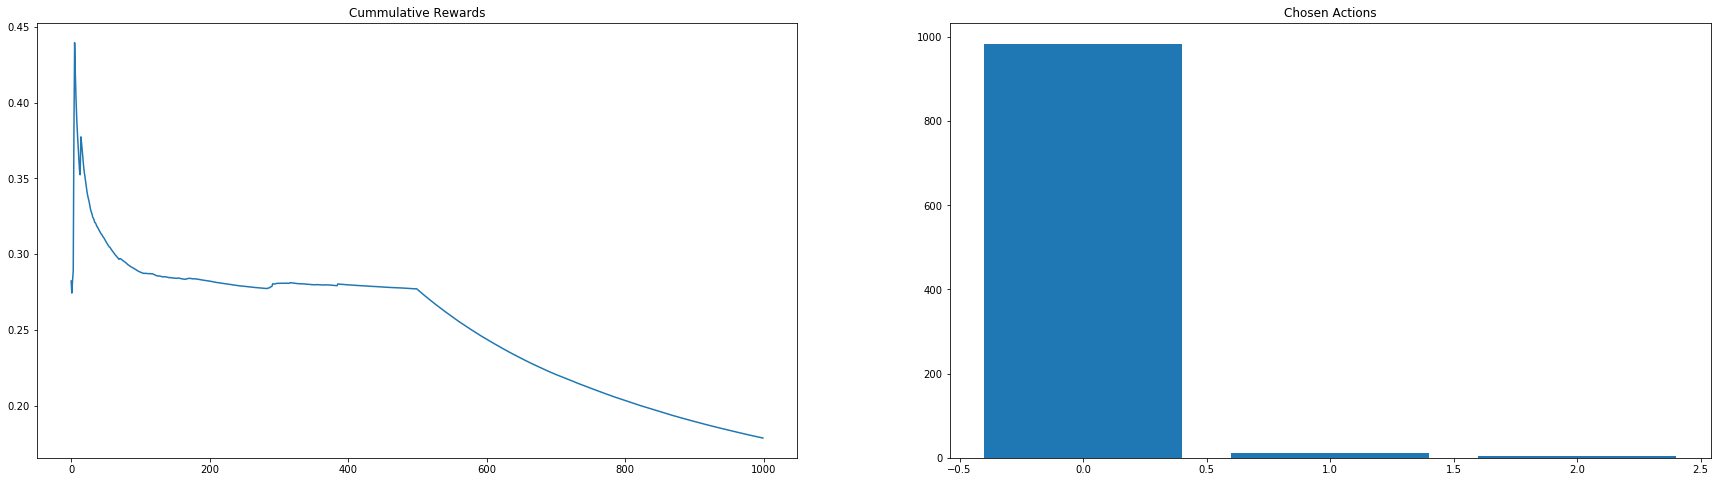

In [12]:
plot_history(rewards,cum_rewards, arm_counts)

In [88]:
# mu location
# sigma scale
# v shape df
while True:
    theta = {}
    for i in range(len(choices)):
        if sample_count[i] >= 2:
            theta[i] = t.rvs(df=sample_count[i]-1,loc=sample_mean[i],scale=(sample_var[i]/sample_count[i])**2)
            print("Theta", theta[i])

        else:
            theta[i] = np.random.uniform(float("-10000000000"),float("10000000000"))
    #print(theta[i])
    choice = np.argmax([theta[i] for i in range(len(choices))])
    print("Choice", choice)
    
    reward = np.random.uniform(0,200)
    arm_rewards[choice].append(reward)
    sample_count[choice] += 1
    sample_rewards[choice] += reward
    #sample_mean[choice]  += (1/sample_count[choice])*(reward-sample_mean[choice])
    sample_mean[choice] = sample_rewards[choice]/sample_count[choice]
    sample_var[choice] += (sample_mean[choice]-reward)**2

Choice 2
Choice 1
Choice 2
Theta -59308095.27509971
Choice 1
Theta 154829.32697293206
Theta -12367883.623101402
Choice 1
Theta 79503.98558614292
Theta -446743.98366573476
Choice 0
Theta -200152.59164556838
Theta -655254.0665628512
Choice 1
Theta -48506.20246987754
Theta -961246.0067628472
Choice 1
Theta -139973.38000985712
Theta 732546.7668063013
Choice 0
Theta -1889007.8410335921
Theta 640486.8908240906
Theta 22979085.99021723
Choice 2
Theta 3006880.703254403
Theta 361264.6862149195
Theta 801636.7140137986
Choice 0
Theta 2428839.499384263
Theta 84526.82706916629
Theta -1602853.096875594
Choice 0
Theta -2259330.97805452
Theta 585476.8403752324
Theta 62155.076388191694
Choice 1
Theta -847410.1943825778
Theta 22697.15396247478
Theta -2182991.691250286
Choice 1
Theta -227305.128767337
Theta -224929.57480150016
Theta 1416262.7756999575
Choice 2
Theta -341208.6641052216
Theta -282684.8869405803
Theta -1106912.3780309425
Choice 1
Theta -105772.96437421284
Theta -421868.6670175002
Theta -3201

Theta 9744820.153204136
Theta -4992663.088341454
Theta -13120726.725457732
Choice 0
Theta -3637804.8838913427
Theta 6069192.58770645
Theta -8374633.3098262185
Choice 1
Theta 8753831.764825346
Theta -9144922.936695974
Theta 32452275.8263151
Choice 2
Theta 7328492.126542568
Theta 345469.2120876843
Theta -14413866.486206714
Choice 0
Theta 3386741.085488248
Theta 9044197.938013729
Theta -27814775.212048244
Choice 1
Theta -1396714.227656884
Theta -17792887.42310997
Theta -1211428.2251977497
Choice 2
Theta 9332747.998344453
Theta 2334446.6641796427
Theta -3623483.7619128595
Choice 0
Theta 9375681.04281493
Theta 853346.1795454522
Theta -13152340.943940524
Choice 0
Theta -12633598.599900069
Theta -8140209.164838845
Theta 3507641.9705327717
Choice 2
Theta -2172564.804932908
Theta 2431661.8155266964
Theta 6519561.731333403
Choice 2
Theta -18319792.298377473
Theta -5339444.213048002
Theta 17312834.116659686
Choice 2
Theta 1715317.9115035967
Theta 2740536.13803306
Theta -4193835.9393670564
Choice 

Choice 2
Theta -15349010.45401638
Theta -15010806.250349507
Theta -6698694.799713094
Choice 2
Theta -2688979.015385019
Theta -12205209.263172027
Theta 9899242.197596608
Choice 2
Theta -23570609.186716378
Theta 2930881.6535033165
Theta -18247388.541282948
Choice 1
Theta -3227568.2709069066
Theta -8338153.669124642
Theta -6945832.129366407
Choice 0
Theta -28771272.906117566
Theta -995759.4328634542
Theta 12997318.301941993
Choice 2
Theta -6281597.707322703
Theta -9036542.098140048
Theta -1631603.4178149167
Choice 2
Theta -4024172.7801842364
Theta 4646233.377900226
Theta -3735568.479177823
Choice 1
Theta 16064088.76629215
Theta -20515451.028501242
Theta 22242045.48773292
Choice 2
Theta 4844723.161303794
Theta -8772244.48817133
Theta -8518207.536414811
Choice 0
Theta 9014183.432427285
Theta -2849286.7189624
Theta -20641992.695955228
Choice 0
Theta -10192611.29780922
Theta -4302481.236323565
Theta 2706431.0070924833
Choice 2
Theta -1365780.8305816299
Theta -14397284.679554753
Theta -7709997

Theta 2607589.4420814994
Choice 0
Theta -4992025.532929904
Theta 238497.5107932722
Theta 17647.52001442851
Choice 1
Theta 14094873.85433039
Theta 4615560.929434435
Theta 2122490.167144947
Choice 0
Theta -18279579.14543174
Theta -9937993.900080297
Theta 20769971.364222433
Choice 2
Theta 21928432.795822285
Theta -4334435.435591702
Theta -176050.36266512526
Choice 0
Theta 8687582.517706078
Theta -7926254.203570897
Theta 11879142.656806652
Choice 2
Theta -7628642.708028075
Theta 4537672.708454173
Theta 1154619.3710436593
Choice 1
Theta -9798027.675882211
Theta 6003348.589720845
Theta 11840263.432602305
Choice 2
Theta 3680727.796085251
Theta 7989661.821349047
Theta 20484294.679361887
Choice 2
Theta -7811334.396520128
Theta 12299780.942989493
Theta 11232601.101216666
Choice 1
Theta 24814576.036869124
Theta -11176668.269633256
Theta -3765603.5978787537
Choice 0
Theta 6911713.791791746
Theta -1356740.693600382
Theta 3545024.213027515
Choice 0
Theta 3292051.628715342
Theta 2078788.9971892603
Th

Theta 6292635.452956924
Theta -22589334.936456513
Choice 1
Theta -8697032.70126289
Theta -5971704.662909666
Theta 10009652.25608256
Choice 2
Theta -7379419.706345015
Theta 1628637.1480765948
Theta 8916260.853738425
Choice 2
Theta -7429561.784455363
Theta 12120220.357578622
Theta 8820958.21735865
Choice 1
Theta 3359380.3026966993
Theta 78401.79523949481
Theta -3482200.0519146407
Choice 0
Theta 16042759.697533345
Theta 2566855.4157968247
Theta -20142163.30818029
Choice 0
Theta 4753888.367459389
Theta -16584602.912440803
Theta 19535870.394915532
Choice 2
Theta -1088747.3160601559
Theta -2605562.6294082752
Theta -3421333.6092616622
Choice 0
Theta 3634002.8002836104
Theta -4589436.140407897
Theta -14171503.073349124
Choice 0
Theta 19158942.32896982
Theta 7641306.940096338
Theta 5647126.093303358
Choice 0
Theta -13516510.792361883
Theta -9805562.435107479
Theta -18891512.365630034
Choice 1
Theta 5349040.167290802
Theta 16752952.957123522
Theta 7273349.927923215
Choice 1
Theta -2154033.556334

Choice 1
Theta -19948687.811771426
Theta -13591143.578026136
Theta -7404678.348093785
Choice 2
Theta 17961637.062545143
Theta 20729468.065250672
Theta 24460951.328649204
Choice 2
Theta -5199785.679316789
Theta -16238759.443117457
Theta 21540470.191140946
Choice 2
Theta 7389749.016723654
Theta -9262784.897790322
Theta -14715370.93236868
Choice 0
Theta -2861908.601431602
Theta 7159515.252063445
Theta -4956068.982164799
Choice 1
Theta 840323.5049998036
Theta -29787225.608304594
Theta 14682594.590612808
Choice 2
Theta -15990225.712015621
Theta -2420012.9715856956
Theta 2052974.278547653
Choice 2
Theta -10610614.64960211
Theta 6078154.456405354
Theta 26167008.237697836
Choice 2
Theta 2730541.1321337344
Theta -9449486.3987831
Theta 795855.5762631694
Choice 0
Theta 12025913.37527512
Theta -6624845.741572265
Theta -5090248.263146718
Choice 0
Theta 22577299.12637684
Theta -12978873.289576111
Theta -8893330.875929119
Choice 0
Theta -18680725.550547898
Theta -1636545.5261327394
Theta -6994654.134

Theta -2462118.203173053
Theta -19711214.979847796
Theta 16742166.290808834
Choice 2
Theta 6813679.709355349
Theta 1831535.5798779025
Theta -2230632.7125319564
Choice 0
Theta 392235.0827676776
Theta 15195527.383850172
Theta 11935872.027964028
Choice 1
Theta 5208125.069991781
Theta 1736618.0015474844
Theta -18954549.385152157
Choice 0
Theta -1835821.4638026236
Theta 5162101.835510202
Theta -8203844.488339187
Choice 1
Theta -8771944.12339699
Theta -10139228.61224931
Theta 9628890.01027547
Choice 2
Theta 8249134.535075053
Theta -186108.32289983443
Theta -10292350.50420812
Choice 0
Theta -6804668.283585885
Theta -306986.4028283366
Theta -7324333.641631497
Choice 1
Theta -17777172.882279042
Theta -5963519.731606947
Theta 9551461.376851592
Choice 2
Theta 3436218.896562185
Theta -12101339.065406559
Theta -3866258.2730809883
Choice 0
Theta -24765964.325307325
Theta -13630447.608790556
Theta 4411193.293093118
Choice 2
Theta -833269.1278146394
Theta 9247833.04313556
Theta 9938586.035757678
Choic

Theta -7803952.954787464
Theta 9191843.80863667
Theta 9724712.71998035
Choice 2
Theta 5182963.611262048
Theta 18431672.385020856
Theta -288931.742433089
Choice 1
Theta -2914764.981233046
Theta 5845072.131341695
Theta 1878925.1847454933
Choice 1
Theta 22986988.6204444
Theta 3488615.280552781
Theta -9575160.414227568
Choice 0
Theta -4316065.118611846
Theta 7026331.765739521
Theta -11967367.699514609
Choice 1
Theta -13842049.654666945
Theta 5352089.826722202
Theta 1358656.067744386
Choice 1
Theta 5987866.864123373
Theta -1101865.2487315077
Theta 4838323.253797617
Choice 0
Theta 12070816.750767585
Theta -3879112.8613694306
Theta 13872783.180522611
Choice 2
Theta 10161699.216907639
Theta 12489581.766555771
Theta -11009489.951432645
Choice 1
Theta -2423367.0572942533
Theta -4632787.058058984
Theta 5647836.279477018
Choice 2
Theta 7828240.717823183
Theta 5628200.755267282
Theta -18675301.387725264
Choice 0
Theta 30980662.43423821
Theta 20906623.29975505
Theta 11144921.572978305
Choice 0
Theta

Choice 0
Theta -10518504.174974391
Theta 13624137.033291146
Theta 7730197.266855677
Choice 1
Theta -8897277.984228313
Theta 31310182.615740888
Theta -923333.1035981087
Choice 1
Theta 5583087.166569505
Theta -4775882.615445856
Theta -4999245.031735755
Choice 0
Theta 12967305.723518992
Theta 18645883.074682936
Theta 2603292.106351539
Choice 1
Theta -9021982.65413413
Theta 10046768.6595248
Theta 7586407.864957679
Choice 1
Theta 10546079.409951467
Theta -4373246.846311448
Theta -1867020.5811430076
Choice 0
Theta 11902766.391439112
Theta -8480984.964465402
Theta -9400881.280759545
Choice 0
Theta -8924002.789980251
Theta 6409645.139102575
Theta 19039212.146358456
Choice 2
Theta 2740309.177675852
Theta -12498109.500227105
Theta 760260.6687227619
Choice 0
Theta 2622535.469993226
Theta 7407862.963646655
Theta -9455667.08725928
Choice 1
Theta -8077395.18559842
Theta -7189917.266364513
Theta 5942350.492616923
Choice 2
Theta -1493667.608432832
Theta 8910998.646685839
Theta -3674279.111906103
Choic

Choice 0
Theta 18189474.936402533
Theta -5917953.024533492
Theta -2526127.9218404037
Choice 0
Theta 7972602.105975589
Theta -12167768.801767606
Theta -18662447.58530552
Choice 0
Theta 13067020.608580692
Theta 12140288.041348428
Theta -13887452.982453762
Choice 0
Theta 13845671.614941347
Theta -1577340.460610913
Theta -11911183.640132004
Choice 0
Theta -14155162.39563315
Theta -4781281.061909679
Theta -6483033.728427464
Choice 1
Theta 15280206.418834224
Theta -2972437.8489835556
Theta -5754763.830471818
Choice 0
Theta 8290699.79759366
Theta -3153132.348718102
Theta -4017223.8216908765
Choice 0
Theta 22162980.70456846
Theta -774040.6135953182
Theta -6907401.413480689
Choice 0
Theta 5559216.883699275
Theta -13268892.56086903
Theta -370749.9171257062
Choice 0
Theta -9433632.010387676
Theta -11024983.72777558
Theta 4615233.865548907
Choice 2
Theta 8708462.186143972
Theta -15090889.020006062
Theta -7267716.5753178885
Choice 0
Theta 7984218.93797318
Theta -8318734.083186604
Theta 19258592.267

Choice 1
Theta 11126399.009591607
Theta -2489111.570052102
Theta -9761078.29401841
Choice 0
Theta -11664424.13992599
Theta -3210898.932438035
Theta 1328040.7312091638
Choice 2
Theta 12439035.133774474
Theta -4079372.793800228
Theta -5104913.495376112
Choice 0
Theta 7561581.736637686
Theta 9590573.309670892
Theta 1430405.6414959065
Choice 1
Theta 23557017.0979544
Theta -901347.3993026215
Theta 3104906.761638456
Choice 0
Theta -7069280.744227986
Theta 1720892.9731117391
Theta -1142823.4260225014
Choice 1
Theta 1032494.4375594287
Theta 18205810.99871973
Theta -18575414.727432266
Choice 1
Theta -8778846.176573262
Theta 694003.2433692525
Theta 10220893.648315527
Choice 2
Theta 5074238.91915013
Theta -10650153.876391187
Theta -11524514.650381476
Choice 0
Theta -3153826.045217352
Theta 899422.8833908549
Theta -9668860.896024646
Choice 1
Theta 1952978.1966188932
Theta 6763256.065893161
Theta 3173513.576357336
Choice 1
Theta 7714325.630135843
Theta -10866591.04119425
Theta 17529744.281017136
Ch

Theta -1603905.55515727
Theta 13585787.073479155
Choice 2
Theta 3835281.977271513
Theta 1497659.0596976606
Theta 16073023.021239975
Choice 2
Theta 10071965.058723086
Theta -16149532.93981013
Theta 1065042.5965378121
Choice 0
Theta 12822781.690610442
Theta 9356289.21391812
Theta -6444472.58736765
Choice 0
Theta 600929.0422211702
Theta 3173987.855241991
Theta 13693462.291051561
Choice 2
Theta 11993121.362517059
Theta -1185940.596651631
Theta 18635259.270116407
Choice 2
Theta -843844.567426177
Theta -11494625.861133823
Theta 8968530.567906579
Choice 2
Theta -4186189.5078077684
Theta -16674679.366299158
Theta -1002155.8830425679
Choice 2
Theta -716902.9627155164
Theta 7652831.078361434
Theta 3548702.267923195
Choice 1
Theta 16430899.512405997
Theta 1595993.2933575572
Theta -316167.7594304958
Choice 0
Theta 17505347.380718525
Theta 834725.6249060757
Theta 1641376.4172254626
Choice 0
Theta 19568985.706997603
Theta -8228935.230079284
Theta 19826453.01271416
Choice 2
Theta -5814266.473740597
T

Choice 1
Theta -11077095.015803918
Theta -1417371.2638632425
Theta 6156006.01278859
Choice 2
Theta -14413291.278195953
Theta -6669023.702357783
Theta 11166624.050557997
Choice 2
Theta 2720049.9255533237
Theta 3025005.7559052086
Theta -7045624.40363911
Choice 1
Theta 16109861.274108402
Theta 9666703.190836769
Theta -479367.81411755877
Choice 0
Theta 7764430.689219048
Theta 429333.4220217895
Theta 8099619.409650574
Choice 2
Theta -13302743.220950944
Theta 3208297.736303462
Theta -19397598.501828056
Choice 1
Theta -3208187.0544596133
Theta -13754769.778972965
Theta 14638601.55649987
Choice 2
Theta 9723766.456148028
Theta -14550000.875383403
Theta 10965038.281702707
Choice 2
Theta 2308586.2741465974
Theta -11146276.520026267
Theta 6762669.611370157
Choice 2
Theta 23114255.693929743
Theta -4644189.257376016
Theta -2502166.772500939
Choice 0
Theta -23704076.421374157
Theta -9225131.773337351
Theta 24677032.025839157
Choice 2
Theta -6425450.0993012665
Theta 4784912.7212289395
Theta 4312428.97

Theta -2986829.6235069525
Theta -5496995.253614025
Theta -4604368.011149484
Choice 0
Theta -10488299.262307543
Theta 5608143.5070631225
Theta 18723957.52722383
Choice 2
Theta 6545746.0092019355
Theta -2810042.002668237
Theta 25339197.113359526
Choice 2
Theta -15726406.028703704
Theta 5899130.170394954
Theta 2022846.0194607184
Choice 1
Theta 7766681.192197027
Theta 687219.201570466
Theta -3339269.430984459
Choice 0
Theta -2869819.846026506
Theta -8674913.366414519
Theta -7329151.564471186
Choice 0
Theta -11313881.139010383
Theta 2697988.5599688734
Theta -12289641.653404519
Choice 1
Theta -3110043.053975243
Theta -16685506.857876455
Theta -11990565.657296995
Choice 0
Theta 19218731.071437776
Theta -11686452.07022828
Theta 1701218.3132349155
Choice 0
Theta 9093199.249438012
Theta 1799691.372652874
Theta 4357874.571521392
Choice 0
Theta 5099166.76908182
Theta -4610391.764980523
Theta -13792866.791424638
Choice 0
Theta -3340687.821728024
Theta 3745398.6076195887
Theta 11305885.692782717
Cho

Theta -4776678.613403002
Choice 1
Theta -15668461.619584851
Theta 18643559.140714537
Theta -14264655.279240295
Choice 1
Theta -9541403.339608353
Theta -7678058.8271241505
Theta -5542941.889543544
Choice 2
Theta 4910722.438339374
Theta 9531347.437102405
Theta -2403351.4781573527
Choice 1
Theta 1270751.4426090836
Theta 18291807.73922221
Theta 3478557.0029756925
Choice 1
Theta 3447985.8212979436
Theta 6546634.954302418
Theta 12072413.746059343
Choice 2
Theta 187560.39814212595
Theta 6548682.070648529
Theta -331556.9350401941
Choice 1
Theta -3021052.947761823
Theta 6823003.968094824
Theta -1892663.615467055
Choice 1
Theta 3259508.126707071
Theta -6720108.270587917
Theta 486584.76318620454
Choice 0
Theta -575745.1457528549
Theta 7636755.674756766
Theta -23875289.092914935
Choice 1
Theta 8595889.850662204
Theta -987994.5436310256
Theta -14528992.57871268
Choice 0
Theta -696802.663372138
Theta 898438.1646404555
Theta -10061478.86323944
Choice 1
Theta -3559800.881029067
Theta 8373540.673599508

Theta 13450550.81565266
Choice 2
Theta -13564211.293548705
Theta -2414107.052382916
Theta 5810664.320142729
Choice 2
Theta -4659123.9777633445
Theta -13954156.282770425
Theta -2301226.484246038
Choice 2
Theta -567300.677659137
Theta -1062007.6643153462
Theta 11863028.061158873
Choice 2
Theta 24473717.425727814
Theta 10206992.930113474
Theta 2355897.698908128
Choice 0
Theta 18394534.24351608
Theta 911706.3685977922
Theta 6771638.637463467
Choice 0
Theta -4190916.4438463133
Theta 11617648.064820193
Theta 6764595.1796367485
Choice 1
Theta -13098218.297139509
Theta 7218647.173210435
Theta 3884185.6907113423
Choice 1
Theta -13359955.164745675
Theta -5396156.473303817
Theta -1591185.4350437233
Choice 2
Theta 14231643.069647094
Theta 19766158.416647963
Theta 3117935.528778836
Choice 1
Theta -9278521.81145323
Theta 10469851.856591376
Theta 8789423.787621196
Choice 1
Theta 22292388.772267517
Theta 18724823.442939166
Theta -2825524.4271597974
Choice 0
Theta 6012298.061213878
Theta -10253248.4467

Choice 1
Theta -12782357.014106035
Theta 11349828.649628587
Theta -1574428.5214171596
Choice 1
Theta -968092.1248520594
Theta 28469013.427001957
Theta -20538882.830288485
Choice 1
Theta -2162175.8942389046
Theta 1807823.516151177
Theta -19424697.05838893
Choice 1
Theta -1621681.8739113098
Theta 7606799.739601256
Theta -15100269.41030043
Choice 1
Theta 3335246.8527048244
Theta -3415585.084776869
Theta -24180350.51110074
Choice 0
Theta -8605819.792997759
Theta -5913289.215825125
Theta -10887366.23329453
Choice 1
Theta 10065799.606200308
Theta 21227563.29323923
Theta -2608340.3954578415
Choice 1
Theta -8493621.613365488
Theta -4339792.743615138
Theta -19441456.40405327
Choice 1
Theta -3216368.2602282106
Theta -16089249.746013852
Theta 586371.9843369494
Choice 2
Theta 12888919.918457823
Theta -11313330.323285928
Theta -7832625.500487131
Choice 0
Theta 13556544.489604251
Theta 7967222.610064908
Theta -1951309.0274427738
Choice 0
Theta 2854818.10532276
Theta 2149832.7140944684
Theta -1414442

Theta -15386580.62575742
Theta -1855997.3078951992
Theta 1088903.0965333646
Choice 2
Theta 11014460.804415207
Theta 10045464.767652793
Theta 5857939.260060761
Choice 0
Theta -4064431.255050619
Theta 6115215.851098682
Theta -2541739.3753101067
Choice 1
Theta -3455084.2484340067
Theta 10369632.861537155
Theta -17878116.453478303
Choice 1
Theta -6907811.5963606015
Theta 1700895.598597513
Theta -7309883.83586115
Choice 1
Theta 7147155.045114266
Theta -8223906.914746593
Theta -1242984.001328985
Choice 0
Theta 10429546.36251528
Theta 10433251.498811053
Theta -2860409.7286648806
Choice 1
Theta -10353103.623448782
Theta -12516973.16508777
Theta 5475773.245052884
Choice 2
Theta -30109709.196282938
Theta 4627615.196893632
Theta -13910115.512219386
Choice 1
Theta -9001533.521963827
Theta -4712286.469595051
Theta 18332034.07609381
Choice 2
Theta -5458630.882570566
Theta -18431974.909007553
Theta -16599308.231388329
Choice 0
Theta 11042467.236100871
Theta -7903067.586209928
Theta -13844487.12840282

Theta -4753233.870500445
Choice 1
Theta -9297681.415409042
Theta -4985891.703758787
Theta -4639552.574964157
Choice 2
Theta 1090652.0402181884
Theta 10576732.289181596
Theta 17469919.014479924
Choice 2
Theta 3613000.861301233
Theta -5698661.824944521
Theta -4090900.473577656
Choice 0
Theta 4160534.5856522126
Theta -15183946.838599965
Theta -7846017.40895908
Choice 0
Theta 12308391.824194962
Theta 494564.3546822813
Theta 20048752.448951013
Choice 2
Theta -6262695.997353827
Theta -14520805.764079165
Theta -4598565.237031047
Choice 2
Theta 8239549.998236599
Theta 11799500.011812575
Theta -23083.59511960095
Choice 1
Theta -7832790.964167787
Theta -9250130.93608745
Theta 11737527.283019908
Choice 2
Theta -12692315.92431151
Theta 19785107.06462528
Theta 10267493.807096733
Choice 1
Theta 24596374.792706635
Theta -1678270.9117868724
Theta 6193111.262187918
Choice 0
Theta 255265.36406976165
Theta 15531789.396710493
Theta -4492466.782167945
Choice 1
Theta -966549.7347776564
Theta -435798.2737854

Choice 2
Theta 6587631.91168554
Theta -6743136.155419655
Theta 16971395.660083227
Choice 2
Theta -10718439.270417769
Theta -267822.1862815577
Theta -10038472.313590026
Choice 1
Theta -9745940.55219223
Theta -13503271.615684448
Theta -355486.9446049205
Choice 2
Theta 1746307.3966563847
Theta 5021627.789624003
Theta 3856498.0780329905
Choice 1
Theta 936674.2407893912
Theta 1100134.4620117762
Theta -1711203.6331447912
Choice 1
Theta 14354921.542863384
Theta -3557669.8416685816
Theta 14519143.324959999
Choice 2
Theta 2923251.3181555592
Theta 1567279.376550484
Theta 9733090.019425051
Choice 2
Theta -2780551.2126522767
Theta 9343996.479539292
Theta 24854670.581375044
Choice 2
Theta 3029958.0667136163
Theta -7771145.44356453
Theta -10951433.025829047
Choice 0
Theta -2154662.766037865
Theta 3530281.1117530884
Theta 1362663.9254627842
Choice 1
Theta 15578765.653933417
Theta -11257098.31611063
Theta -26278371.058401432
Choice 0
Theta -3362441.354661404
Theta 9489527.15440928
Theta -16738109.6330

Theta -1084822.0797539651
Theta 3053920.274305379
Choice 2
Theta 4130605.8386057476
Theta 7511028.958712847
Theta -763599.0991538145
Choice 1
Theta -10955560.537814
Theta -14522514.63489511
Theta 638465.0742494949
Choice 2
Theta 16649571.039279113
Theta -1791204.109439294
Theta 11036903.095666643
Choice 0
Theta -4758869.991719767
Theta 14451483.858615462
Theta -16129289.220029945
Choice 1
Theta 1530477.9803422464
Theta -5173038.6501496
Theta -10401454.059287952
Choice 0
Theta -12166919.753025588
Theta -17425443.251294184
Theta -16469649.876160452
Choice 0
Theta 4791476.416313674
Theta 12730187.556374589
Theta 14643393.537181636
Choice 2
Theta 17833569.949686725
Theta -7265025.760084331
Theta -1413079.3238954959
Choice 0
Theta 23049374.687129736
Theta -15553871.23432682
Theta 1751500.626289219
Choice 0
Theta -249275.18183652428
Theta 9522591.924914885
Theta 2431090.4878009316
Choice 1
Theta -9635178.972600598
Theta 10358624.983579438
Theta 9726457.067622365
Choice 1
Theta -10509621.4291

Theta -7810529.173346258
Theta -3253037.613154004
Theta -6997233.575503778
Choice 1
Theta -17922807.850605097
Theta 4434762.870003978
Theta 9610181.849309495
Choice 2
Theta -3418617.86643341
Theta -4791830.929167624
Theta -2199574.355532939
Choice 2
Theta 2618648.961457285
Theta -12593333.88614242
Theta -8017210.586221122
Choice 0
Theta 12935481.706151694
Theta -4204220.004684187
Theta -3781624.608272528
Choice 0
Theta 12963336.375903124
Theta 5299853.694073771
Theta -5545470.609788961
Choice 0
Theta 8732521.030500863
Theta 6771362.354330348
Theta 7975342.032887106
Choice 0
Theta 5503333.40310118
Theta 8520824.032273298
Theta -2149842.79361289
Choice 1
Theta 9812124.892028885
Theta 13183058.78345304
Theta 13693184.441562787
Choice 2
Theta -1188390.4344002132
Theta -16620926.957075492
Theta -2245751.7811655854
Choice 0
Theta -9780723.807702761
Theta 2234466.535177357
Theta -6426513.974116926
Choice 1
Theta 11874558.473955851
Theta 10152706.504826842
Theta -5709325.972457665
Choice 0
The

Theta 2968580.7499968284
Choice 1
Theta 645896.1391013344
Theta 12056827.390669102
Theta 3101871.1342002014
Choice 1
Theta 12304034.99944839
Theta 6350609.1896005515
Theta 12825911.53738347
Choice 2
Theta -1161389.2972561738
Theta -14783732.58450184
Theta 1872400.4448153907
Choice 2
Theta -19760482.45977312
Theta -5311832.08386807
Theta -15007791.438122751
Choice 1
Theta 23526042.412282173
Theta -4298132.670196593
Theta 4338596.371610336
Choice 0
Theta -15403566.205504429
Theta 6212143.417389383
Theta 17282737.28892073
Choice 2
Theta -2376661.7148315506
Theta -4582464.522899388
Theta 7341364.684319739
Choice 2
Theta -14746847.383471306
Theta 15088249.126687312
Theta 6136693.896953617
Choice 1
Theta -15917640.582507618
Theta 6085996.421607337
Theta 171207.12460549647
Choice 1
Theta 23604188.001966685
Theta 3536520.2382984194
Theta 3293824.910111702
Choice 0
Theta -8307040.240977713
Theta -17225272.193917353
Theta 14857019.687427852
Choice 2
Theta -8054383.187331645
Theta -8233418.654590

Choice 1
Theta 11126416.965757262
Theta 2161393.2875755657
Theta -22865672.35656418
Choice 0
Theta -17612612.219392687
Theta 14318141.501936883
Theta 2299795.4848214365
Choice 1
Theta -28130486.77568582
Theta 13607000.455010008
Theta -5583336.988908761
Choice 1
Theta -2253526.845365527
Theta -1448658.4915136152
Theta -4686020.988745685
Choice 1
Theta 9613909.961544894
Theta -2808022.5705148117
Theta -16748909.084850766
Choice 0
Theta -3613987.4190091696
Theta -6369913.602757298
Theta -512543.2728427849
Choice 2
Theta 9521303.662818737
Theta 4888307.915919141
Theta 7909204.029562069
Choice 0
Theta 1924387.7456884042
Theta 13103271.20913505
Theta -12579748.472187847
Choice 1
Theta -951274.7382586636
Theta 4402066.604949472
Theta -3184840.245187128
Choice 1
Theta 5445177.034094018
Theta 2750808.389614063
Theta 4543432.592765581
Choice 0
Theta 5138083.999304797
Theta 3200132.5767908874
Theta -19274586.431266215
Choice 0
Theta 16494908.264496494
Theta 6523655.746499501
Theta 6500991.2872235

Choice 0
Theta -12910392.591543661
Theta 22569944.226521835
Theta -18212014.81650991
Choice 1
Theta -4425626.575516779
Theta -2597364.493117144
Theta 9578407.870422844
Choice 2
Theta 59855.90138673698
Theta 15523099.520718534
Theta -9954026.723143892
Choice 1
Theta -467373.70725657366
Theta -1703771.928229172
Theta 5805455.913168855
Choice 2
Theta -6966256.172844807
Theta -1354527.6613731352
Theta 2274910.7335110675
Choice 2
Theta -2677005.9067725735
Theta 14259923.114662303
Theta -11277808.664614432
Choice 1
Theta 16130092.13586563
Theta -19199529.86263292
Theta 7605787.581522062
Choice 0
Theta 2257609.8516482813
Theta 7941598.204301528
Theta -3986533.564629082
Choice 1
Theta 5432484.297988953
Theta 4635357.639017878
Theta -18669866.024096657
Choice 0
Theta 2454426.1236357302
Theta 6509066.56742095
Theta 5106706.152079405
Choice 1
Theta 16350706.742261795
Theta -5966550.351247162
Theta -8559746.109617619
Choice 0
Theta 6734400.858019132
Theta 7403417.13981921
Theta -17129625.600068297

Choice 0
Theta 1762048.4118082675
Theta -1267803.0536196926
Theta 4436357.243416293
Choice 2
Theta -15735254.848182285
Theta 11204335.262400197
Theta 765493.379456026
Choice 1
Theta 13808487.055140529
Theta 14449592.01719347
Theta 600072.880765339
Choice 1
Theta -16305589.177373312
Theta -582155.387518438
Theta -3440826.7476989785
Choice 1
Theta -624686.4827604991
Theta -6215675.712282245
Theta 17791602.56479838
Choice 2
Theta 1323814.7101445796
Theta -7543995.061722938
Theta -191587.8752880158
Choice 0
Theta 10024063.850726077
Theta -6055148.030131545
Theta 3734074.526273458
Choice 0
Theta 15219848.058966642
Theta 700410.1391347682
Theta 2962479.9268315956
Choice 0
Theta -10131844.507392153
Theta 1657611.765150902
Theta -15164693.581297515
Choice 1
Theta -13987132.64941848
Theta -11903311.453428729
Theta -10532340.69617867
Choice 2
Theta 2945236.5918851257
Theta -6637142.892693861
Theta 12823770.514024192
Choice 2
Theta -11597463.36518495
Theta 9492657.384713612
Theta -15846768.596038

Choice 2
Theta -4677958.753659507
Theta -17175463.358567253
Theta -8706083.199746432
Choice 0
Theta -5938175.4554316625
Theta 12998523.556962876
Theta -4878397.42609523
Choice 1
Theta 1569173.424361223
Theta -4435848.626786112
Theta 7199095.332396546
Choice 2
Theta 5935726.105671283
Theta -2079542.7431126412
Theta -14233307.911079627
Choice 0
Theta 15813539.017152516
Theta -9035252.440180259
Theta 3801872.16534028
Choice 0
Theta -13154244.014028424
Theta -3982357.420647632
Theta -15555779.49320517
Choice 1
Theta -11153669.087745445
Theta -3327248.9756269143
Theta 26177914.57574217
Choice 2
Theta -16676561.605509067
Theta -5732083.1946780505
Theta 3280325.8112641037
Choice 2
Theta 1998133.1449595466
Theta 2255621.8022962227
Theta 9760648.544273555
Choice 2
Theta -5971438.236578614
Theta 755864.31278946
Theta -7270790.954961562
Choice 1
Theta -15567996.228901073
Theta -3613877.6176566295
Theta -13743341.518476808
Choice 1
Theta -8370746.340819494
Theta -6263555.922440715
Theta -2961375.9

Theta 7153693.2166002
Theta 4247119.491878562
Choice 1
Theta -13168457.526508266
Theta 8383730.973025316
Theta -18037972.555944767
Choice 1
Theta -13397210.344963431
Theta 1944470.6281608322
Theta 588328.282548979
Choice 1
Theta -1841536.795026812
Theta 8979483.398151228
Theta 1738289.5749543095
Choice 1
Theta 1602096.2348588393
Theta -3805531.9274866953
Theta -1218456.8196328278
Choice 0
Theta -6641955.684870925
Theta -11840404.51207452
Theta -18300539.47016473
Choice 0
Theta -18585567.322880916
Theta -4879624.496153733
Theta 19682202.133530002
Choice 2
Theta 6315405.954533584
Theta -1923408.0397563623
Theta -3544284.9782743417
Choice 0
Theta 4435994.6495503355
Theta -7268617.7690983815
Theta 219531.21604682785
Choice 0
Theta -18344403.299643908
Theta 672484.9968935889
Theta 13185264.12840953
Choice 2
Theta -22227596.273939017
Theta 2693744.3662838275
Theta -5501845.858786843
Choice 1
Theta -1252208.760065015
Theta -2462719.4709062115
Theta -6658789.416989578
Choice 0
Theta 32154698.8

Theta 13682390.530029027
Theta 697790.8275328552
Choice 1
Theta -19939562.75859282
Theta 2180864.795040019
Theta -14676364.333747515
Choice 1
Theta -12480272.953079868
Theta -14417760.047830706
Theta -5074702.180139616
Choice 2
Theta 12037849.61827181
Theta 2967191.2426120075
Theta 3431362.4614411616
Choice 0
Theta -10683119.552860748
Theta 6509967.371161309
Theta -21407967.77986017
Choice 1
Theta -29758.430165108668
Theta 4444222.9992052475
Theta 9604313.715289578
Choice 2
Theta 6893482.53208221
Theta -2192583.7794816024
Theta 7212235.266335542
Choice 2
Theta 5714774.670581778
Theta 13857679.52820222
Theta 13609063.06328695
Choice 1
Theta 3283166.8132010237
Theta 7140344.476891435
Theta 5172926.094561455
Choice 1
Theta -2802418.1894661025
Theta -9809087.545984102
Theta -7481247.153112226
Choice 0
Theta -4690558.674550914
Theta 4679611.294734641
Theta 15542008.163260756
Choice 2
Theta -13177352.674122041
Theta 3813563.726001783
Theta -14835403.383411506
Choice 1
Theta 3955255.231924363

Choice 0
Theta -1000966.4422296942
Theta 716840.2479515717
Theta -176843.20041331937
Choice 1
Theta -6784741.055828765
Theta 1697666.3408398633
Theta -33212709.337366134
Choice 1
Theta -15939090.383866439
Theta -1708425.6163708232
Theta 1558889.99421452
Choice 2
Theta -6812435.794231753
Theta 9636547.072749443
Theta -3309489.588901636
Choice 1
Theta 18767119.080327824
Theta 2161320.6995308963
Theta 5174726.057484201
Choice 0
Theta 2968819.0772675737
Theta 14833631.932399657
Theta -1290418.4106372034
Choice 1
Theta 8812228.469625937
Theta -17269115.8276752
Theta -4735313.816709592
Choice 0
Theta -24321574.55628152
Theta -823138.1413698582
Theta 21523184.741293803
Choice 2
Theta -6685597.946601645
Theta 1511695.0787175104
Theta -9633899.422887007
Choice 1
Theta -14770603.889482813
Theta -16763995.277913501
Theta -7569734.809387531
Choice 2
Theta 2308731.690675572
Theta 895776.7749705046
Theta 1783347.2130719586
Choice 0
Theta -18351487.16132575
Theta -9005043.921655945
Theta 7855495.1349

Choice 2
Theta -5013033.325876393
Theta -1389200.748982333
Theta -6467079.813226191
Choice 1
Theta 219460.05751295667
Theta 5613906.620203403
Theta 10931349.982586823
Choice 2
Theta 14407069.140979515
Theta -7122622.242756637
Theta 5821635.784134236
Choice 0
Theta -4621207.855288088
Theta 6989233.61342335
Theta 20686030.758920923
Choice 2
Theta 10724019.369625548
Theta 16518811.599601919
Theta 8524926.790393665
Choice 1
Theta 1227392.787335425
Theta 10000372.453710448
Theta 13948750.615521373
Choice 2
Theta 1505920.9337139223
Theta -2606178.1018247204
Theta 12947122.023410749
Choice 2
Theta -1701553.2886979296
Theta -991569.2353416358
Theta -1698049.2483260739
Choice 1
Theta 3173308.877385847
Theta -6274081.578678094
Theta -16333801.0793951
Choice 0
Theta -6902241.146613978
Theta 5079231.383568073
Theta -11499715.993606348
Choice 1
Theta 20309530.25119746
Theta -13945780.569961408
Theta -636327.7314539037
Choice 0
Theta -6906147.509878284
Theta 2752185.0027495874
Theta -4063157.1997867

Theta -172097.2474387128
Choice 2
Theta 3451335.712701168
Theta 12514727.517445385
Theta -4700338.447269678
Choice 1
Theta -3361315.1491953866
Theta 10505127.69131255
Theta -13207593.38656052
Choice 1
Theta 2138699.7684380515
Theta -5359314.619597535
Theta 16550441.446373392
Choice 2
Theta 4990900.399234599
Theta -12397308.606722306
Theta -2511993.585856986
Choice 0
Theta -3385582.1709300396
Theta -6316041.0828415
Theta -2125656.6181022893
Choice 2
Theta 486961.0494213167
Theta -3922166.5947709936
Theta 17498898.296398144
Choice 2
Theta 17506740.102417096
Theta -11478922.924641116
Theta 16694943.036839278
Choice 0
Theta -16346271.814833783
Theta -13037497.953000924
Theta -8994226.560647152
Choice 2
Theta 14040027.586495394
Theta -4471458.999045166
Theta 522429.75995198986
Choice 0
Theta 4793719.539926645
Theta 2050139.9173301684
Theta -5922663.214910258
Choice 0
Theta -10784245.436442371
Theta 10151212.167523801
Theta -813965.4888170774
Choice 1
Theta -20121518.83710468
Theta -8521854.

Choice 1
Theta 516652.6712518411
Theta 7514510.298662843
Theta 21290940.07971289
Choice 2
Theta 2617816.4745771075
Theta 6148677.46810717
Theta 4833808.3176127225
Choice 1
Theta -3900523.797429586
Theta 719581.6311354262
Theta 7816845.487398883
Choice 2
Theta 17370041.71301008
Theta 9370356.916299554
Theta 919047.6002192036
Choice 0
Theta -2336118.7456521923
Theta 288305.4874808798
Theta -3741639.6740292376
Choice 1
Theta 16048168.610402852
Theta -14362476.514404396
Theta -14333410.973723544
Choice 0
Theta 9124153.86300183
Theta -1765396.67240332
Theta -9935207.798082516
Choice 0
Theta 13556112.503706396
Theta 9525690.834070815
Theta -6402546.305630316
Choice 0
Theta 14654653.695204627
Theta -8738509.862107107
Theta 6276789.121994849
Choice 0
Theta 2568623.495734413
Theta 5296920.085234111
Theta 5668571.3403049605
Choice 2
Theta 7233979.805247725
Theta -12039989.656280726
Theta 5156128.9661457995
Choice 0
Theta -16065709.659553569
Theta -7794300.622792387
Theta 15597147.59460136
Choice

Choice 1
Theta -8408981.44913716
Theta -9053425.634042405
Theta -4146830.655497881
Choice 2
Theta -8540024.948556412
Theta 6524820.411471534
Theta -4031533.391268093
Choice 1
Theta 12724456.18895207
Theta 6074586.093188802
Theta 15084959.415843735
Choice 2
Theta -16603860.939640028
Theta -2774193.3498816146
Theta 9785089.489660028
Choice 2
Theta -13721269.82230737
Theta -5042266.40838019
Theta 17254038.863293752
Choice 2
Theta 12168869.00378887
Theta -4415521.437662958
Theta -13150966.769688746
Choice 0
Theta -20874791.30211388
Theta 6141475.530590341
Theta 10063669.728520392
Choice 2
Theta -647453.3213109772
Theta 1172428.2161350818
Theta 8625936.025434112
Choice 2
Theta -5172521.403679218
Theta 2735011.340750938
Theta 8053044.350338369
Choice 2
Theta 9047835.759176064
Theta 2531721.703094514
Theta -25443780.544187345
Choice 0
Theta -10382073.301541777
Theta 4519265.920530577
Theta 5969678.776312613
Choice 2
Theta -5825415.402056113
Theta 5970286.375350951
Theta 16140454.026934825
Cho

Choice 2
Theta -6977200.125906982
Theta 3952886.714111215
Theta -2230239.086883795
Choice 1
Theta -11030840.80279623
Theta 8281924.620827578
Theta 507574.9300535859
Choice 1
Theta -4310709.4871663945
Theta -10866.694335719467
Theta 2568823.6982218144
Choice 2
Theta -162214.30253953338
Theta -11368871.954613812
Theta -13822260.18865147
Choice 0
Theta -12243593.762339491
Theta 1136695.2449255376
Theta -1590169.9529109315
Choice 1
Theta 3258419.402538138
Theta -5012937.671576696
Theta 8367531.370075269
Choice 2
Theta 2009385.050355082
Theta -6298254.333266985
Theta -13249761.2063852
Choice 0
Theta -19746315.087003496
Theta -7724467.101503134
Theta -15743949.752326779
Choice 1
Theta -10034268.693426454
Theta -4164714.4747345257
Theta -13637874.476907559
Choice 1
Theta -10546280.9996263
Theta -30647857.90118084
Theta -7025849.008754078
Choice 2
Theta 13244470.225954868
Theta 14286610.825463096
Theta -1157952.5536768364
Choice 1
Theta 10633454.021315262
Theta 20756857.155665208
Theta -704750

Theta 12433416.262694767
Theta -5673652.398817054
Choice 1
Theta -10253877.156848889
Theta 7837110.256295075
Theta -10636790.034128431
Choice 1
Theta -1546369.649773264
Theta -11535262.055195384
Theta 18678983.854593895
Choice 2
Theta 11567945.049044428
Theta -16912907.289934646
Theta 15970260.998618765
Choice 2
Theta -5700607.380641322
Theta -3779903.374109318
Theta 13745139.663244255
Choice 2
Theta -11031546.995567895
Theta -13831601.753649024
Theta -2302940.6286971043
Choice 2
Theta -5712426.484276327
Theta 8577302.20489449
Theta -1511353.2269886727
Choice 1
Theta 11684756.577835828
Theta 126968.07657804554
Theta 7146056.489846726
Choice 0
Theta 11053700.60142948
Theta -4357709.194779209
Theta -9641285.590281453
Choice 0
Theta -3307907.667155112
Theta -5408050.225204674
Theta 6411396.232553211
Choice 2
Theta -3752953.0669533913
Theta -29374602.09544274
Theta -10390371.562507784
Choice 0
Theta -24444500.926432777
Theta -4459449.563672767
Theta -4823797.90174767
Choice 1
Theta 8820843

Theta -8776416.737528047
Theta -1793883.8639962056
Choice 2
Theta 5241986.009960754
Theta 1002034.6464799907
Theta -14029173.074625
Choice 0
Theta -9005196.147307346
Theta -13506930.344671508
Theta 5114574.901092303
Choice 2
Theta 14934878.993920082
Theta -5100880.790154203
Theta 753768.4465764232
Choice 0
Theta 10418562.793723369
Theta 1392238.9397729132
Theta -10212897.265832178
Choice 0
Theta 1012353.4471178517
Theta 14828587.868189648
Theta 7165426.171994441
Choice 1
Theta -13269647.106322937
Theta 4186942.2342958916
Theta -3465989.497149788
Choice 1
Theta -16752783.58480034
Theta 12390713.761652146
Theta 7452864.53141144
Choice 1
Theta -3040736.4286781778
Theta 17184805.5475945
Theta -2977394.67118007
Choice 1
Theta -13372355.472474745
Theta 6133232.112780613
Theta -9342466.734625401
Choice 1
Theta 14751559.849775298
Theta 238278.66966962654
Theta -318151.4990031258
Choice 0
Theta 3604474.411758987
Theta -17256796.67746861
Theta -16462650.186914088
Choice 0
Theta 24229629.70049891

Theta 11009273.895645153
Theta 3746420.4996228153
Theta -4844778.616459019
Choice 0
Theta -5123233.345290655
Theta 14503297.346343642
Theta -5990345.066789978
Choice 1
Theta 22544564.394170485
Theta -16515787.8878107
Theta 9733726.022859817
Choice 0
Theta 7258740.138361041
Theta -6050834.782147283
Theta 8466687.285433296
Choice 2
Theta -8765037.694210913
Theta -7367969.363170837
Theta -8451723.398050502
Choice 1
Theta 2854773.9946490093
Theta 11878778.158233294
Theta 11031405.6064683
Choice 1
Theta -19084492.016894344
Theta -13595915.372165883
Theta -1952880.2418991337
Choice 2
Theta 9615531.191151848
Theta -7194729.604948953
Theta 26019993.289566804
Choice 2
Theta 11817582.820734251
Theta -16257963.958993437
Theta 10959046.301346542
Choice 0
Theta -14352446.38916483
Theta 7363122.663745921
Theta 13150733.703900091
Choice 2
Theta 1553636.599528112
Theta -14476476.168314002
Theta 7702533.841199701
Choice 2
Theta 1449034.9351294814
Theta -6999579.525139386
Theta 15107843.213182706
Choice

Choice 1
Theta -4254040.48987038
Theta -6803352.144162875
Theta -4182042.3691694895
Choice 2
Theta 22201809.301777754
Theta -4459468.237475037
Theta -9518845.20854646
Choice 0
Theta -7572860.946896727
Theta -13151107.728080468
Theta -8758950.297544269
Choice 0
Theta -9816395.977120101
Theta 882552.4439931909
Theta 3211540.252710712
Choice 2
Theta 15266541.526265122
Theta -11138838.18508974
Theta -20252327.878190182
Choice 0
Theta 7481905.69268132
Theta -6448933.446680689
Theta 12950671.123292657
Choice 2
Theta -38236455.75004317
Theta 10458618.087976763
Theta 6476299.862699836
Choice 1
Theta 6357242.984483879
Theta 9546262.382303428
Theta -14277670.653317701
Choice 1
Theta 2091272.5262415886
Theta -6161037.932554203
Theta -7228930.1518270485
Choice 0
Theta -14689757.954675592
Theta -12793745.116160048
Theta 2094297.6236591
Choice 2
Theta 3719947.3253486766
Theta 8477474.732163478
Theta 1483483.7770439594
Choice 1
Theta 11785189.639856823
Theta 790966.4571045765
Theta -366530.7975352580

Theta -24727997.4951142
Theta 3888187.749217046
Theta -4541360.824037326
Choice 1
Theta -1658586.874026314
Theta 6436882.453163938
Theta -3674594.2528483905
Choice 1
Theta 5918702.051064947
Theta -15260752.585700117
Theta 5139604.228012892
Choice 0
Theta -15189228.220325995
Theta -5565293.196944897
Theta -5349745.087254036
Choice 2
Theta 3653863.606690492
Theta -12841436.73816552
Theta 7323291.907187032
Choice 2
Theta 3681109.9595873617
Theta 3886241.0848666863
Theta 48579.912306146194
Choice 1
Theta 26076158.308124673
Theta -7317805.016293724
Theta -8605430.202132123
Choice 0
Theta 4344382.167083816
Theta 10039844.10265157
Theta 3304436.6668483894
Choice 1
Theta -7618471.339324666
Theta -9158481.841715848
Theta -5597144.526643658
Choice 2
Theta -1912947.0392494842
Theta 8242378.712897295
Theta -8481471.296307921
Choice 1
Theta 2501029.3495602547
Theta 16343759.669645274
Theta 3582811.02402619
Choice 1
Theta 12643191.597373918
Theta -1963939.0942603997
Theta -7982970.012340939
Choice 0

Theta -6732393.479079992
Theta 14220972.372659652
Choice 2
Theta -768958.8455233632
Theta -8159000.752000111
Theta -20993337.894809276
Choice 0
Theta 24190364.024037194
Theta 9000818.978076719
Theta -5462806.359165224
Choice 0
Theta -5980117.802664813
Theta -5208629.668349912
Theta 4028807.3091588477
Choice 2
Theta 4272096.437736862
Theta 412080.47204057826
Theta -15367847.707411645
Choice 0
Theta 25171976.89526217
Theta -2085574.9257460225
Theta -462654.8383955005
Choice 0
Theta 2699214.810422264
Theta -11985043.485318478
Theta 2864495.8431341145
Choice 2
Theta 367252.89319619146
Theta 13825865.76873297
Theta 12114094.874706605
Choice 1
Theta 832355.3318947236
Theta 1296900.7159290083
Theta -11111475.746620247
Choice 1
Theta -4467151.715394775
Theta -16808381.950656
Theta 9765406.231952405
Choice 2
Theta 19586938.165086474
Theta -5566229.850107733
Theta 7304146.974959938
Choice 0
Theta -10699164.99945673
Theta 4569438.259880213
Theta 21073450.677207034
Choice 2
Theta -5342041.39604473

Choice 0
Theta -2453766.090753576
Theta -16675556.00375468
Theta -417135.6121300713
Choice 2
Theta -9316906.621281711
Theta 8804863.638323085
Theta -4284984.878060921
Choice 1
Theta -5842030.425114251
Theta 11438472.941133816
Theta -8125035.068030225
Choice 1
Theta -2940131.234968672
Theta 842293.9139043489
Theta 9013057.040738031
Choice 2
Theta 1480395.4766178965
Theta 8659074.943288328
Theta -13900433.073504372
Choice 1
Theta 23440573.2106023
Theta 6768608.590770603
Theta 24813002.43689746
Choice 2
Theta 1246350.2407780509
Theta 2439457.7110281466
Theta 13805248.865651706
Choice 2
Theta -9822977.645519752
Theta -3687959.1447412013
Theta 17650011.48830203
Choice 2
Theta -5283533.671598077
Theta 8141172.143396094
Theta -11463496.158272844
Choice 1
Theta -7133614.879099262
Theta 10573577.254830422
Theta 14706482.068982584
Choice 2
Theta 6848258.91052905
Theta -14310313.355367435
Theta 12815727.621505328
Choice 2
Theta 27635743.87421921
Theta -501126.01188375533
Theta -1004967.9431873913

Choice 0
Theta -24746877.86184097
Theta 1797950.3105047788
Theta 7207001.958846379
Choice 2
Theta 68662.94043533994
Theta 13166862.493480101
Theta 9351850.696354078
Choice 1
Theta -1453166.5262454567
Theta -4599008.227029148
Theta 15641039.919609578
Choice 2
Theta 2122667.3014227264
Theta 3563312.5118199736
Theta 12427849.82495667
Choice 2
Theta -3213531.287075984
Theta -14701275.430691892
Theta -4118316.8098031157
Choice 0
Theta 2170767.3602663665
Theta 4713511.434357866
Theta 7989544.651911668
Choice 2
Theta 11722944.371804707
Theta 21273237.03430884
Theta -7881881.488059194
Choice 1
Theta -3397344.296356423
Theta 1220287.5171036734
Theta -15788163.152252182
Choice 1
Theta 12698390.256832669
Theta 8244760.334108335
Theta -2077287.1312996938
Choice 0
Theta -13621918.748382492
Theta -2812783.4237911557
Theta 5530234.25301206
Choice 2
Theta 2951850.5982214324
Theta 12736477.6199047
Theta 11246200.78007562
Choice 1
Theta 3640358.0848681564
Theta -8917138.045550182
Theta 2291070.324868038

Choice 0
Theta 5614880.332181263
Theta -1767539.6738416164
Theta 4484562.088325272
Choice 0
Theta 823691.2351528545
Theta 514162.71207293606
Theta 5653266.823131884
Choice 2
Theta -4656610.777102392
Theta -8312675.875218918
Theta 11354790.143081246
Choice 2
Theta 6259459.453909043
Theta 7171755.553190514
Theta -17146325.905515768
Choice 1
Theta 21446057.397931468
Theta 9400554.515020698
Theta 16130709.79669394
Choice 0
Theta -6405234.198938264
Theta 4361453.256116187
Theta -729385.9196808962
Choice 1
Theta 5759763.158516954
Theta 3787272.568144434
Theta 7139753.764280168
Choice 2
Theta 7063435.443678741
Theta -6379083.773246518
Theta 4009037.4678986263
Choice 0
Theta -10204773.116102654
Theta -19263758.120967075
Theta -21809592.996367395
Choice 0
Theta 10875704.546667993
Theta -6813823.069032439
Theta 2061784.332925682
Choice 0
Theta -8447048.163743518
Theta 17583173.726065047
Theta -17718781.787183758
Choice 1
Theta 8621012.819040148
Theta -5349240.778139813
Theta 1088378.6607406703
C

Theta 25954579.428104013
Theta 18995914.921100814
Choice 1
Theta 14795224.431541758
Theta -8373343.0234354455
Theta 920307.1060240088
Choice 0
Theta -25019068.06287605
Theta 3062526.0591184655
Theta -11038408.397179255
Choice 1
Theta -4587913.289658263
Theta 13433408.358610488
Theta -1218036.4416940103
Choice 1
Theta 14743688.248633929
Theta 361014.2044771216
Theta -4678324.430257826
Choice 0
Theta 21893402.203505598
Theta -9032560.041800192
Theta -7610033.393600608
Choice 0
Theta -772303.1577306489
Theta 3692376.311862823
Theta -11765400.564515807
Choice 1
Theta 6930883.094690333
Theta 7318756.782495606
Theta -3935443.9037593487
Choice 1
Theta 2328773.0820503975
Theta -5452360.371481192
Theta -12526278.99631889
Choice 0
Theta 8830053.893695101
Theta -8756604.961535906
Theta 12748111.615696741
Choice 2
Theta 4025445.573127481
Theta -18852687.534809094
Theta -16455430.652957177
Choice 0
Theta -5663212.724992049
Theta 14239441.844222702
Theta -4015900.099196529
Choice 1
Theta 9509780.696

Theta -17396552.56469902
Theta -8387199.529591371
Theta -3941487.4640969466
Choice 2
Theta 8575366.495604819
Theta -8755924.994617784
Theta -11479472.208266241
Choice 0
Theta 16944417.46874968
Theta -8239661.67351745
Theta -15209739.154001156
Choice 0
Theta 6318679.58871861
Theta 18054168.902444895
Theta -11297895.712945392
Choice 1
Theta 6866971.762916339
Theta 5305264.2220565565
Theta 3201691.065288701
Choice 0
Theta -14477720.251650212
Theta 2030804.1400348055
Theta -9062292.238548784
Choice 1
Theta 2298396.23655116
Theta -1193569.2289766145
Theta 13437446.895596145
Choice 2
Theta 2574429.519444261
Theta -22482471.458501376
Theta -8243270.229087757
Choice 0
Theta -2718411.511213709
Theta -12433300.578779945
Theta -2825275.6087088087
Choice 0
Theta -15166390.517640067
Theta -8246943.953973658
Theta 10826792.727140909
Choice 2
Theta -9481215.397904228
Theta -2400580.012728132
Theta -7241067.211093054
Choice 1
Theta -17675213.04635677
Theta -6448756.023434732
Theta -4581863.547736022
C

Choice 1
Theta 5686878.014453483
Theta -5197530.222597821
Theta 549281.5709690298
Choice 0
Theta 14163718.444255032
Theta -6998097.320404218
Theta 7501870.876176933
Choice 0
Theta -5685281.239422965
Theta -1234231.8514035896
Theta -8375355.590090791
Choice 1
Theta -8298926.6878116075
Theta 5955082.756450177
Theta 2377505.1994706104
Choice 1
Theta -19979893.593885385
Theta 6243233.693876587
Theta 3512975.9341517407
Choice 1
Theta 2536986.7021669005
Theta 8760947.969039379
Theta -2796869.0073974207
Choice 1
Theta -27380462.17568538
Theta 2821663.8630365576
Theta -11677489.385207372
Choice 1
Theta 4506629.146370685
Theta 14841728.026085142
Theta 22590455.73612997
Choice 2
Theta 11872985.418646267
Theta -11369705.084777053
Theta -3639920.674481226
Choice 0
Theta 4811328.326728082
Theta -8912234.591425912
Theta -17552316.831678025
Choice 0
Theta 3247057.236406896
Theta 3483673.9849223765
Theta 24894101.57484129
Choice 2
Theta 6358255.792004242
Theta 32540039.69192083
Theta 4270550.789730109

Theta 16506605.736829074
Choice 2
Theta -17776486.597281914
Theta -10781011.74368747
Theta 4552778.419081815
Choice 2
Theta -676961.8611627866
Theta -6417368.902037354
Theta 10984322.668447686
Choice 2
Theta -5928727.35748259
Theta -4282174.300293913
Theta -369121.00378727115
Choice 2
Theta -3218213.7451578486
Theta -9550104.128655706
Theta -8082045.2640023995
Choice 0
Theta -14230136.150687618
Theta -15931726.769090358
Theta -5067383.59541533
Choice 2
Theta 8826672.149662836
Theta 3324858.9250625228
Theta 4968220.2783674365
Choice 0
Theta 9883837.200250514
Theta -37676.223845948014
Theta -12189176.054463806
Choice 0
Theta 10313433.487702694
Theta -4128618.0609191875
Theta 6345568.184053463
Choice 0
Theta -11749188.81653601
Theta -9682420.41590182
Theta -5150837.2886866545
Choice 2
Theta -8542641.841125324
Theta -9390435.961935675
Theta -6459435.66063677
Choice 2
Theta 10317147.09598968
Theta 7554189.593201778
Theta -15466794.245511638
Choice 0
Theta -11648653.682706097
Theta -18023128

Theta -17811611.918333724
Theta -16927093.26997641
Theta 16628237.891754376
Choice 2
Theta 8984531.573789202
Theta -12758104.037976239
Theta 2221962.401432185
Choice 0
Theta -10638271.338378634
Theta 16598166.448600395
Theta -4136297.444540598
Choice 1
Theta 2190830.7509057038
Theta -25863201.978013545
Theta 15289044.924487604
Choice 2
Theta -4192703.980494569
Theta -11376504.150437154
Theta -19483234.510229636
Choice 0
Theta -15556444.863311354
Theta 8115447.4898096
Theta 11813388.562644351
Choice 2
Theta 11815482.398675067
Theta 11105817.622283677
Theta -11125942.841523336
Choice 0
Theta 9190092.979052188
Theta -1470132.2328122435
Theta -1826209.0632809245
Choice 0
Theta -7269421.354009455
Theta -1320671.693431333
Theta -3825424.9175478914
Choice 1
Theta -14094287.00062311
Theta -2024774.7864328572
Theta -903523.6572292277
Choice 2
Theta -3724076.9283739175
Theta 20804908.30589319
Theta -13668561.733440729
Choice 1
Theta -31798974.017649062
Theta 3403524.6968998034
Theta 1585442.9929

Theta -9617196.181393728
Theta 9435423.558557307
Theta -2173796.4558463315
Choice 1
Theta 9479582.37300156
Theta -13064650.413313452
Theta -31442450.039085213
Choice 0
Theta -15759105.522422876
Theta 12093186.5271552
Theta 7878927.390738235
Choice 1
Theta -22727321.720433608
Theta 733646.8417463815
Theta -3911736.3709529983
Choice 1
Theta 10334959.228714691
Theta 5802687.923242381
Theta -11334891.119188711
Choice 0
Theta 10564372.93737509
Theta 3585811.6472904785
Theta -6881111.9882270675
Choice 0
Theta -19510476.153496202
Theta 3974029.856165059
Theta 5206213.053168056
Choice 2
Theta -4888247.197562213
Theta -14730964.87830291
Theta -4091967.081791647
Choice 2
Theta -4991426.536719095
Theta 2921018.207573709
Theta -4945793.217730948
Choice 1
Theta -13190138.038583295
Theta 6713122.291415874
Theta 8372166.395115813
Choice 2
Theta -10268782.76087166
Theta 9561429.691368721
Theta 9537509.577144183
Choice 1
Theta -9823267.892897159
Theta 18575363.02087963
Theta -24234983.616752204
Choice 

Theta 13001809.713288281
Theta -13454188.373216702
Choice 1
Theta 2490118.9904015027
Theta 5741938.105116825
Theta 8317730.710883018
Choice 2
Theta 5152333.060582572
Theta -8825966.129837627
Theta -16037926.264871314
Choice 0
Theta -16878305.242521025
Theta 4368994.012393658
Theta 2535753.712271831
Choice 1
Theta 31047002.02431977
Theta 1306246.1597736767
Theta 2067310.9912187424
Choice 0
Theta 2592158.3664900647
Theta -16774150.196932152
Theta -7908460.508328713
Choice 0
Theta -13946863.82634308
Theta 1395316.468670951
Theta -386803.4617089081
Choice 1
Theta -881509.7014003142
Theta -1934854.890708084
Theta 6423578.230465823
Choice 2
Theta 2345938.6015679226
Theta -8991657.604856426
Theta -8420136.788640458
Choice 0
Theta 20207940.55886686
Theta 13883792.946869329
Theta -12356761.029454874
Choice 0
Theta -1673290.8758629228
Theta -5471471.940753775
Theta 7666959.340291377
Choice 2
Theta -1278141.5626179355
Theta 14189545.62568915
Theta -6924615.403944558
Choice 1
Theta -3093502.087064

Theta -17299673.966722004
Theta 13146716.379639614
Theta 13934817.720784983
Choice 2
Theta 4628397.3823294835
Theta -19067603.491157137
Theta -5181241.3520301655
Choice 0
Theta -10079077.140773607
Theta -19930540.306338955
Theta 17839595.783767268
Choice 2
Theta -11504143.703740275
Theta 30436.262066255167
Theta 4216149.042891744
Choice 2
Theta -15711056.816429418
Theta -7006527.033610556
Theta -6442596.969639518
Choice 2
Theta -7380048.198214821
Theta 20105164.110128503
Theta -16578989.532602482
Choice 1
Theta -5288193.566849912
Theta 16412790.385861443
Theta 6889032.897892102
Choice 1
Theta 2099709.930722653
Theta 13752471.892257676
Theta 12197396.442142677
Choice 1
Theta 9972575.964901015
Theta 7954723.658882349
Theta -4935775.158608614
Choice 0
Theta -1921960.5980515892
Theta 12829036.39432658
Theta 3972111.850667734
Choice 1
Theta -20139026.49250448
Theta 1334442.239294091
Theta -12155020.1140633
Choice 1
Theta -8545376.088440586
Theta -2413867.0892376862
Theta 12823071.539324457


Choice 0
Theta 10197897.856769102
Theta -13230249.137027996
Theta 1385746.2294691736
Choice 0
Theta 8546029.335505623
Theta -131569.5879459726
Theta 13049215.283148147
Choice 2
Theta -21772426.69064406
Theta 2109221.1305749244
Theta -112894.2698686514
Choice 1
Theta -13349383.619847132
Theta -5224018.889744238
Theta 14647541.226904796
Choice 2
Theta 18909478.368095156
Theta -7582958.641212765
Theta -7895047.878017073
Choice 0
Theta 2530303.1675393
Theta -11984763.976668634
Theta 46802.125914079515
Choice 0
Theta 14133111.681805398
Theta -8375886.9127857415
Theta 8444280.252020907
Choice 0
Theta 600503.6671089618
Theta -2285226.613810098
Theta 6225430.757859292
Choice 2
Theta -11438183.924316669
Theta 6437717.835271497
Theta -7234309.7505874885
Choice 1
Theta -7682019.028080091
Theta -1981567.8404979235
Theta 4313066.424295164
Choice 2
Theta 22659322.03185064
Theta 7998404.756986543
Theta 12233362.000215935
Choice 0
Theta 4587584.78808494
Theta 4831629.32495185
Theta -1425473.237276725


Theta -8918351.503272017
Choice 1
Theta -5296784.730875776
Theta 13524446.526959192
Theta -16323259.311323695
Choice 1
Theta -11763802.864518426
Theta -2400873.7468288154
Theta -4200382.303130103
Choice 1
Theta -8420722.144064205
Theta -1663552.7659423302
Theta 5703446.761249433
Choice 2
Theta 10697131.563405326
Theta 16390444.386612758
Theta 5339728.335543662
Choice 1
Theta -6434195.657843176
Theta -4832335.337986679
Theta 25329210.654456675
Choice 2
Theta 3685381.7539343014
Theta -782375.7944862068
Theta 6238014.656378728
Choice 2
Theta -18377455.358867608
Theta 421606.9961919381
Theta 14573769.1001511
Choice 2
Theta 3420530.8593394402
Theta 21276743.288267765
Theta -3320978.2097072033
Choice 1
Theta -4625660.130499682
Theta 4219966.914975594
Theta 9461033.17654412
Choice 2
Theta -11043063.300749123
Theta 2346359.164907083
Theta 13632113.16393018
Choice 2
Theta -10270157.434126351
Theta -14855559.391505841
Theta 17158151.974434868
Choice 2
Theta -5457451.224033267
Theta -15075488.568

Choice 1
Theta -1489078.5698181656
Theta 6005426.128423863
Theta -7208421.685932432
Choice 1
Theta -5943545.434652129
Theta -272306.10974662454
Theta 7166175.660631027
Choice 2
Theta 357758.9889110689
Theta -15637952.052837295
Theta 13383923.504098888
Choice 2
Theta -11481371.023961978
Theta -9428321.153924007
Theta -4272067.725361376
Choice 2
Theta -16761717.373125443
Theta -872222.5170398926
Theta -6707745.261904715
Choice 1
Theta -12426582.625442114
Theta -2698540.2331629135
Theta 11389938.090913534
Choice 2
Theta 3463821.4462345135
Theta 14921085.729978552
Theta -2864286.9352410613
Choice 1
Theta -10110823.255850794
Theta 10610622.82435554
Theta -10445526.791032787
Choice 1
Theta 1296463.7280097604
Theta -9806555.25214984
Theta 3824263.382137574
Choice 2
Theta 1366799.038370106
Theta 7303912.796336304
Theta 3768610.262268473
Choice 1
Theta -1919844.922990819
Theta -434539.4582156653
Theta 9309208.998113379
Choice 2
Theta 1040271.8003765986
Theta -16708640.762558375
Theta 6035727.00

Theta -10067138.466263872
Choice 1
Theta 14830964.76950474
Theta 6213614.891137747
Theta 1160961.4413210866
Choice 0
Theta -850420.2061776062
Theta 638170.8636230672
Theta 2238272.157837877
Choice 2
Theta -7057350.048828208
Theta -85511.65327523761
Theta 6774851.38797754
Choice 2
Theta -12181471.172211783
Theta 9271138.653280176
Theta 4233381.785252502
Choice 1
Theta -4811256.6203248035
Theta -9802556.908709789
Theta -11926193.262716338
Choice 0
Theta -5124385.838212036
Theta 6083674.906575123
Theta -15705659.614550227
Choice 1
Theta -4943133.494348905
Theta -15523294.620747002
Theta -18425789.575339157
Choice 0
Theta 25689040.50738589
Theta -1998745.7955270268
Theta 95184.39904344671
Choice 0
Theta 1442649.530701208
Theta 7642320.626752324
Theta -3564147.538018856
Choice 1
Theta -11594441.662964297
Theta -13798264.211595666
Theta 2217549.527180611
Choice 2
Theta 425030.7378366454
Theta -5097188.5347448075
Theta 31160302.57229973
Choice 2
Theta 14676996.528785659
Theta -12997453.153034

Choice 0
Theta 489323.220968946
Theta -17168795.662141033
Theta -2031210.599178413
Choice 0
Theta -7918078.349748294
Theta 28128230.78797792
Theta 4869931.81001932
Choice 1
Theta 21573652.9469435
Theta 7311273.463929634
Theta -9778461.740211556
Choice 0
Theta -1240702.8773258675
Theta 11371773.341629824
Theta -126976.72247580643
Choice 1
Theta -12154788.043152064
Theta -6028702.238556479
Theta -2138355.9838888505
Choice 2
Theta 13108236.378713239
Theta -7946966.559672687
Theta -1580192.2785492984
Choice 0
Theta -4183015.330190809
Theta -5442286.682295233
Theta -10059790.018017668
Choice 0
Theta -3567625.10010316
Theta 8918445.250294246
Theta -2250995.7410475197
Choice 1
Theta 1078266.784749619
Theta 14532691.20335079
Theta 21842770.80036027
Choice 2
Theta 3993862.487087279
Theta 9196331.704231285
Theta -14581897.39964774
Choice 1
Theta 8043272.089942552
Theta -9068984.25204714
Theta 14683139.01732355
Choice 2
Theta -9377919.547415517
Theta -211322.01140663133
Theta 11041794.416447775
C

Theta -16635927.196392138
Choice 0
Theta 7243676.800321314
Theta 24639370.456472497
Theta 467825.75678020966
Choice 1
Theta 21645601.25382566
Theta 5175812.561510954
Theta 2979421.9667155864
Choice 0
Theta 6377717.9166011615
Theta -7733090.388023213
Theta 3977065.50317841
Choice 0
Theta 2468618.524171823
Theta 3887675.267753584
Theta 10402253.354915896
Choice 2
Theta 4851482.959371923
Theta 2720549.4343890683
Theta 11088424.258895287
Choice 2
Theta -5792974.708235282
Theta -1088142.108590891
Theta -12040910.940558113
Choice 1
Theta 21627102.494033247
Theta 5029894.1046369
Theta 13280873.946354836
Choice 0
Theta 5653992.557534706
Theta 17300037.21141607
Theta 17692786.239274457
Choice 2
Theta 1697616.387058657
Theta -22826451.31881815
Theta -8365634.137166284
Choice 0
Theta -5759184.358642927
Theta 1194121.3960224795
Theta -7370791.65083614
Choice 1
Theta -6439754.950344368
Theta -1108874.5307342263
Theta 6964705.220411485
Choice 2
Theta -1782055.412343327
Theta 5312995.24566621
Theta 2

Theta -6013547.914419527
Theta -8131454.4461439885
Choice 1
Theta -3794721.4910448273
Theta 4651834.871961125
Theta 17559698.75472051
Choice 2
Theta 3185033.1639028527
Theta 4434656.548102402
Theta -26358200.91090252
Choice 1
Theta -5848905.935664281
Theta -7304344.477164692
Theta 8655620.907488933
Choice 2
Theta 4437468.787586066
Theta -6497916.780081595
Theta -10086694.670331616
Choice 0
Theta 15478582.474647056
Theta 13330618.13238308
Theta -8486111.638212167
Choice 0
Theta -4394155.348909583
Theta 2865181.7043975824
Theta 11838430.284427835
Choice 2
Theta -4257237.217215198
Theta 10432134.474921595
Theta -8480578.902365806
Choice 1
Theta 25972948.765467394
Theta -10518786.336680263
Theta 7878688.763612941
Choice 0
Theta 10886807.962570777
Theta -4611638.433466666
Theta 8991756.434813183
Choice 0
Theta -7423008.295727852
Theta 8608626.754694898
Theta 3796919.170856902
Choice 1
Theta -12193807.7022224
Theta -627517.1047781422
Theta 1632630.6476119119
Choice 2
Theta -3451233.278444729

Theta 3152698.3404211467
Choice 1
Theta 8301900.275538741
Theta -2759369.8582405085
Theta -5246678.091981302
Choice 0
Theta 8372370.6795107
Theta 3594081.810067731
Theta 3928950.555212433
Choice 0
Theta -5935198.978236658
Theta 8341960.651651786
Theta 8064599.018089547
Choice 1
Theta 5946782.675246734
Theta 11335940.197225511
Theta 9131659.807036107
Choice 1
Theta 7223507.979093202
Theta -1956244.6346163768
Theta -1876017.213067916
Choice 0
Theta -14018762.660756633
Theta 10312044.606782818
Theta 9443437.801029481
Choice 1
Theta -7558119.28524604
Theta 13393279.786763616
Theta -2682594.8565357863
Choice 1
Theta 5190342.457144241
Theta -1808323.7959821783
Theta -8879368.98450488
Choice 0
Theta -1842146.6369293046
Theta -4003068.697216467
Theta -7394064.110868441
Choice 0
Theta 8437592.846571572
Theta -14890372.568961674
Theta -6979248.29150128
Choice 0
Theta 2157483.9536181353
Theta -4045623.6463392964
Theta -7209386.891103513
Choice 0
Theta 8077074.1679204805
Theta -4916837.751520214
T

Theta -408996.1466412303
Theta -2128763.4698762833
Choice 1
Theta -3153603.923252783
Theta -8290697.412134042
Theta 7931104.4863075735
Choice 2
Theta 5467684.587164166
Theta 10257447.70793799
Theta 8255911.637074507
Choice 1
Theta 366270.1197381422
Theta 17008746.484656308
Theta -12336798.802708197
Choice 1
Theta -27118531.637855314
Theta 18063100.158156898
Theta 2976825.8291244344
Choice 1
Theta -13820064.898135036
Theta 1422647.9075744082
Theta -4703506.5412271125
Choice 1
Theta 10236717.068758346
Theta -6232195.946561664
Theta -483518.30279621796
Choice 0
Theta -12895146.173200386
Theta 2713800.8289100993
Theta -7967729.356752669
Choice 1
Theta -671156.2183221712
Theta 4402403.50173314
Theta 599396.5214745806
Choice 1
Theta -9130824.494418427
Theta -9235888.007898754
Theta -1326899.1025601572
Choice 2
Theta 4690434.438148139
Theta -5759796.858092119
Theta 6151120.997487918
Choice 2
Theta 18733476.015135393
Theta 974058.8409064392
Theta 1562952.589013891
Choice 0
Theta -12214477.7168

Theta 3637679.597132641
Choice 1
Theta -15538413.495760046
Theta -4064682.337851416
Theta 3414589.6885974417
Choice 2
Theta 28727081.46514355
Theta 2812041.087017186
Theta 14081182.55185097
Choice 0
Theta -3577110.0751217133
Theta -13360857.567041563
Theta 1760645.9965503302
Choice 2
Theta -6551770.668691327
Theta -4045954.755408129
Theta 4159244.3766112807
Choice 2
Theta 13490224.524606122
Theta -529472.7303535027
Theta -14189966.878233677
Choice 0
Theta 9846221.75982405
Theta 8263179.492253828
Theta -2729198.4122048425
Choice 0
Theta -24415071.97020514
Theta 1351705.056274379
Theta 15654988.629249165
Choice 2
Theta 11038581.9346863
Theta 8756552.4653105
Theta 4638423.455319163
Choice 0
Theta -9567503.342139326
Theta -3355411.48149197
Theta 2979293.6256977185
Choice 2
Theta -10982232.989789791
Theta -5547386.923095219
Theta -12234950.48095055
Choice 1
Theta -16802400.34566039
Theta -3766276.876462673
Theta -25607792.101235103
Choice 1
Theta 1816659.8891600266
Theta 590032.9340981803
T

Theta -739868.5407745031
Theta -2605891.7242717184
Theta -1388855.7352349735
Choice 0
Theta -15649651.488089511
Theta -5197435.083825999
Theta -724915.2244827426
Choice 2
Theta 3011160.4242386175
Theta 12055617.348303728
Theta 3844950.9094007
Choice 1
Theta 846931.8748672704
Theta -18022519.39055433
Theta 15459516.369394444
Choice 2
Theta 496643.06117129896
Theta 2467863.6550786407
Theta -3024314.344291811
Choice 1
Theta -6989722.418693441
Theta -3557829.6218244983
Theta -4109848.628086837
Choice 1
Theta 6622668.836061942
Theta -2013635.437278416
Theta 821205.066364581
Choice 0
Theta 13624403.632080961
Theta -12122809.794302497
Theta -7064278.397624046
Choice 0
Theta 15040342.371493122
Theta -2530388.174024794
Theta 11416839.198778685
Choice 0
Theta -8017886.248874799
Theta 13564320.810377669
Theta 3754860.9219625955
Choice 1
Theta -1212352.3917285586
Theta 21553180.46784104
Theta -13417387.10080024
Choice 1
Theta 3181599.331002561
Theta 3036953.1253378047
Theta 4944994.5893789595
Choi

Theta -2263441.9960925044
Choice 1
Theta -9488895.973473014
Theta -5235588.320097084
Theta 6717175.083746949
Choice 2
Theta 186131.75222967364
Theta 2819369.1273219725
Theta -13242377.269395554
Choice 1
Theta -1804383.5630720688
Theta -4268032.841739879
Theta -22713032.459150206
Choice 0
Theta 6202.1249752560925
Theta 9259642.372571781
Theta -4682668.137838394
Choice 1
Theta 167156.7592317346
Theta -8595581.009592138
Theta 10452241.405250672
Choice 2
Theta -92405.01447526862
Theta -11209841.56329312
Theta -5413743.107723075
Choice 0
Theta -15955073.60724395
Theta -5370067.9322692305
Theta -27638686.926525548
Choice 1
Theta 5907875.738336294
Theta 10584648.277617384
Theta 21135077.27593436
Choice 2
Theta -15784593.591461753
Theta 7762257.445026228
Theta 5559842.249089733
Choice 1
Theta 3609889.6606268366
Theta 7961603.997110531
Theta -5342844.048877403
Choice 1
Theta -8876515.397759216
Theta -3354414.615345094
Theta 9730410.873253005
Choice 2
Theta 8831468.003331367
Theta -18904000.0717

Theta 6623137.101897311
Choice 2
Theta 5393958.647684963
Theta 8430073.417479064
Theta -13681442.278095558
Choice 1
Theta -7890621.361295016
Theta 23603656.302416492
Theta 16105742.93905693
Choice 1
Theta 12199607.509068036
Theta 6625453.061147414
Theta 5730827.803167825
Choice 0
Theta -3592561.3608257254
Theta 3279925.31199565
Theta -9181685.956735896
Choice 1
Theta -6779055.288996373
Theta -9990048.422727175
Theta 3327408.509557747
Choice 2
Theta 15140205.866930254
Theta -7709938.558602883
Theta 16317716.003332729
Choice 2
Theta 7582785.02335075
Theta -4403341.173039628
Theta -2578400.60666755
Choice 0
Theta -6186898.648602734
Theta -13526574.958170205
Theta -12949121.62556527
Choice 0
Theta -9359927.22721203
Theta 1538315.4630927735
Theta -2775386.0513964226
Choice 1
Theta 2972284.0756739564
Theta 4063491.035315733
Theta -3960619.600924964
Choice 1
Theta 11606352.518797321
Theta -14223968.98495684
Theta 5568119.892315254
Choice 0
Theta -3066699.265566466
Theta 5792672.614384562
Thet

Theta -7708063.394901365
Theta -7995139.135629447
Choice 0
Theta -5102894.514317309
Theta 6345735.122939278
Theta 7239769.70370861
Choice 2
Theta -7385130.94183706
Theta 8093512.945789965
Theta 929076.4212142122
Choice 1
Theta -17356678.492528528
Theta -12197574.953593567
Theta 7289703.859038666
Choice 2
Theta 5770037.153122231
Theta 10549852.312717935
Theta 4056259.045446658
Choice 1
Theta 7894378.234942371
Theta -9223840.398994891
Theta -3077403.256724678
Choice 0
Theta 11597620.01629553
Theta -1614795.7558953806
Theta 3964415.206449015
Choice 0
Theta 9246422.396603994
Theta 3674675.020615286
Theta 6409474.266300867
Choice 0
Theta -1733467.4880236809
Theta -13388510.267700054
Theta 8995883.011381513
Choice 2
Theta -10234307.94879712
Theta -2492251.813971919
Theta -23504299.79409281
Choice 1
Theta -25716048.724772166
Theta 10949570.666481819
Theta -3254133.089582513
Choice 1
Theta -13913640.554910418
Theta -2269795.3051940277
Theta -8350281.978665234
Choice 1
Theta -1251324.466422556


Theta 18001577.770355843
Theta 1115966.6724124635
Theta 2332370.192822236
Choice 0
Theta 1127830.242094737
Theta -11379524.382265551
Theta 6283868.077529526
Choice 2
Theta -2128040.9940716224
Theta -3874648.0192283
Theta -172237.21253742804
Choice 2
Theta -6727033.391266629
Theta 20245984.312912315
Theta -4547523.592836424
Choice 1
Theta 2621630.1500681466
Theta 11934269.324883431
Theta 10875130.950597832
Choice 1
Theta -3696801.4763936694
Theta 18135765.159336217
Theta -1113364.7478241555
Choice 1
Theta -13243986.045274654
Theta -664240.97632384
Theta 16981548.09508702
Choice 2
Theta 12465989.652510054
Theta 17121776.80408537
Theta 4555566.930353508
Choice 1
Theta 2706212.732868974
Theta -679464.5871470249
Theta -7515389.078448742
Choice 0
Theta 7331502.285414826
Theta 9224414.724885479
Theta 12688881.132157216
Choice 2
Theta 8312442.124789561
Theta -5363644.462776008
Theta 1850817.2887245982
Choice 0
Theta -13978669.151128812
Theta -10320146.3957596
Theta -6401563.77890253
Choice 2
T

Choice 2
Theta -6269604.912831918
Theta -10521647.114165584
Theta 11873734.314806757
Choice 2
Theta 2158923.9456104827
Theta -18476582.655003402
Theta 2608961.0030286275
Choice 2
Theta -25018016.134060074
Theta 6710970.96860141
Theta 3740482.422503609
Choice 1
Theta 20059080.15700141
Theta 8733728.484638246
Theta -9994203.134023422
Choice 0
Theta 12073815.184897607
Theta -9297421.787609903
Theta 5707664.290893706
Choice 0
Theta -9605652.376555927
Theta -11615454.109843673
Theta -16233206.8041771
Choice 0
Theta -7103448.309536247
Theta -3914006.136700816
Theta 5824374.246864742
Choice 2
Theta -5827989.044609352
Theta -10886969.301421007
Theta 8252390.173984076
Choice 2
Theta 19132277.309324834
Theta -9392049.347354595
Theta -394407.22448348714
Choice 0
Theta 3820767.68096688
Theta 10704362.104000501
Theta -3024182.459423099
Choice 1
Theta 11202627.62469912
Theta 6039625.302111555
Theta -8614613.425703853
Choice 0
Theta 3644989.5501975846
Theta -545930.253326621
Theta -24114746.234212276

Theta 7169849.66586709
Theta 4246067.049866094
Choice 0
Theta -2997518.0974442316
Theta 8797651.488419846
Theta -2807092.2174615236
Choice 1
Theta 11331949.001489136
Theta -12222597.650501281
Theta -2330774.213211938
Choice 0
Theta 6005506.6580082085
Theta -6336765.269905444
Theta -17662459.69436891
Choice 0
Theta 16809996.595831208
Theta -4101064.240609259
Theta -11604262.994836627
Choice 0
Theta -3902008.2303567743
Theta 3921111.031822484
Theta 20662198.64809895
Choice 2
Theta 10644551.758525109
Theta -3272247.740242505
Theta 728422.5079870677
Choice 0
Theta -8564626.546774644
Theta -4047634.4204035914
Theta 5190613.148824494
Choice 2
Theta 2626985.48558416
Theta 3831470.908131105
Theta -14174686.04410878
Choice 1
Theta 22634453.670530386
Theta 1879955.4502776898
Theta 4826320.762361558
Choice 0
Theta -8353430.510854588
Theta -3370879.2518701456
Theta 2979159.1128599574
Choice 2
Theta 6736246.171048847
Theta -12593610.522281438
Theta 13143049.330722528
Choice 2
Theta -6449351.5788955

Choice 2
Theta -2423780.6258584447
Theta 1105452.0062056438
Theta -8433185.549278697
Choice 1
Theta 9014340.303817281
Theta 5517671.1719433125
Theta 11060543.83823308
Choice 2
Theta 12301570.79090438
Theta -1668988.445480023
Theta 204519.19950993164
Choice 0
Theta 10118126.00051451
Theta -3343469.1176585564
Theta -4695578.078799924
Choice 0
Theta 6402557.078373911
Theta -4626157.702347208
Theta -14905114.82195215
Choice 0
Theta -8046710.019960484
Theta -21106310.564727344
Theta 1803002.9949048932
Choice 2
Theta 4113015.66811264
Theta 9824129.689641781
Theta -471466.65540971956
Choice 1
Theta -6346890.953566887
Theta 5482165.502128691
Theta 2982698.9372412455
Choice 1
Theta 5976825.206404533
Theta 4408554.207611659
Theta 7497195.238808726
Choice 2
Theta -9174908.920707215
Theta -4242983.6638526125
Theta 13182881.603975585
Choice 2
Theta 32551995.823013484
Theta -11172180.259189587
Theta 10668983.080809575
Choice 0
Theta 34290798.19827025
Theta 740931.8132876621
Theta -17272770.609639388

Theta 19432846.2356529
Theta -1121753.126605515
Theta -7974398.395808064
Choice 0
Theta -6061679.073821259
Theta -9187435.987160694
Theta 14763440.930869676
Choice 2
Theta -7661696.144992577
Theta -5013591.172710177
Theta -2861745.277556382
Choice 2
Theta -5925944.429192607
Theta 3438991.1103965277
Theta 173895.58985918853
Choice 1
Theta 5064005.923032765
Theta -9135277.67491146
Theta 10122117.806824693
Choice 2
Theta 10492298.275389673
Theta 17251733.1075002
Theta -2121747.724800637
Choice 1
Theta 10694437.169111632
Theta 7082346.638253724
Theta -16917096.587898828
Choice 0
Theta 5900111.671588543
Theta 15655979.33734737
Theta -1708705.8509577883
Choice 1
Theta -5935218.396934855
Theta 678949.8714356631
Theta -406012.2520286582
Choice 1
Theta 17096679.069026917
Theta -3129551.6631090557
Theta -270952.81355381105
Choice 0
Theta -11161369.42285509
Theta -6485029.305023735
Theta -837721.9943799013
Choice 2
Theta 59192.93681920699
Theta -12813204.196760442
Theta -8561211.103663268
Choice 

Theta -10029223.30481484
Theta -7756097.631790105
Theta 35025.93400322674
Choice 2
Theta -707423.706596752
Theta 4222803.754358263
Theta 6259115.468512165
Choice 2
Theta -18173879.603672404
Theta -6635738.552078733
Theta -16514796.521648737
Choice 1
Theta -6618606.308146571
Theta 577073.4304572205
Theta -7768746.485007863
Choice 1
Theta -7721563.300812837
Theta -9496613.650313588
Theta -4545412.52951964
Choice 2
Theta -7935052.012303619
Theta -940004.909363155
Theta 17398583.335464995
Choice 2
Theta -6210259.445081377
Theta -8337366.091532552
Theta -4204245.825029758
Choice 2
Theta -1379285.2061292029
Theta -6279892.658440414
Theta 4581491.31417722
Choice 2
Theta 390181.5773680332
Theta -10938849.209289689
Theta -1939805.7148963804
Choice 0
Theta 1460661.4725925024
Theta 14919043.821669955
Theta -7942169.35692508
Choice 1
Theta -242659.90900250289
Theta 1571844.082692417
Theta -782922.1351374171
Choice 1
Theta -3581990.0360543462
Theta -22278442.639254455
Theta 9636738.660494959
Choice

Choice 2
Theta -20993989.892546516
Theta -11085546.991551727
Theta 10255150.328948485
Choice 2
Theta -5134938.938938299
Theta 93340.31965452526
Theta -2835914.787762912
Choice 1
Theta -1176085.1396771735
Theta 1297599.4152291585
Theta -19357759.16432607
Choice 1
Theta -9564331.612672243
Theta -29636112.17567441
Theta 11887654.895013446
Choice 2
Theta 3444080.605556015
Theta -10516455.107779939
Theta -6109031.758750931
Choice 0
Theta 10760037.046175104
Theta -3433544.3095016233
Theta 8314504.228950487
Choice 0
Theta -11322531.616343254
Theta 1969903.1450418532
Theta -5970125.506596527
Choice 1
Theta -19274076.398806922
Theta 22318364.694455404
Theta 4849895.69018203
Choice 1
Theta 85641.41232272272
Theta 12399091.823020652
Theta -5179646.485798347
Choice 1
Theta 15162458.755626945
Theta -3330563.5400602347
Theta -17833977.388776653
Choice 0
Theta -9275279.570937231
Theta 3024142.3873654446
Theta -5279132.268274326
Choice 1
Theta -13320901.785323618
Theta -1693707.1480004292
Theta 914126

Theta -8760701.797309544
Theta -12105002.253702369
Choice 0
Theta -10347269.973755406
Theta -11631566.095003864
Theta 5156488.464351886
Choice 2
Theta 8174794.706090918
Theta 646009.7999476246
Theta 2284103.439095946
Choice 0
Theta 1202215.6612621634
Theta 16794302.168690566
Theta -6536441.206282983
Choice 1
Theta -5814010.395685348
Theta 1430725.864167514
Theta 4140405.1972018234
Choice 2
Theta -4660102.780147174
Theta 3200240.18374003
Theta -4540595.901034251
Choice 1
Theta -1781803.6839122989
Theta 4449238.327673887
Theta 10391981.192928208
Choice 2
Theta 90128.5572999261
Theta 2850115.4968490326
Theta 8326980.232602921
Choice 2
Theta 1734617.6160062524
Theta -3755164.709254577
Theta -19687931.101917844
Choice 0
Theta 15269724.75833528
Theta 11762936.765360227
Theta -9058786.400024625
Choice 0
Theta 4354701.605699287
Theta -2281299.0786755076
Theta -6251208.273776045
Choice 0
Theta -4561077.4858045485
Theta -31237820.708321724
Theta -3787312.8111762675
Choice 2
Theta 7969391.0625767

Theta 8285063.084272107
Theta 3115940.9262982234
Theta -9537210.638386728
Choice 0
Theta 10069915.462860906
Theta -1282137.1200102714
Theta -8321598.747562236
Choice 0
Theta -10935690.993702143
Theta 1535989.574414635
Theta 2408283.497888242
Choice 2
Theta 4449049.769579883
Theta -1140928.607315807
Theta -4701685.607096699
Choice 0
Theta 8848357.794085784
Theta 17598627.302221842
Theta -2442780.0207141843
Choice 1
Theta -14977590.951780273
Theta 4727029.443740502
Theta -14191675.985113315
Choice 1
Theta -8316278.161397197
Theta 2885306.446500712
Theta 6733767.134989562
Choice 2
Theta -5900014.972870746
Theta -3115636.980110756
Theta 22106853.288994238
Choice 2
Theta 2735376.390602059
Theta -19271952.963315133
Theta -11633350.414885702
Choice 0
Theta 5543862.224179865
Theta 7854375.117708371
Theta -2392076.3561616824
Choice 1
Theta -5562290.591448344
Theta 12823186.64046236
Theta 1322122.441081579
Choice 1
Theta -1139623.1687413927
Theta -8221089.319536429
Theta 251634.07587764348
Choic

Choice 2
Theta -13393577.936190825
Theta -11766948.903651213
Theta -6666418.614467572
Choice 2
Theta 15333814.668128006
Theta -100558.05451866388
Theta -6862467.223574187
Choice 0
Theta -8139912.96311349
Theta -4455785.910783789
Theta -7196349.168734944
Choice 1
Theta 6268466.618681063
Theta -1797873.4067106135
Theta 11805154.978594003
Choice 2
Theta -12968049.926958203
Theta -21815751.402519386
Theta 15225630.843029536
Choice 2
Theta 13117012.370873893
Theta -3606524.067489456
Theta -7265602.89839365
Choice 0
Theta 15183033.48714184
Theta 12788486.780835662
Theta 4308644.0801201835
Choice 0
Theta -22211967.004946988
Theta -2856863.004636284
Theta -5264346.698360137
Choice 1
Theta -11200055.032599183
Theta 8875341.999323394
Theta 6993710.809194167
Choice 1
Theta 13405684.432377446
Theta 6528158.837253176
Theta -978702.5706834875
Choice 0
Theta -2571385.0040469845
Theta -20251802.04033491
Theta -1044662.760995065
Choice 2
Theta -9277990.27675291
Theta 22978037.45508866
Theta -11183098.9

Theta -7716917.979060358
Theta -442072.0129014931
Choice 0
Theta 14937324.597757796
Theta -9671731.840768378
Theta 4788057.793990867
Choice 0
Theta 18211444.055654675
Theta 7472689.170987157
Theta 10315984.559733633
Choice 0
Theta 582622.9901593704
Theta -81675.37316262205
Theta -12371251.146563603
Choice 0
Theta -21442729.752372704
Theta 1976841.4870453614
Theta -20694856.616859574
Choice 1
Theta 4030420.680940203
Theta -9931144.784896513
Theta -9268059.71988376
Choice 0
Theta -2377006.1491119806
Theta 10220930.424174357
Theta -2930639.81617367
Choice 1
Theta -4910211.549910557
Theta -29399771.938313898
Theta -14872591.76099481
Choice 0
Theta 11675967.271556
Theta 14772946.232195133
Theta 6138720.082260768
Choice 1
Theta 2486048.0605890276
Theta 29099747.58708509
Theta -2572397.527713758
Choice 1
Theta 18263743.458621643
Theta -1899002.3120576218
Theta -9431975.891918978
Choice 0
Theta 1760068.557525049
Theta -7834058.343083571
Theta -3725460.8032113947
Choice 0
Theta -7879406.9227250

Theta -962578.1143868902
Theta -16492119.359538011
Theta 3706819.212297915
Choice 2
Theta 10372050.853278656
Theta -1357602.7415783564
Theta 3351684.9951015958
Choice 0
Theta 3279610.5907798274
Theta -19995221.993269622
Theta -12557317.906463161
Choice 0
Theta 9802764.995074484
Theta -923229.357339399
Theta -2312437.1004359024
Choice 0
Theta 25894012.476956613
Theta 4817786.453857991
Theta -5238231.570910345
Choice 0
Theta -7723584.488327212
Theta 11299833.901318744
Theta 8907082.33901808
Choice 1
Theta 13242657.206656123
Theta 4865562.890561533
Theta -10317680.640530003
Choice 0
Theta 7489649.684855699
Theta 8818177.389408285
Theta 23987831.85742215
Choice 2
Theta -4065191.8012150982
Theta -4013557.6037469693
Theta -2383501.7225826853
Choice 2
Theta 3507548.117608063
Theta 9259307.55003763
Theta -17599310.730728295
Choice 1
Theta -15082564.37689822
Theta -660494.5723334355
Theta -11698546.01455663
Choice 1
Theta -3367140.210010378
Theta -13676260.762126539
Theta -12933034.050070496
Ch

Choice 1
Theta -739548.673773316
Theta -993192.9281834231
Theta -12439387.808612226
Choice 0
Theta 6713695.485257031
Theta -4276501.268388229
Theta -2550872.7551592956
Choice 0
Theta 14804497.669518383
Theta -8352018.289197315
Theta -47488.24135730707
Choice 0
Theta -3411840.192847765
Theta -15020290.224577056
Theta -612379.1889439491
Choice 2
Theta -8317184.362482472
Theta 4352865.371235726
Theta 3686316.625724381
Choice 1
Theta 12353214.089510769
Theta -2266185.725996069
Theta -5553815.453729844
Choice 0
Theta 2074948.7107193153
Theta 6063635.691115993
Theta -14865771.98805171
Choice 1
Theta 4222304.163068892
Theta -32053815.592707396
Theta 1581627.018712923
Choice 0
Theta 5708725.672286256
Theta 7109698.330842674
Theta -12131969.510312213
Choice 1
Theta -19606615.36570996
Theta 5565245.884284345
Theta -5463862.948899669
Choice 1
Theta 14515897.083363298
Theta 26102901.545726076
Theta -17671730.90023037
Choice 1
Theta -5665290.176959241
Theta -2115759.740753839
Theta 8144672.00637191

Theta 3884123.659935405
Theta -5381995.238345559
Theta 9086527.223301565
Choice 2
Theta -25141538.140083574
Theta 4724917.675866411
Theta 5288755.632498116
Choice 2
Theta 13634603.648298468
Theta -12591757.147836063
Theta -9320991.663272522
Choice 0
Theta -4012056.55241076
Theta 5507651.335507206
Theta 9393841.430445416
Choice 2
Theta -19111187.872728948
Theta 9682523.595363276
Theta 9243304.656500421
Choice 1
Theta -6755599.5941266995
Theta -8262967.560177725
Theta -6634929.381746359
Choice 2
Theta -1589594.5574699442
Theta -13470424.843435861
Theta 1443622.0098159416
Choice 2
Theta -230247.21007567836
Theta -16047389.79709444
Theta 7725206.03957132
Choice 2
Theta 16850457.150997836
Theta 3152490.451624442
Theta 3998863.0477728797
Choice 0
Theta 9298517.235657483
Theta 8038982.175348139
Theta -5573928.98425567
Choice 0
Theta 15981351.23681401
Theta 13028360.97828086
Theta 3148872.550255784
Choice 0
Theta 1142393.3035331808
Theta -3915165.107300801
Theta -3383752.6685361527
Choice 0
Th

Choice 1
Theta -1855645.3471485984
Theta -14709685.64202741
Theta -12461678.448908865
Choice 0
Theta 4873618.41174237
Theta 20058651.45871026
Theta 12005980.022359041
Choice 1
Theta -1907081.6730649574
Theta -2199218.2516197087
Theta 14067122.587927904
Choice 2
Theta 6625260.587773581
Theta 25091393.09087861
Theta -11742097.478086835
Choice 1
Theta -3420646.3020956344
Theta 5225574.417024782
Theta -12935823.942135375
Choice 1
Theta -25189953.926623557
Theta -524958.0642773478
Theta 6090616.881643675
Choice 2
Theta -2772655.3110075686
Theta -900271.410192242
Theta 9452816.357309375
Choice 2
Theta 28511646.261335645
Theta 9424192.317429783
Theta 6231200.42453093
Choice 0
Theta 641071.8637054613
Theta -5807995.979145174
Theta 14053002.470459752
Choice 2
Theta 35161324.51222222
Theta -7616881.932669407
Theta 16594121.568434596
Choice 0
Theta -503308.388689003
Theta 10101699.730884105
Theta -240493.19029494992
Choice 1
Theta 6828885.897874253
Theta -2682806.800646823
Theta -10287309.4404380

Theta 2050099.1077818312
Theta 3391372.449808125
Theta 3863229.714726017
Choice 2
Theta 5275045.196201282
Theta 11571282.619701274
Theta 3205092.535391132
Choice 1
Theta -3106557.6907865303
Theta -8207189.638665033
Theta -6350185.45690433
Choice 0
Theta 7197440.837392602
Theta 366279.33390524355
Theta 26909063.50748917
Choice 2
Theta 13783907.692427555
Theta -4597831.616572274
Theta 3637943.751955141
Choice 0
Theta 1765344.5462898256
Theta -11215883.065910907
Theta -6807498.56062174
Choice 0
Theta 8498826.512490408
Theta -8500241.87879268
Theta -12383408.693446616
Choice 0
Theta -1366370.3677760565
Theta -22132569.33419961
Theta 6952627.929203018
Choice 2
Theta -3884953.7906172583
Theta -12754402.472965205
Theta 5278431.001741606
Choice 2
Theta -14903612.711048197
Theta 2229869.230908572
Theta -7702661.878524676
Choice 1
Theta 15731345.4869082
Theta 12680465.908464113
Theta -11045083.461894434
Choice 0
Theta -19306511.533020556
Theta 10075141.632333258
Theta -1768642.6501035874
Choice 

Choice 1
Theta 22275970.68204164
Theta 7476287.909261265
Theta -17650434.582068544
Choice 0
Theta -816147.5063673627
Theta -556090.5149245841
Theta 9153942.743050382
Choice 2
Theta 14512896.466476839
Theta -310310.65828173695
Theta -1372828.1064216595
Choice 0
Theta 9608128.366361603
Theta 230391.9882976405
Theta -2607575.8069895026
Choice 0
Theta -15503183.959027098
Theta 14092188.772895668
Theta 9269848.35443
Choice 1
Theta 7024183.1102992175
Theta -1692134.7914598363
Theta 7786902.093998628
Choice 2
Theta -7260742.553558331
Theta 60722.18449682426
Theta -10063417.242793966
Choice 1
Theta 14180756.863956507
Theta -5507116.871024571
Theta 9052576.264664982
Choice 0
Theta -707472.3951481011
Theta 11197523.456351265
Theta 6990014.559985874
Choice 1
Theta -12016201.147303354
Theta -364933.2996420409
Theta -7962417.376167955
Choice 1
Theta -8381879.371610494
Theta 8850397.850514524
Theta -7428360.377768529
Choice 1
Theta 1744551.758223552
Theta 3582179.887506651
Theta -8752115.735479455
C

Theta -5992578.097356201
Theta -13360142.948254313
Choice 0
Theta 14231453.499648927
Theta -3068691.4701023134
Theta 8430872.457859648
Choice 0
Theta -18795009.77399181
Theta 3013042.395428436
Theta -12323146.354997259
Choice 1
Theta -461119.52443422086
Theta 600784.9938954166
Theta 11594799.697319118
Choice 2
Theta 2210022.2373511614
Theta 10268295.661681201
Theta -13082108.860738762
Choice 1
Theta -18071492.445161957
Theta -13917097.532331439
Theta -8764571.765931683
Choice 2
Theta 3228996.894575913
Theta 1899862.657215446
Theta 9190265.209182635
Choice 2
Theta 14889885.413066192
Theta -13655795.077329444
Theta 76431.50460557158
Choice 0
Theta -4120609.243064311
Theta 3986565.5121704857
Theta -9988569.996169614
Choice 1
Theta -4543759.873100549
Theta 6492917.464346485
Theta -3741098.208844949
Choice 1
Theta -4168124.6653564954
Theta 6393046.91246165
Theta -12005975.562585214
Choice 1
Theta -7265016.819165056
Theta -12853939.1493527
Theta -5154137.260484337
Choice 2
Theta 10812974.892

KeyboardInterrupt: 

In [22]:
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
thetas = np.zeros(reps)

rewards = []
cum_rewards = []
a = {"quick_sort": 1, "merge_sort": 1, "heap_sort":1}
b = {"quick_sort": 1, "merge_sort": 1, "heap_sort":1}
theta = [0,0,0]

In [23]:
for n, elem in enumerate(list_distributions):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    theta =  np.random.beta(list(a.values()),list(b.values()))
    alg = choices[np.argmin(theta)]
    print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)*(1)
    total_reward += reward
    a[alg.__name__] += reward
    b[alg.__name__] += 1 - reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__]  += (1/arm_counts[alg.__name__])*(reward-q_values[alg.__name__])
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B

<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93D

<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B9447

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021

<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B9

<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B9

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B9

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B

<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021

<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021

<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x000002

<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function merge_sort at 0x0000021B94475AF8>
<function merge_sort at 0x0000021B94475AF8>
<function heap_sort at 0x0000021B93DF18B8>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021B93DF1E58>
<function quick_sort at 0x0000021

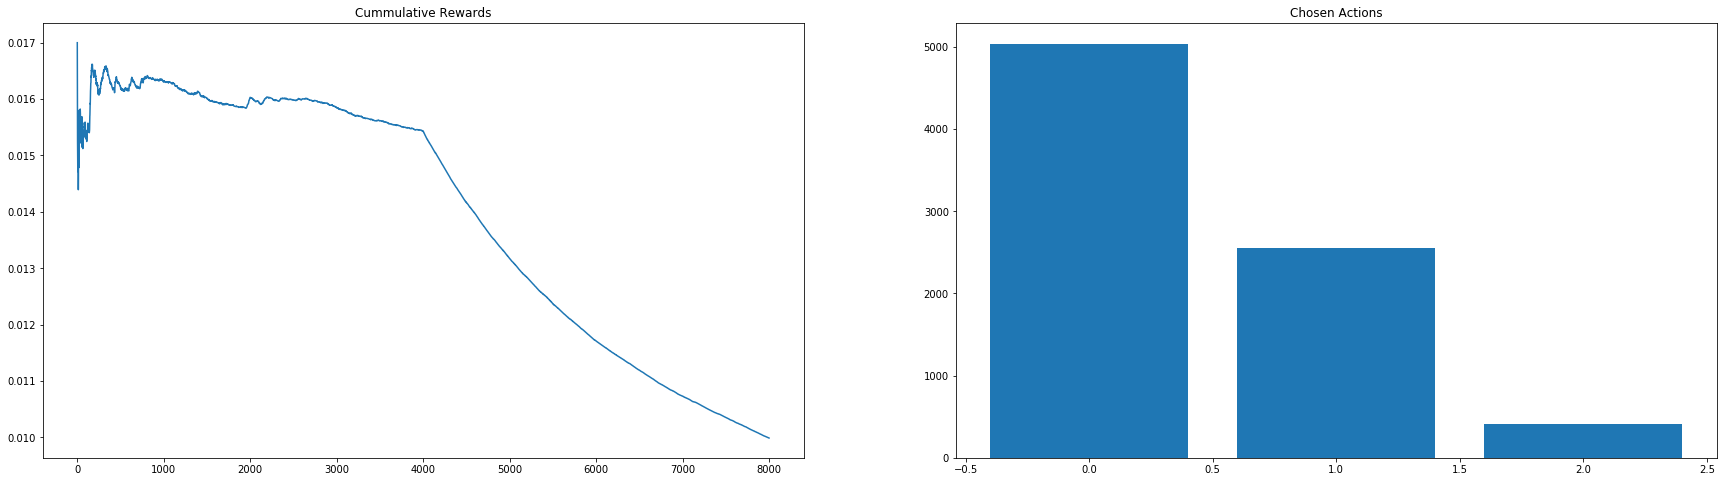

In [24]:
plot_history(rewards,cum_rewards, arm_counts)